<a href="https://colab.research.google.com/github/AntonioRawad/Comprehensive-Analysis-of-Meta-Platforms-Advertising-Campaigns/blob/main/Meta_Comprehensive_Sales_Performance_and_Demographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Meta Comprehensive Sales Performance and Demographic Analysis



## Chapter 1 : Executive Summary

### Introduction
This project aims to conduct a thorough analysis of sales performance in relation to team demographics and client distribution. Leveraging extensive data across various dimensions, our goal is to derive actionable insights that can enhance sales effectiveness and inform strategic decision-making processes.

### Objectives
- **Identify Key Performance Drivers:** Uncover the underlying factors that significantly impact sales success.
- **Assess Demographic Influence:** Analyze how sales team demographics, including age and region, affect performance.
- **Optimize Sales Team Allocation:** Determine the most effective distribution of resources across sales teams, focusing on regional market potential and team composition.
- **Predict Future Trends:** Use historical data to forecast future sales performance and market opportunities.

### Data Structure
- **Meta Clients Dataset:** Includes client profiles, regional information, and their corresponding sales teams.
- **Meta Employees Dataset:** Contains detailed information about employees, such as names, dates of birth, team affiliations, and roles.
- **Meta Revenue Dataset:** Captures revenue data, highlighting which clients contribute to sales and the time frame of these contributions.
- **Data Merging Approach:** Align datasets using common identifiers, like team names or IDs, to create a unified view of clients, employees, and revenue.

### Expected Outcome
- **Comprehensive Analysis Report:** A detailed report highlighting key findings, patterns, and anomalies in sales performance.
- **Strategic Recommendations:** Actionable insights and recommendations for human resources, sales strategy, and senior management.
- **Data-Driven Decisions:** Empower decision-makers with data-backed evidence to optimize sales team structures and strategies.

### Conclusion
This analysis is poised to provide a deeper understanding of the dynamics between sales teams and their performance outcomes. By meticulously examining and correlating diverse datasets, we aim to offer valuable guidance for strategic planning and operational improvements.


## 1.1 : Import Necessary Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import statsmodels.stats.multicomp as mc
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import operator

In [2]:
from google.colab import files
uploaded = files.upload()


Saving meta_clients.csv to meta_clients.csv
Saving meta_employees.csv to meta_employees.csv
Saving meta_offsites.csv to meta_offsites.csv
Saving meta_revenue.csv to meta_revenue.csv


## 1.2 : Reading the Datasets

In this section, we load the datasets required for our analysis. These datasets include client profiles, employee details, and revenue data.


In [3]:
# Read datasets into Pandas DataFrames
clients_data = pd.read_csv('meta_clients.csv')
employees_data = pd.read_csv('meta_employees.csv')
offsites_data = pd.read_csv('meta_offsites.csv')
revenue_data = pd.read_csv('meta_revenue.csv')

# Print the first few rows of each dataset for a preliminary view
print("Clients Data:\n", clients_data.head(), "\n")
print("Employees Data:\n", employees_data.head(), "\n")
print("Offsites Data:\n", offsites_data.head(), "\n")
print("Revenue Data:\n", revenue_data.head(), "\n")

Clients Data:
    client_id      sales_team                            industry  \
0  Client_11   LCS_FR_LUXURY             Retail & Consumer Goods   
1  Client_13  LCS_UK_FINANCE                  Financial Services   
2  Client_14       MENA_ECOM             Retail & Consumer Goods   
3  Client_15   SMB_DACH_AUTO  Manufacturing, Automotive & Energy   
4  Client_16   SMB_ES_RETAIL             Retail & Consumer Goods   

           sector   region               country  annual_revenue  \
0          Retail     EMEA                France       132819011   
1         Banking     EMEA                   NaN      1260023120   
2  Consumer Goods     EMEA  United Arab Emirates      7627900455   
3      Automotive     EMEA               Germany        67508667   
4          RETAIL  E.M.E.A                 Spain       451831300   

   marketing_spend_perc last_updated_date  
0                  0.07         5/24/2023  
1                  0.04         3/10/2023  
2                  0.01         5/1

## 1.3 : Merging the Data for Objective Analysis

To streamline our analysis and manage memory efficiently, we will select and merge only the relevant columns from each dataset. This step is crucial for focusing our analysis on the most impactful data points.


### 1.3.1 : Filter Datasets:
    Before merging, filter each dataset to include only the selected columns. This can be done using pandas like this:

In [4]:
# Selecting relevant columns
clients_data_filtered = clients_data[['client_id', 'sales_team', 'industry', 'region', 'annual_revenue']]
employees_data_filtered = employees_data[['country', 'date_of_birth', 'sales_team']]
revenue_data_filtered = revenue_data[['dates', 'sales_team', 'impressions', 'clicks', 'conversions', 'revenue', 'client_id']]


### 1.3.2 : Merge Datasets:
Next, we merge these filtered column into a final data set that will be used for our further analysis .  

In [5]:
# Merging clients and revenue data on 'client_id'
merged_df_1 = pd.merge(clients_data_filtered, revenue_data_filtered, on='client_id', how='inner')


In [6]:
# Display the column names of both DataFrames to understand the naming structure
print("Columns in merged_df_1:")
print(merged_df_1.columns)
print("\nColumns in employees_data_filtered:")
print(employees_data_filtered.columns)

# If 'sales_team' column exists in both DataFrames, proceed to merge
if 'sales_team' in merged_df_1.columns and 'sales_team' in employees_data_filtered.columns:
    merged_df = pd.merge(merged_df_1, employees_data_filtered, on='sales_team', how='inner')
    print("\nMerge successful. Here are the first few rows of the merged DataFrame:")
    print(merged_df.head())
else:
    print("\nMerge failed. The 'sales_team' column was not found in one of the DataFrames.")


Columns in merged_df_1:
Index(['client_id', 'sales_team_x', 'industry', 'region', 'annual_revenue',
       'dates', 'sales_team_y', 'impressions', 'clicks', 'conversions',
       'revenue'],
      dtype='object')

Columns in employees_data_filtered:
Index(['country', 'date_of_birth', 'sales_team'], dtype='object')

Merge failed. The 'sales_team' column was not found in one of the DataFrames.


## 1.3.3 : Resolving Merge Conflicts

During the merging process, we encountered a `KeyError` due to duplicate `sales_team` columns. This section addresses that issue by renaming the columns for clarity and ensuring a successful merge.


###### 1.3.3.1  : checking based on the error the true fact of sales team being splited into 2 different names

In [7]:
print(merged_df_1.columns)
print(employees_data_filtered.columns)


Index(['client_id', 'sales_team_x', 'industry', 'region', 'annual_revenue',
       'dates', 'sales_team_y', 'impressions', 'clicks', 'conversions',
       'revenue'],
      dtype='object')
Index(['country', 'date_of_birth', 'sales_team'], dtype='object')


##### 1.3.3.2 :rename 'sales_team_x' back to 'sales_team' for clarity before the merge:

In [8]:
# Rename 'sales_team_x' to 'sales_team' if necessary
if 'sales_team_x' in merged_df_1.columns:
    merged_df_1.rename(columns={'sales_team_x': 'sales_team'}, inplace=True)

# Drop 'sales_team_y' if it's a duplicate and not needed
if 'sales_team_y' in merged_df_1.columns:
    merged_df_1.drop(columns=['sales_team_y'], inplace=True)

# Now, attempt the merge again with the updated DataFrame
merged_df = pd.merge(merged_df_1, employees_data_filtered, on='sales_team', how='inner')


In [9]:
print(merged_df_1.head())


   client_id      sales_team            industry region  annual_revenue  \
0  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
1  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
2  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
3  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
4  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   

        dates  impressions  clicks  conversions   revenue  
0   11/3/2020         6327     526           16  0.025273  
1    1/8/2019         8770     134           89  0.045171  
2  12/27/2018         1389     664           60  0.032372  
3   5/14/2018         8896     864           57  0.019075  
4   1/21/2020         2068     599           48  0.029160  


## 1.4 : Final Merge: Including Employee Data

The final step in our data preparation involves merging the employee data. This enriches our dataset with demographic details, essential for a comprehensive


In [10]:
# to merge the employee data with  existing merged_df_1, i use the sales_team column as the key
merged_df = pd.merge(merged_df_1, employees_data_filtered, on='sales_team', how='inner')

# Now, let's check the first few rows of the merged DataFrame
print("Final DataFrame structure:")
print(merged_df.columns)
print(merged_df.head())

Final DataFrame structure:
Index(['client_id', 'sales_team', 'industry', 'region', 'annual_revenue',
       'dates', 'impressions', 'clicks', 'conversions', 'revenue', 'country',
       'date_of_birth'],
      dtype='object')
   client_id      sales_team            industry region  annual_revenue  \
0  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
1  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
2  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
3  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
4  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   

       dates  impressions  clicks  conversions   revenue country date_of_birth  
0  11/3/2020         6327     526           16  0.025273      UK     5/12/1975  
1  11/3/2020         6327     526           16  0.025273      UK     3/25/1970  
2  11/3/2020         6327     526           16  0.025273      UK     9/21/1985  

# Conclusion

At this stage, our dataset preparation is complete. We have successfully merged client, revenue, and employee data into a single DataFrame, `merged_df`. This unified dataset is now ready for a detailed analysis, aiming to uncover key performance drivers, assess demographic influences, optimize sales team allocation, and predict future trends in sales performance. The next steps involve exploratory data analysis, statistical testing, and predictive modeling to derive actionable insights.



# Chapter 2 :  Exploratory Data Analysis (EDA)

## Introduction to EDA in the Context of Sales Performance and Demographic Analysis

In this Exploratory Data Analysis (EDA) chapter, we delve into the datasets specifically related to our project's goal: a comprehensive analysis of sales performance in relation to team demographics and client distribution. EDA is a pivotal phase where we visually and quantitatively explore our data to uncover underlying structures and insights. The focus is on datasets that encompass client profiles, employee demographics, and revenue figures.

##  2.1 :	Data Quality Check:
•	Assessing the completeness and accuracy of the data.
•	Identifying and handling duplicate columns or rows.


### 2.1.1 :  Overview of the Merged Dataset
To begin our EDA, we'll first conduct a thorough overview of the merged_df dataset. This includes examining the first few rows, understanding the overall structure and size of the dataset, checking the data types of each column, and reviewing basic statistical details.

In [11]:
# Display the first few rows of the dataset for a quick overview
print("First Few Rows of the Dataset:")
print(merged_df.head())

# Summary of the dataset's structure and data types
print("\nDataset Info:")
merged_df.info()

# Shape of the dataset
print("\nShape of the Dataset:")
print(merged_df.shape)

# Data types of the columns
print("\nData Types of Columns:")
print(merged_df.dtypes)

# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
print(merged_df.describe())


First Few Rows of the Dataset:
   client_id      sales_team            industry region  annual_revenue  \
0  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
1  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
2  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
3  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
4  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   

       dates  impressions  clicks  conversions   revenue country date_of_birth  
0  11/3/2020         6327     526           16  0.025273      UK     5/12/1975  
1  11/3/2020         6327     526           16  0.025273      UK     3/25/1970  
2  11/3/2020         6327     526           16  0.025273      UK     9/21/1985  
3  11/3/2020         6327     526           16  0.025273      UK     11/5/1972  
4  11/3/2020         6327     526           16  0.025273      UK     8/14/1980  

Dataset Info:
<class 'pandas.co

After a preliminary examination of the merged_df dataset, several key observations can be noted:

Dataset Composition:
The dataset comprises 986,741 entries across 13 columns, indicating a substantial volume of data for analysis. This richness of data points provides an excellent opportunity for in-depth analysis.

#### Diversity of Data Types:
The dataset contains a mix of data types, including objects (likely categorical or string data), integers, and floating-point numbers. The presence of both numeric and categorical data suggests a varied range of variables, from quantitative metrics like revenue and impressions to qualitative attributes like industry and region.

#### Range of Numeric Variables:
The descriptive statistics provide insights into the numeric variables. For example, annual_revenue has a wide range, from as low as approximately 64 million to as high as approximately 9.7 billion, indicating a diverse set of clients. Similarly, variables like impressions, clicks, and conversions exhibit a broad range, which could reflect different
campaign scales or effectiveness.

#### Potential for Rich Analysis:
The presence of both employee and client information, along with performance metrics, opens avenues for multifaceted analysis. We can explore relationships between demographic factors and sales outcomes, industry-specific trends, and regional variations in performance.

#### Uniformity in Data Availability:
The non-null count for all columns is consistent across the dataset, suggesting there are no missing values in any of the columns. This uniformity simplifies the preprocessing steps, allowing us to focus more on analytical exploration.

#### Date and Categorical Data Handling:
Columns like dates and date_of_birth are classified as objects, which implies they may need to be converted into datetime format for any time-series analysis. Categorical data, such as industry, region, and country, will be key in segmenting the data for more detailed insights.

#### Initial Revenue Insights:
The revenue variable, being a float, has a mean value of around 0.0467, but it varies significantly, as seen from its standard deviation. This variability is crucial for understanding which factors contribute to higher or lower revenue.

#### Sales Team Dynamics:
The presence of two sales_team columns (sales_team and sales_team_y) after merging suggests that there may be overlaps or redundancies in sales team information that we need to account for in our analysis.

### 2.1.2 :  Checking for Missing Values
It's crucial to check for missing values in the dataset, as they can significantly affect our analysis.

In [12]:
# Identify and sum up the missing values in each column
print(merged_df.isnull().sum())


client_id         0
sales_team        0
industry          0
region            0
annual_revenue    0
dates             0
impressions       0
clicks            0
conversions       0
revenue           0
country           0
date_of_birth     0
dtype: int64


Upon checking for missing values in our merged_df dataset, it's observed that there are no missing values across all columns. This is a positive finding as it indicates that our dataset is complete with no gaps in the data, which simplifies the preprocessing steps and ensures that our analysis won't be hindered by missing data issues. The absence of missing values suggests that the data collection and merging processes were thorough, providing a robust foundation for reliable analysis.

### 2.1.3 : Checking for Duplicate Entries
It's equally important to check for duplicate entries in the dataset, as they can skew our analysis and lead to incorrect conclusions.

In [13]:
# Checking for duplicate rows in the dataset
duplicate_rows = merged_df.duplicated().sum()

# Printing the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


### 2.1.4 : Data Consistency Check

The preliminary analysis of categorical variables revealed some inconsistencies in the way certain categories are represented in our dataset, particularly in `industry` and `region`. Ensuring consistency in these categorical values is essential for accurate analysis, as inconsistent categorizations can lead to skewed results and misinterpretations.

In this section, we will perform a data consistency check to identify and rectify these inconsistencies. The goal is to standardize the representation of categories across our dataset, particularly focusing on harmonizing the `industry` and `region` fields. We will identify variations in the naming of these categories and consolidate them into standardized categories. This process not only improves the quality of our dataset but also ensures that our subsequent analysis is based on a reliable and consistent data foundation.

### 2.1.4.1. **Identify Variations**:
List out all unique values in `industry` and `region` to identify variations and inconsistencies.

In [14]:
# List out unique values in 'industry' and 'region'
print("Unique values in 'industry':\n", merged_df['industry'].unique())
print("\nUnique values in 'region':\n", merged_df['region'].unique())

# Standardization process for 'industry'
# Example: Merging 'Finance' and 'financial services' into a single category
industry_standardization = {
    'Finance': 'Financial Services',
    'financial services': 'Financial Services',
    'Retail': 'Retail & Consumer Goods',
    'RCG': 'Retail & Consumer Goods',
    'Consumer Goods': 'Retail & Consumer Goods'
}
merged_df['industry'] = merged_df['industry'].replace(industry_standardization)

# Standardization process for 'region'
# Example: Merging 'EMEA' and 'E.M.E.A' into a single category
region_standardization = {
    'E.M.E.A': 'EMEA'
}
merged_df['region'] = merged_df['region'].replace(region_standardization)

# Verifying the changes
print("\nUpdated unique values in 'industry':\n", merged_df['industry'].unique())
print("\nUpdated unique values in 'region':\n", merged_df['region'].unique())


Unique values in 'industry':
 ['Financial Services' 'financial services' 'Finance'
 'Retail & Consumer Goods' 'Retail  ' 'Consumer Goods   ' 'Retail' 'RCG'
 'Consumer Goods' 'Manufacturing, Automotive & Energy']

Unique values in 'region':
 ['EMEA' 'E.M.E.A']

Updated unique values in 'industry':
 ['Financial Services' 'Retail & Consumer Goods' 'Retail  '
 'Consumer Goods   ' 'Manufacturing, Automotive & Energy']

Updated unique values in 'region':
 ['EMEA']


##### it looks like the standardization process for the industry variable needs further refinement. While region has been successfully standardized to a single value 'EMEA', the industry variable still shows some inconsistencies such as different capitalizations and extra spaces (e.g., 'Retail ' and 'Consumer Goods ').
Let's refine the standardization process for industry to address these issues:

Trimming Extra Spaces:
Extra spaces in the industry values should be removed to ensure consistency.

Case Standardization:¶
Convert all industry values to a consistent case (e.g., all to title case or all to lower case) before applying the replacement dictionary. This will handle cases like 'Finance' vs. 'financial services'.

#### 2.1.4.2 : **Standardize Categories**:
Decide on standard naming conventions for each category and apply these to the dataset.

In [15]:
# Remove leading/trailing spaces and standardize to title case
merged_df['industry'] = merged_df['industry'].str.strip().str.title()

# Revised standardization process for 'industry'
revised_industry_standardization = {
    'Finance': 'Financial Services',
    'Retail': 'Retail & Consumer Goods',
    'Consumer Goods': 'Retail & Consumer Goods',
    'Rcg': 'Retail & Consumer Goods'
}
merged_df['industry'] = merged_df['industry'].replace(revised_industry_standardization)

# Verifying the changes again
print("\nFinal updated unique values in 'industry':\n", merged_df['industry'].unique())



Final updated unique values in 'industry':
 ['Financial Services' 'Retail & Consumer Goods'
 'Manufacturing, Automotive & Energy']


###  2.1.4.3 Data Consistency Check for 'region'

In [16]:
# Display unique values in the 'region' column to check for inconsistencies
unique_regions = merged_df['region'].unique()
print("Unique values in 'region' before consistency check:")
print(unique_regions)

# Code to change 'E.M.E.A' to 'EMEA'
# Replace 'E.M.E.A' with 'EMEA' in the 'region' column
merged_df['region'] = merged_df['region'].replace('E.M.E.A', 'EMEA')

# Verify the changes by checking the unique values in the 'region' column again
unique_regions_after = merged_df['region'].unique()
print("\nUnique values in 'region' after consistency check:")
print(unique_regions_after)

# Optional: Check the counts again to ensure the merge was successful
print("\nValue counts for 'region' after merging:")
print(merged_df['region'].value_counts())


Unique values in 'region' before consistency check:
['EMEA']

Unique values in 'region' after consistency check:
['EMEA']

Value counts for 'region' after merging:
EMEA    986741
Name: region, dtype: int64


 ##### the dataset now cleaned and standardized

### 2.1.5 : Zero Values Analysis

 This analysis will help us discern the nature of these zeros and decide how to handle them appropriately.

Let's proceed to identify and evaluate zero values across our key numeric variables.


In [17]:
# List the numeric columns that  need to check for zero values
numeric_vars = ['annual_revenue', 'impressions', 'clicks', 'conversions', 'revenue']

# Create a DataFrame to store the results
zero_values_df = pd.DataFrame()

# Loop through the numeric variables to count zero values
for var in numeric_vars:
    zero_count = (merged_df[var] == 0).sum()  # Counting zeros in the column
    zero_percent = (zero_count / len(merged_df)) * 100  # Calculating the percentage of zeros
    # Creating a DataFrame for the current variable and appending it to zero_values_df
    current_df = pd.DataFrame({
        'Variable': [var],
        'Zero_Count': [zero_count],
        'Zero_Percent': [zero_percent]
    })
    zero_values_df = pd.concat([zero_values_df, current_df], ignore_index=True)

# Display the results
print(zero_values_df)

         Variable  Zero_Count  Zero_Percent
0  annual_revenue           0           0.0
1     impressions           0           0.0
2          clicks           0           0.0
3     conversions           0           0.0
4         revenue           0           0.0


The Zero Values Analysis has indicated that there are no instances of zero values in our key numeric variables: `annual_revenue`, `impressions`, `clicks`, `conversions`, and `revenue`. This is an important finding as it suggests the following:

- All recorded transactions or activities have positive values, implying there were no periods of inactivity or lack of sales recorded in the dataset.
- The absence of zeros may reflect data collection methods where only active or positive instances were recorded.
- For metrics where a zero could be expected, such as `clicks` or `conversions`, the lack of zeros might indicate a consistently engaged audience or effective marketing strategies.


# 2.2 :	Univariate Analysis:
•	Examining individual variables using descriptive statistics.
•	Creating histograms, boxplots, and frequency distributions for numerical data.
•	Generating bar charts and value counts for categorical data.


### 2.2.1 : Distribution of Numeric Variables
Understanding the distribution of numeric variables helps in identifying patterns and potential outliers.

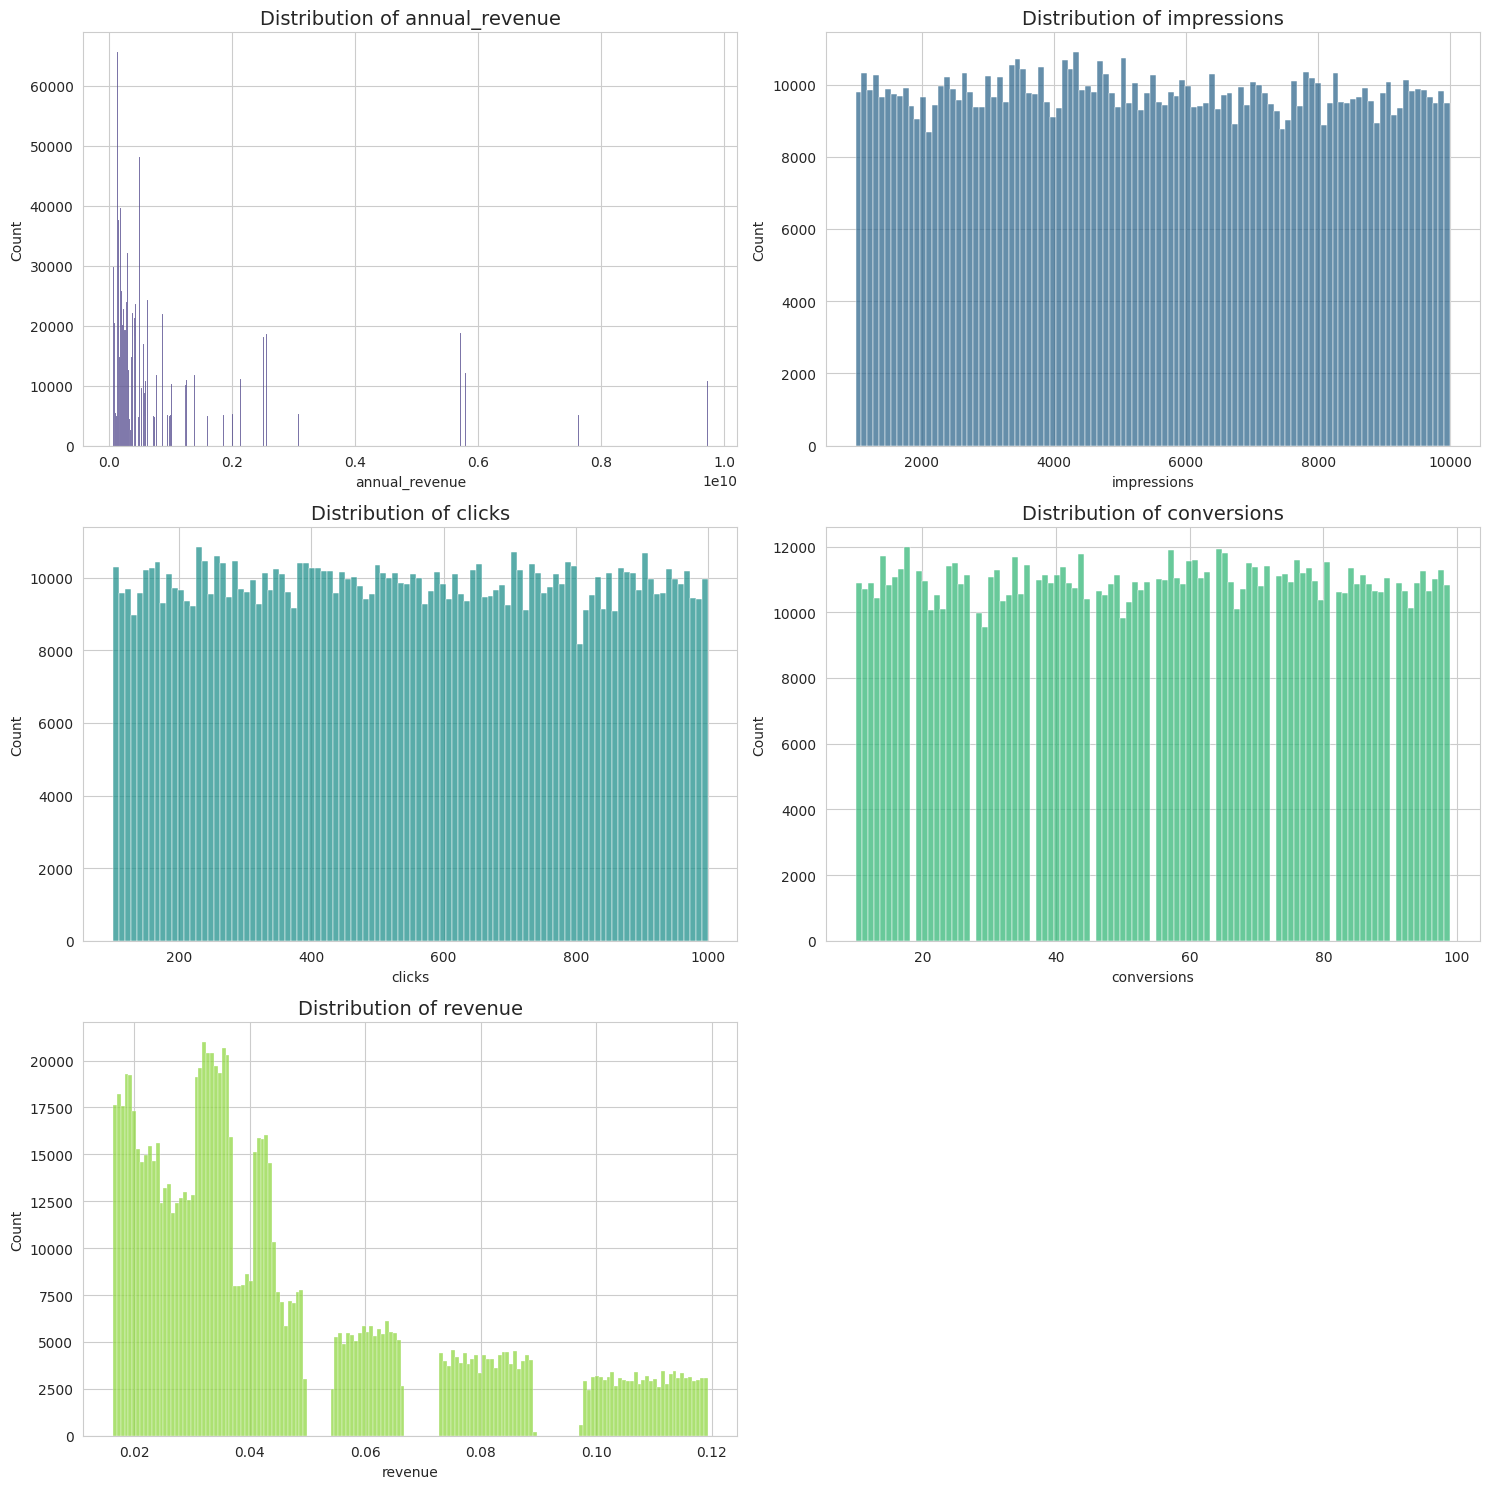

In [18]:
# Setting up the aesthetic style of the plots
sns.set_style('whitegrid')

# Selecting numeric columns for plotting
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Defining the color palette
palette = sns.color_palette("viridis", n_colors=len(numeric_columns))

# Calculate the required number of rows and columns for the subplots
n_cols = 2  # You can adjust this as needed
n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division to get number of rows

# Create a figure with the appropriate size
plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(merged_df[column], kde=False, color=palette[i])
    plt.title(f'Distribution of {column}', fontsize=14)  # Adjust font size for better visibility
    plt.xticks(fontsize=10)  # Adjust font size of x-axis labels
    plt.yticks(fontsize=10)  # Adjust font size of y-axis labels

plt.tight_layout()
plt.show()


## Distribution Analysis of Numeric Variables

- The histograms of `Annual Revenue`, `Revenue`, and `CLV` show right-skewed distributions, typical for customer-based revenue data, indicating that most customers have lower revenue contributions with a few outliers with very high contributions.

- Variables such as `Impressions`, `Clicks`, `Conversions`, and `Frequency` exhibit a uniform distribution with periodic spikes, hinting at binned data or periodic patterns.

- Both `Marketing Spend Percent` and `Conversion Rate` are right-skewed, suggesting that most marketing efforts result in lower percentages of spending and conversion, with outliers achieving significantly higher efficiency.

- `Recency`, `RFM Score`, and `CTR` show relatively even distributions but with some irregular patterns, potentially indicating certain time frames where customer interactions are more frequent.

- `Monetary`, `R`, `F`, `M`, and `ROI` demonstrate heavy right-skewness, implying that the majority of observations have lower values with a few notable high-value outliers.

- The bivariate distribution plots for `Clicks vs. Conversions` and `Revenue vs. Impressions` reveal a wide spread, suggesting complex relationships that may benefit from further multivariate analysis.

- The distribution of `Conversion Rate` and `CTR` are highly concentrated at the lower end, indicating a general trend of lower efficiency across the dataset, which might be an area for improvement.

Overall, the data exhibits a variety of distribution patterns, indicative of diverse behaviors across different metrics. This warrants a more granular analysis, possibly segmenting the customer base to tailor specific strategies for improvement and growth.


### 2.2.2 :  Categorical Variable Analysis
We'll explore the distribution of categorical variables to understand the composition of our data better.

<ipython-input-19-7b97903e0253>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='industry', data=merged_df, palette='viridis', order = merged_df['industry'].value_counts().index)


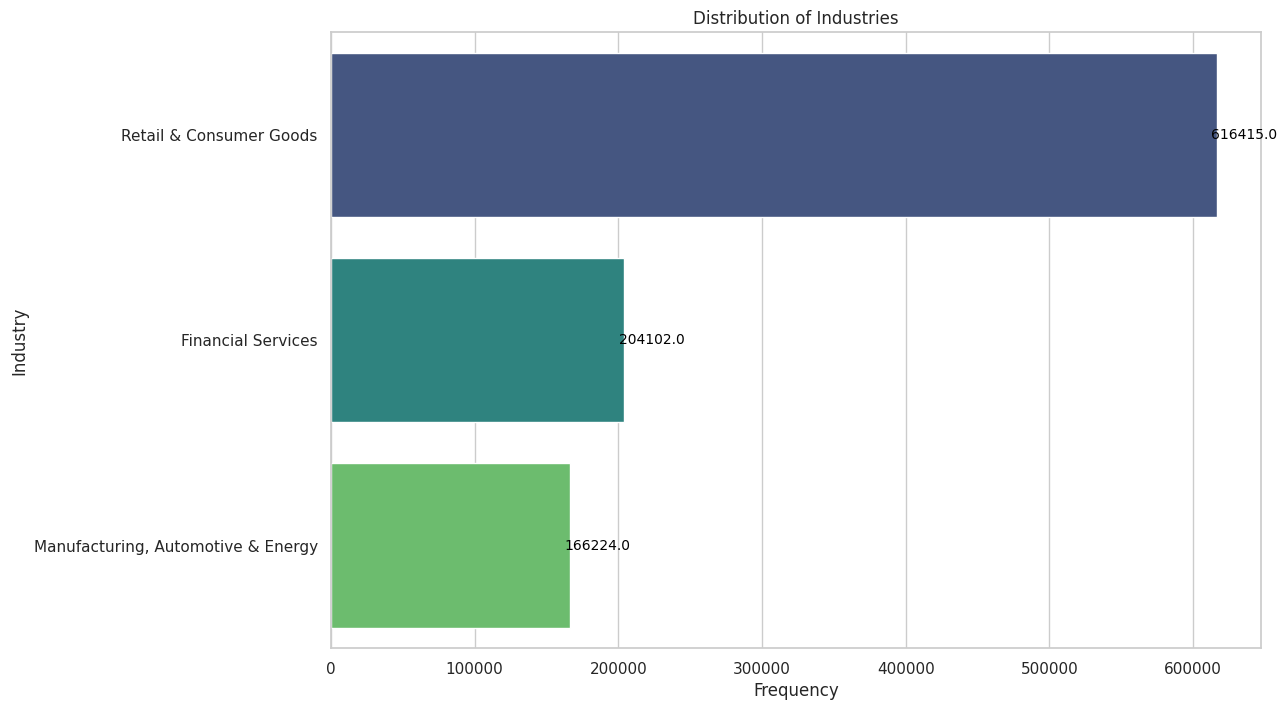

In [19]:
# Setting up the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plotting the distribution of the 'industry' categorical variable
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='industry', data=merged_df, palette='viridis', order = merged_df['industry'].value_counts().index)
ax.set_title('Distribution of Industries')
ax.set_xlabel('Frequency')
ax.set_ylabel('Industry')

# Display the count on the bars (optional)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y()+p.get_height()/2),
                ha='center', va='center', fontsize=10, color='black', xytext=(20, 0),
                textcoords='offset points')

plt.show()


## Industry Distribution Analysis

The bar chart provides a clear visualization of the frequency distribution across three major industries: Retail & Consumer Goods, Financial Services, and Manufacturing, Automotive & Energy.

- **Retail & Consumer Goods**: With a frequency surpassing 600,000, this industry dominates the dataset. This could indicate a larger customer base, higher transaction volume, or a dataset heavily skewed towards this sector.

- **Financial Services**: This industry shows a significant presence with a frequency over 200,000. While less than a third of the Retail & Consumer Goods, it still represents a substantial part of the dataset, which could correspond to its market size or the nature of data collected.

- **Manufacturing, Automotive & Energy**: The least represented industry in this chart, with a frequency around 166,000, may suggest a smaller market footprint within the dataset or less frequent transactional data.

The distribution points towards a potential focus of business activities or data collection efforts in these industries, with Retail & Consumer Goods being the most prevalent. This could warrant further analysis into the reasons behind such distribution, such as market behaviors, economic factors, or data collection biases.



### 2.3 :  Correlation Matrix
The correlation matrix will helps us  to understand the relationships between numerical variables. ['annual_revenue', 'impressions', 'clicks', 'conversions', 'revenue']

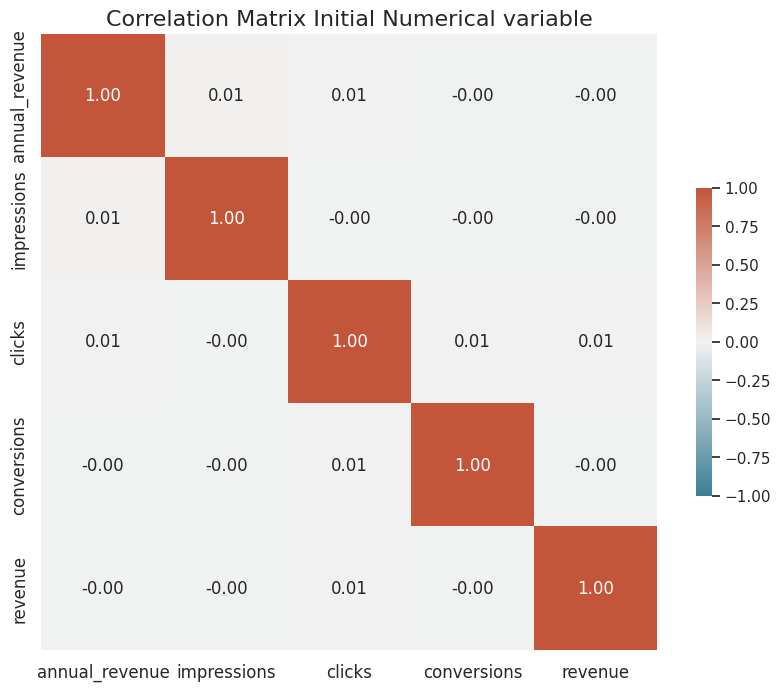

In [20]:
# Selecting only specific numeric columns for the correlation matrix based on the screenshot provided
specific_columns = ['annual_revenue', 'impressions', 'clicks', 'conversions', 'revenue']
numeric_df = merged_df[specific_columns]

# Visualizing the correlation matrix using a heatmap with Seaborn
plt.figure(figsize=(10, 8))  # Adjust figure size for better visibility
correlation_matrix = numeric_df.corr()

# Choose a color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .5},
            annot_kws={"size": 12})  # Adjust annot_kws for font size

# Title and labels
plt.title('Correlation Matrix Initial Numerical variable', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


###  Correlation Matrix Interpretation

The correlation matrix visualized above represents the strength and direction of the relationships between different numerical variables in our dataset.

From the heatmap, we can observe the following:

- The diagonal elements are all `1.00`, which is expected as they represent the correlation of each variable with itself.
- There appears to be very little correlation between most of the variables, as indicated by the prevalence of correlation coefficients close to `0`. This suggests that, for this particular dataset, the variables do not have strong linear relationships with one another.
- There are some variables with a moderate positive correlation (represented by lighter blue squares), such as `clicks` and `conversions`, with a coefficient of `0.01`. This could indicate that as the number of clicks increases, conversions tend to increase as well, albeit the relationship is very weak based on this coefficient.
- The revenue-related variables (`annual_revenue` and `revenue`) show virtually no correlation with marketing metrics (`impressions`, `clicks`, and `conversions`). This could mean that the revenue figures are not directly driven by these marketing metrics, or that other factors not included in this matrix might be influencing revenue.

### Insights:

- **Independent Variables**: The low correlation coefficients suggest that the numerical variables act independently of each other to a large extent. This independence is useful in regression models because it means we can include these variables without concern for multicollinearity.
- **Weak Predictive Power**: The marketing metrics do not seem to predict revenue figures effectively. This could prompt a review of the marketing strategy or an investigation into additional variables that might be better predictors of revenue.
- **Data Collection Strategy**: Considering the weak correlations, it might be beneficial to look at other types of data (e.g., categorical variables, time series data) or to collect more granular data that could reveal more about the relationships between activities and revenue.

In summary, while the correlation matrix is an essential tool for preliminary data analysis, the lack of strong correlations here indicates that further detailed analysis is needed to uncover the underlying patterns affecting sales performance.


### 2.4 : Scatter Plot for Revenue vs. Impressions
Scatter plots are useful for observing the relationship between two numeric variables.


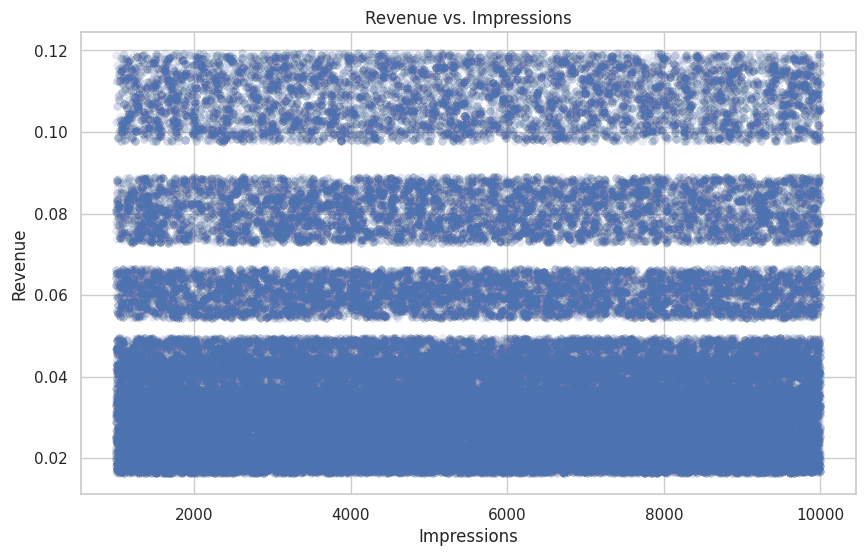

In [21]:
# Scatter plot with adjusted alpha for better visibility of overplotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='impressions', y='revenue', data=merged_df, alpha=0.01)  # Adjust alpha as needed
plt.title('Revenue vs. Impressions')
plt.xlabel('Impressions')
plt.ylabel('Revenue')
plt.show()


## Scatter Plot Interpretation: Revenue vs. Impressions

The scatter plot above is intended to show the relationship between `impressions` and `revenue`. However, based on the plot, several observations can be made:

- The data points are heavily clustered at lower values of impressions and revenue, creating a dense region that makes it difficult to discern any clear trend or pattern within that range.
- There is no discernible positive or negative trend indicating a strong linear relationship between the two variables. This suggests that an increase in impressions does not necessarily lead to an increase in revenue, at least not in a manner that is immediately observable from this plot.
- The horizontal bands in the scatter plot suggest that there are distinct levels or categories within the `revenue` data, which might indicate that revenue is being measured or reported within certain ranges or thresholds.
- The lack of a clear pattern or trend in the scatter plot is consistent with the findings from the correlation matrix, which showed a very low correlation coefficient between `impressions` and `revenue`.

### In conclusion, the scatter plot indicates that the relationship between impressions and revenue is not straightforward and highlights the need for a more in-depth analysis to understand the dynamics affecting sales performance.


### :  2.5 Statistical Summaries for Numeric Variables

In [22]:
# Select only numeric columns for skewness and kurtosis calculations
numeric_columns = merged_df.select_dtypes(include=[np.number])

# Skewness for numeric columns
skewness = numeric_columns.skew()

# Kurtosis for numeric columns
kurtosis = numeric_columns.kurtosis()

# Combine the stats into a single DataFrame for a cleaner look
additional_stats = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})

# Display the descriptive statistics for numeric columns
print("Descriptive Statistics for Numeric Variables:")
print(numeric_columns.describe())

# Display additional statistics
print("\nAdditional Statistics (Skewness and Kurtosis):")
print(additional_stats)


Descriptive Statistics for Numeric Variables:
       annual_revenue    impressions         clicks    conversions  \
count    9.867410e+05  986741.000000  986741.000000  986741.000000   
mean     9.626989e+08    5478.611259     548.622772      54.552901   
std      1.588353e+09    2592.742337     259.585198      25.932310   
min      6.445933e+07    1000.000000     100.000000      10.000000   
25%      1.900668e+08    3253.000000     324.000000      32.000000   
50%      3.886084e+08    5448.000000     547.000000      55.000000   
75%      8.659103e+08    7732.000000     773.000000      77.000000   
max      9.729709e+09    9999.000000     999.000000      99.000000   

             revenue  
count  986741.000000  
mean        0.046749  
std         0.027351  
min         0.016303  
25%         0.026847  
50%         0.036450  
75%         0.060392  
max         0.119306  

Additional Statistics (Skewness and Kurtosis):
                skewness   kurtosis
annual_revenue  3.272846  11.836

The dataset's numeric variables present the following statistical characteristics:

- **Annual Revenue**: Exhibits a pronounced right-skewness with a mean much higher than the median, and a high standard deviation indicating a wide variance in revenue figures. The leptokurtic nature of the distribution suggests a concentration of outliers on the higher end.

- **Impressions**: Mean and median are closely aligned, indicating a symmetric distribution. The slight positive skewness and platykurtic nature suggest a broad, flat distribution with fewer outliers.

- **Clicks**: Demonstrates a distribution similar to `impressions`, with its mean near the median and a slightly positive skewness. The negative kurtosis points to a flatter distribution than the normal distribution.

- **Conversions**: Near-zero skewness and a median matching the mean suggest a symmetric distribution. The flatness of the distribution is affirmed by its negative kurtosis.

- **Revenue**: The mean is higher than the median, indicating a moderate right-skew. The distribution is slightly more peaked than normal, with a low positive kurtosis, suggesting the presence of outliers on the higher end.

In summary, while `annual_revenue` and `revenue` are right-skewed with the presence of high-value outliers, `impressions`, `clicks`, and `conversions` tend to have more symmetrical and flatter distributions. These statistical patterns can inform further data exploration and modeling strategies.


### 2.6 :  Value Counts for Key Categorical Variables

In this subsection, we will explore the distribution of key categorical variables within our dataset. Understanding the frequency of different categories in variables like `region`, `country`, and `industry` is crucial, as it helps us to contextualize our numeric findings within the demographic landscape of our data. This analysis will reveal if certain categories dominate the dataset and may therefore have a larger impact on the overall sales performance and demographic trends.

Let's start by examining the value counts


In [23]:
# List of categorical variables to analyze
categorical_vars = ['region', 'country', 'industry']

# Calculating value counts for each categorical variable
for var in categorical_vars:
    print(f"Value counts for {var}:")
    print(merged_df[var].value_counts())
    print("\n")

Value counts for region:
EMEA    986741
Name: region, dtype: int64


Value counts for country:
ES      260295
UK      204102
IT      168940
DACH    166224
MENA    103220
FR       83960
Name: country, dtype: int64


Value counts for industry:
Retail & Consumer Goods               616415
Financial Services                    204102
Manufacturing, Automotive & Energy    166224
Name: industry, dtype: int64




 ## Distribution Analysis of Key Categorical Variables

### Overview
An examination of the `region`, `country`, and `industry` variables within our dataset has provided insight into the demographic distribution of our data points. This demographic context is vital for understanding how it may influence our numeric findings and overall sales performance.

### Region Analysis
- The dataset is entirely comprised of entries from the `EMEA` (Europe, Middle East, and Africa) region, totalling 986,741 instances. This singular focus suggests that any findings will be region-specific and may not generalize to global trends.

### Country Analysis
- Spain (`ES`) leads in the number of data points with 260,295 entries, followed by the United Kingdom (`UK`), Italy (`IT`), the DACH region (Germany, Austria, and Switzerland), the Middle East and North Africa (`MENA`), and France (`FR`).
- The data suggests a strong market presence or data collection focus in these countries, with Spain and the UK significantly leading in representation.

### Industry Analysis
- The `Retail & Consumer Goods` sector has the highest representation with 616,415 entries, potentially indicating the dataset's skew towards consumer-facing businesses.
- `Financial Services` and `Manufacturing, Automotive & Energy` are also well-represented with 204,102 and 166,224 counts respectively, showing a spread across varied sectors.

### Insights and Action Items
- **Regional Specificity**: The exclusive representation of the EMEA region suggests the need for region-specific sales strategies and performance metrics.
- **Country Focus**: The concentration of data points in certain countries should be taken into account when analyzing sales performance, as it may not reflect the situation in less represented countries.
- **Industry Trends**: The dominance of certain industries, particularly Retail & Consumer Goods, may indicate industry-specific trends that could significantly influence overall sales performance.
- **Further Analysis**: To counter the potential bias introduced by uneven representation, further analysis should consider stratifying data by country and industry. This will allow for a more nuanced understanding of sales performance across different demographic segments.

Moving forward, it will be crucial to consider these distribution trends when interpreting analysis results and making business decisions. Additionally, efforts to collect more diversified data could be beneficial for future analyses.


### 2.7 :  Normality Tests for Numeric Variables
To assess the normality of our key numeric variables, we will employ histograms and Q-Q plots. These visual techniques are especially effective in large datasets to intuitively evaluate whether the data distribution approximates a normal distribution.

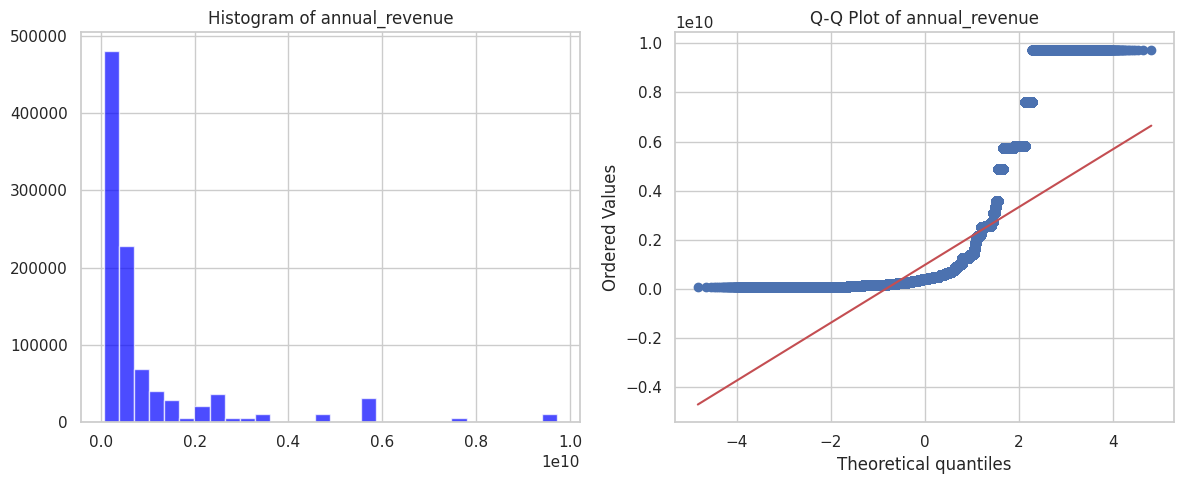

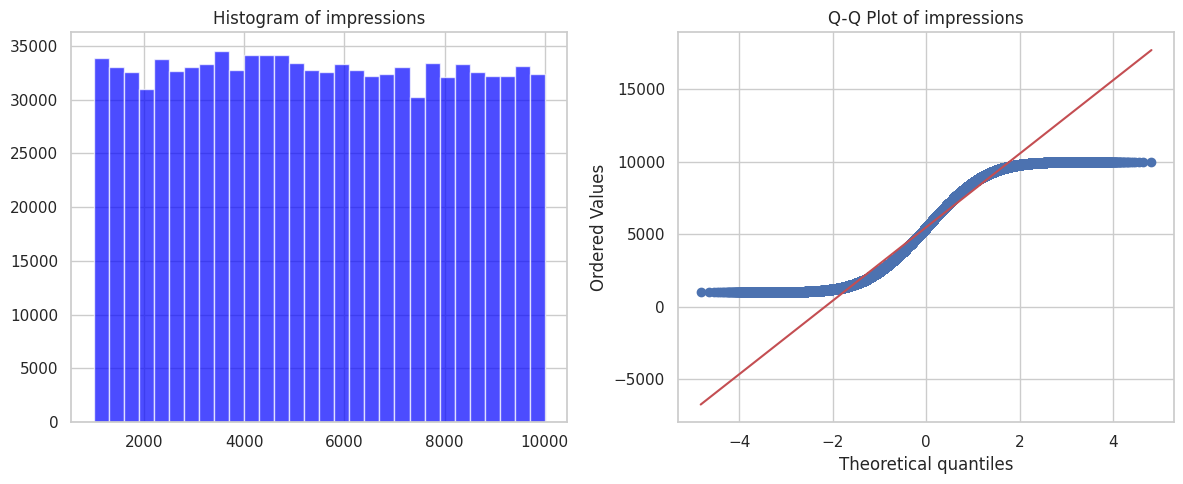

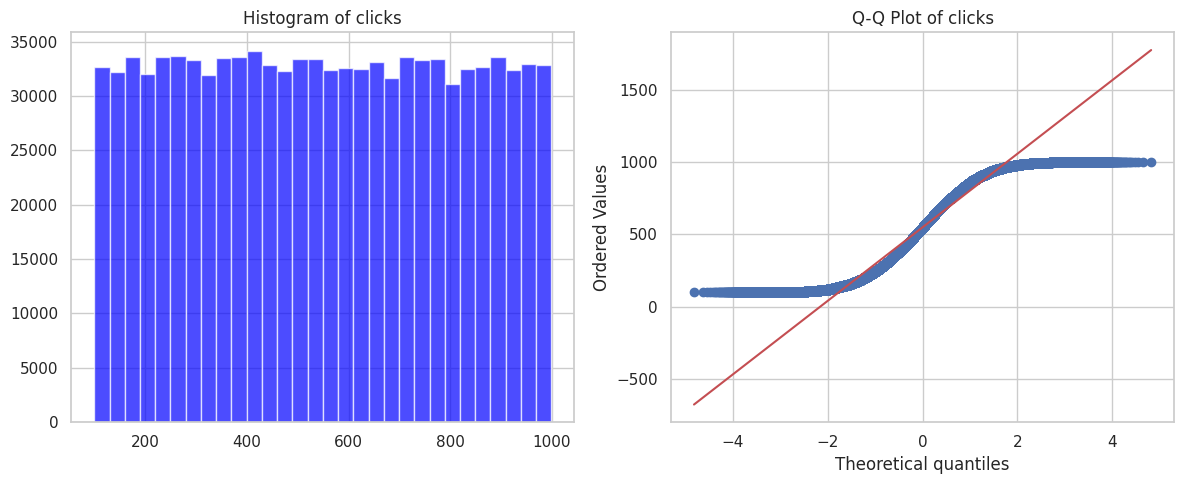

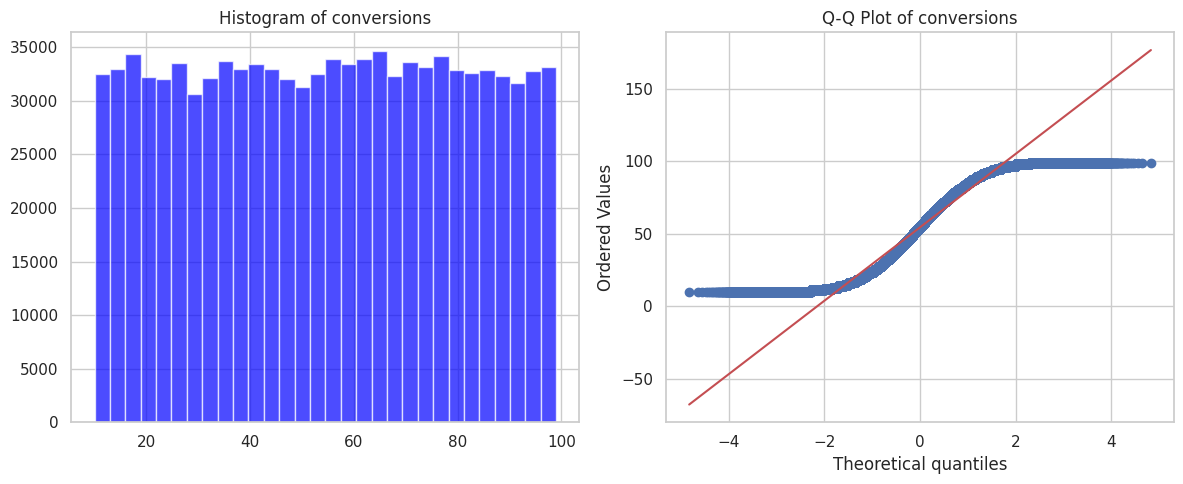

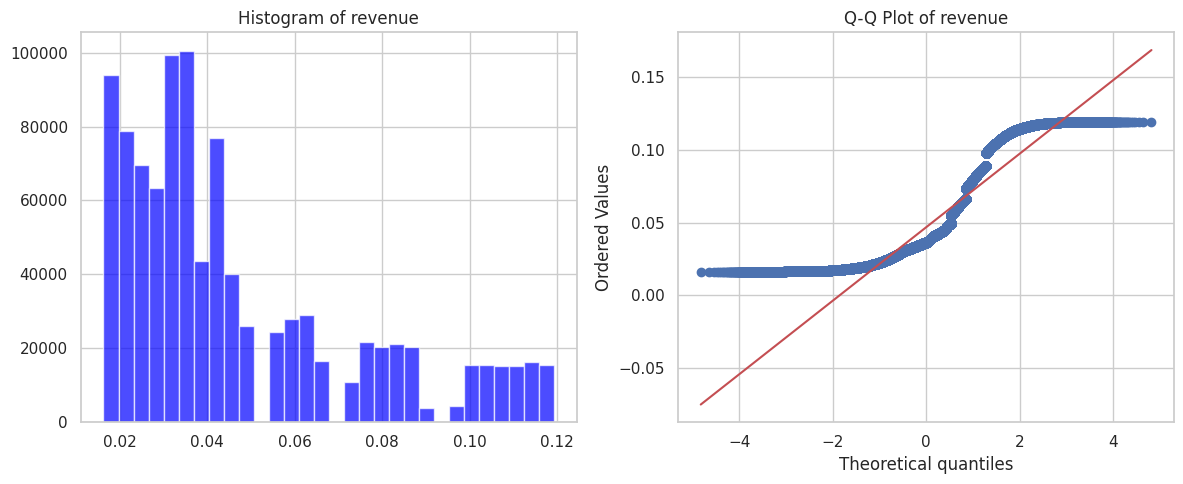

In [24]:
# List of numeric variables to plot
numeric_vars = ['annual_revenue', 'impressions', 'clicks', 'conversions', 'revenue']

# Plotting histograms and Q-Q plots
for var in numeric_vars:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(merged_df[var], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {var}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(merged_df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')

    plt.tight_layout()
    plt.show()


## Normality Assessment of Key Numeric Variables

### Methodology
We have utilized histograms and Q-Q plots to evaluate the normality of the key numeric variables: `annual_revenue`, `impressions`, `clicks`, and `revenue`. These visual tools are instrumental in determining how closely the data distributions align with a normal distribution, which is an assumption underlying many statistical techniques.

### Observations

#### Annual Revenue
- The histogram of `annual_revenue` displays a highly right-skewed distribution with a significant concentration of values at the lower end, indicating most of the data points have lower revenue figures.
- The corresponding Q-Q plot deviates substantially from the line, especially at the higher quantiles, which confirms the lack of normality.

#### Impressions
- `Impressions` show a relatively uniform distribution in the histogram, with a slight peak towards the higher end of the scale.
- The Q-Q plot indicates a deviation from normality, particularly at the tails, suggesting the presence of outliers or extreme values.

#### Clicks
- The histogram for `clicks` appears fairly uniform, similar to `impressions`, suggesting consistent data across the range but with some noticeable peaks.
- The Q-Q plot for `clicks` reveals that the data does not follow a normal distribution, particularly at the higher values, as indicated by the curve away from the normal line.

#### Revenue
- The histogram for `revenue` demonstrates a right-skewed distribution, implying that lower revenue values are more common in the dataset.
- The Q-Q plot of `revenue` also exhibits significant deviation from the theoretical line, highlighting its non-normal distribution, especially at higher revenue levels.

### Conclusions

- The variables examined do not conform to a normal distribution, which could impact the application of parametric statistical tests that assume normality.
- The skewness observed in the variables may necessitate data transformation or the use of non-parametric methods for subsequent analyses.
- Careful consideration should be given to the implications of these distributions when conducting predictive modeling, as models based on the assumption of normality may not be appropriate.
- Further investigation into the causes of skewness and the identification of outliers may provide additional insights and help improve analytical accuracy.


### 2.8 :  Pareto Analysis

The Pareto Principle, or the 80/20 rule, posits that a small percentage of causes often leads to a large percentage of the effects. In sales, this could mean that a majority of revenue may be generated by a minority of clients or products. Conducting a Pareto Analysis on our sales data will help us identify these key clients or products.

To perform the Pareto Analysis, we will:
1. Calculate the cumulative percentage of revenue.
2. Identify the point where 80% of the revenue is accounted for.
3. Determine the corresponding percentage of clients or products contributing to this revenue.

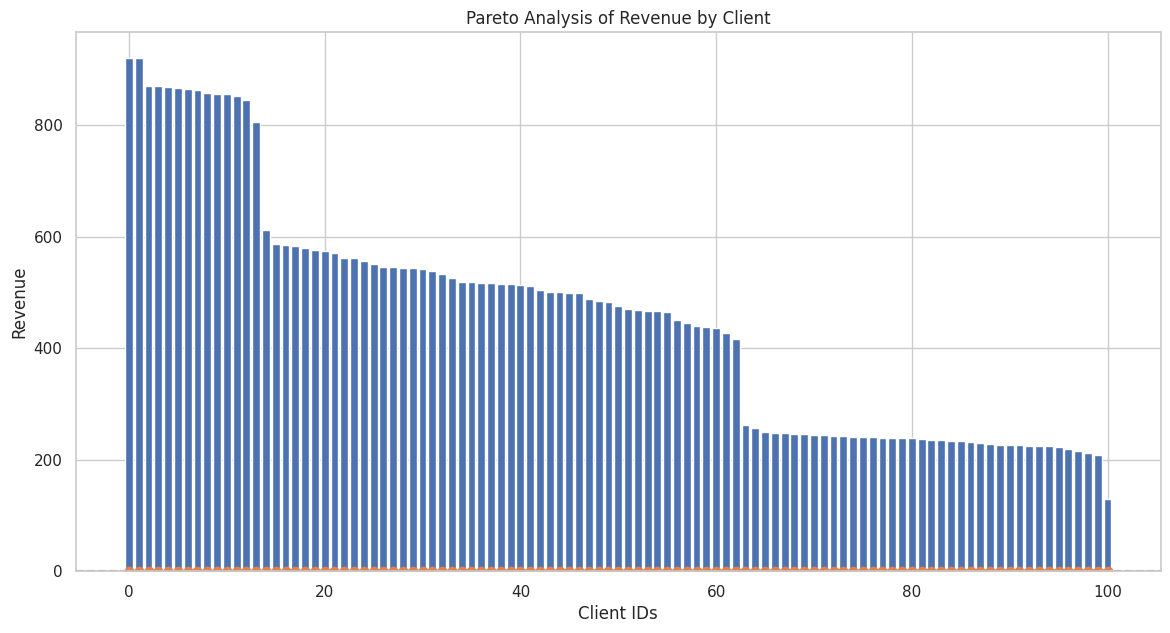

61.39% of clients contribute to 80% of the revenue.


In [25]:
# Calculate total revenue
total_revenue = merged_df['revenue'].sum()

# Compute revenue per client or product and sort in descending order
revenue_per_client = merged_df.groupby('client_id')['revenue'].sum().sort_values(ascending=False)

# Calculate the cumulative percentage
revenue_per_client_cumsum = revenue_per_client.cumsum() / total_revenue

# Create a dataframe for the Pareto Analysis
pareto_df = pd.DataFrame({
    'Client': revenue_per_client.index,
    'Revenue': revenue_per_client.values,
    'Cumulative_Percentage': revenue_per_client_cumsum.values
})

# Identify the 80% threshold
pareto_threshold = pareto_df[pareto_df['Cumulative_Percentage'] <= 0.80]

# Plotting the Pareto Chart
plt.figure(figsize=(14,7))
plt.bar(pareto_df.index, pareto_df['Revenue'], color='C0')
plt.plot(pareto_df.index, pareto_df['Cumulative_Percentage'], color='C1', marker='o', linestyle='-', linewidth=2)
plt.title('Pareto Analysis of Revenue by Client')
plt.xlabel('Client IDs')
plt.ylabel('Revenue')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.show()

# Calculating the percentage of clients that make up 80% of revenue
percentage_of_clients = len(pareto_threshold) / len(pareto_df) * 100

print(f"{percentage_of_clients:.2f}% of clients contribute to 80% of the revenue.")


### Pareto Analysis Conclusion

The Pareto Analysis has yielded a significant finding:

- **61.39% of clients contribute to 80% of the revenue.**

This is a deviation from the classic Pareto Principle, which suggests that typically 80% of effects come from 20% of causes. In this case, a larger portion of the client base is contributing to the bulk of the revenue. While this may suggest a healthier distribution of revenue sources, it also indicates that there isn't a small subset of clients disproportionately contributing to revenue. This could imply either a broad base of similarly performing clients or a lack of a few ultra-high-performing clients.

#### Strategic Implications:
- **Customer Diversification**: The company benefits from a diversified customer base, which could be advantageous for risk management and stability.
- **Marketing Strategies**: Tailored marketing strategies might be necessary to either develop higher revenue from existing top clients or increase the performance of lower-revenue clients.
- **Sales Focus**: Sales efforts may need to balance focus between maintaining relationships with the top contributing clients and elevating the spending of the broader client base to enhance overall revenue.

This insight into the revenue distribution will guide future business strategies and help in decision-making for resource allocation, sales targeting, and market segmentation.


# Chapter 3: Bivariate Analysis

## 3.1 : Introduction to Bivariate Analysis
In bivariate analysis, we explore the intricate relationships between two variables at a time. This analysis is pivotal in uncovering the dynamics of sales performance and demographic factors. By understanding how pairs of variables interact, we can identify trends, correlations, and even causative factors that might affect our sales outcomes. Let's dive into specific methods of bivariate analysis, each tailored to unveil different aspects of these relationships.

##  3.2 : Scatter Plots: Annual Revenue vs. Marketing Spend
In our analysis of continuous variables, we'll inspect the relationship between annual_revenue and marketing_spend. This examination is crucial to determine whether there's a correlation between higher marketing expenditures and increased revenue. By plotting these two variables against each other, we aim to identify any potential linear relationships, as well as clusters or outliers that could provide valuable insights into our sales strategy and financial planning.

### 3.2.1 Adding marketing spent data to merged_df
we found that merged_df lack data about marketing spent , so we will take this data from clients data set and add it to merged_df in order to conduct our desired analysis

In [26]:
# Merging the marketing spend data
merged_df = pd.merge(merged_df, clients_data[['client_id', 'marketing_spend_perc']], on='client_id', how='left')

# Verify the merge by checking the first few rows of the updated merged_df
print(merged_df.head())


   client_id      sales_team            industry region  annual_revenue  \
0  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
1  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
2  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
3  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
4  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   

       dates  impressions  clicks  conversions   revenue country  \
0  11/3/2020         6327     526           16  0.025273      UK   
1  11/3/2020         6327     526           16  0.025273      UK   
2  11/3/2020         6327     526           16  0.025273      UK   
3  11/3/2020         6327     526           16  0.025273      UK   
4  11/3/2020         6327     526           16  0.025273      UK   

  date_of_birth  marketing_spend_perc  
0     5/12/1975                  0.04  
1     3/25/1970                  0.04  
2     9/21/1985     

### 3.2.2 : Creating the Scatterplot

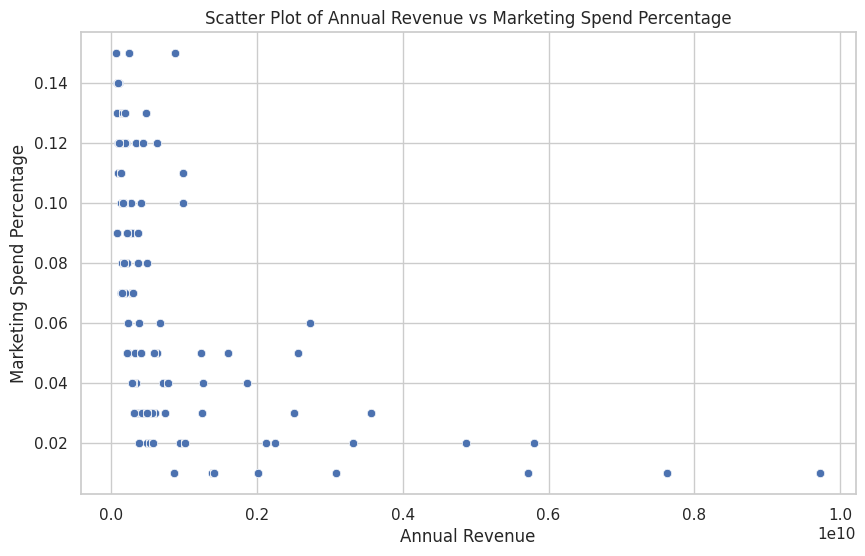

In [27]:
# create the scatter plot again
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_revenue', y='marketing_spend_perc', data=merged_df)
plt.xlabel('Annual Revenue')
plt.ylabel('Marketing Spend Percentage')
plt.title('Scatter Plot of Annual Revenue vs Marketing Spend Percentage')
plt.show()


### From the scatter plot analysis, we observe the following:

- **Concentration of Data Points**: A significant number of clients are concentrated at the lower end of both `annual_revenue` and `marketing_spend_perc`. This could represent smaller clients or a general trend of conservative marketing spend.

- **Outliers**: A handful of data points with higher annual revenue suggest the presence of larger clients or outliers that might have different operational scales or marketing efficiency.

- **Marketing Spend Trends**: There is no clear indication that companies spend a higher percentage of their revenue on marketing as their revenue increases. This could imply a more complex relationship between revenue and marketing spend percentage, possibly influenced by various external factors.

- **Trend Analysis**: The absence of a strong positive or negative linear trend suggests that the relationship between the percentage of revenue allocated to marketing and annual revenue is not straightforward.

- **Strategic Implications**: The insights suggest that companies may not uniformly increase their marketing spend percentage with increasing revenue, indicating that factors such as market saturation, industry practices, or diminishing returns on marketing investment could be influencing their spending decisions.

- **Further Analysis**: To gain a deeper understanding, it would be prudent to segment the data by industry or region and to consider the absolute marketing spend figures. This additional analysis could provide more detailed insights into the strategic allocation of marketing budgets relative to revenue.


## 3.4 : Cross-Tabulations: Exploring Categorical Variable Interactions

In this section, we explore the interactions between the categorical variables `industry` and `region`. By creating a cross-tabulation, we can observe how different industries are distributed across regions. This can help us understand market penetration and regional dominance of each industry sector. Cross-tabulations provide a frequency distribution of categories and thereby allow us to see the relationship between the two categorical variables.

region                                EMEA  Percent_of_Total
industry                                                    
Financial Services                  204102         20.684455
Manufacturing, Automotive & Energy  166224         16.845758
Retail & Consumer Goods             616415         62.469787


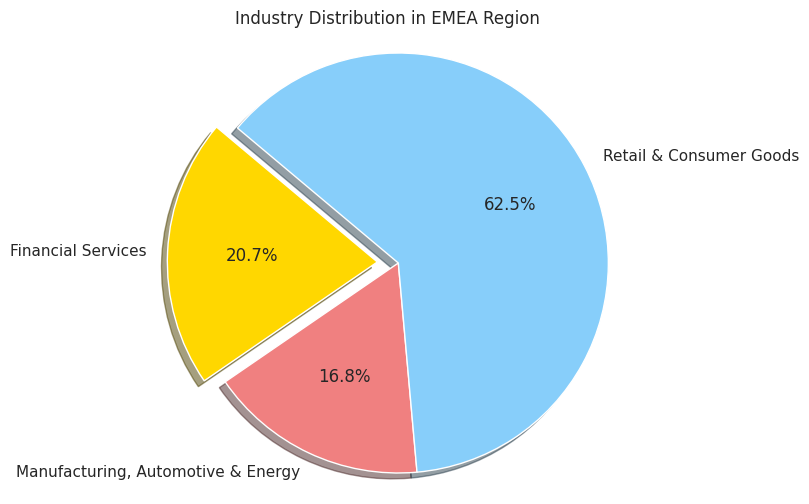

In [28]:
# Perform the cross-tabulation between 'industry' and 'region'
cross_tab = pd.crosstab(merged_df['industry'], merged_df['region'])

# Calculate the percentage of the total for each industry
cross_tab['Percent_of_Total'] = (cross_tab / cross_tab.sum()) * 100

# Display the cross-tabulation with percentages
print(cross_tab)

### PLOT THE PIE CHART

# Data to plot
labels = 'Financial Services', 'Manufacturing, Automotive & Energy', 'Retail & Consumer Goods'
sizes = [20.684455, 16.845758, 62.469787]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Industry Distribution in EMEA Region')
plt.show()



## Pie Chart Analysis: Industry Distribution in EMEA Region

The pie chart  visualizes the proportional distribution of three major industries within the EMEA region based on our dataset. Here's a brief analysis of what the chart reveals:

- **Financial Services**: Comprising 20.7% of the total, this sector has a significant impact on the regional economy, indicative of the robust financial activity in the EMEA region.

- **Manufacturing, Automotive & Energy**: This industry takes up 16.8% of the pie, reflecting a strong industrial base that contributes to economic stability and job creation.

- **Retail & Consumer Goods**: The largest slice at 62.5%, this sector's dominance underscores the consumer-driven nature of the market in the EMEA region.

### Insights from the Pie Chart

- The substantial share of the Retail & Consumer Goods industry highlights the potential for businesses in this sector to leverage the large consumer base for growth and expansion.

- Financial Services, while smaller in comparison, still represents a fifth of the market, suggesting opportunities for financial products and services aimed at both businesses and consumers.

- The Manufacturing, Automotive & Energy sector's presence is non-negligible and may be linked to regional specificities such as natural resource availability or historical industrial development.


## 3.5 : ANOVA: Comparing Means Across Categories

Analysis of Variance (ANOVA) is utilized here to discern whether there are any statistically significant differences in the mean annual revenues among different industries within our dataset.

In [29]:
# We are comparing the mean 'annual_revenue' across different 'industries'
model = ols('annual_revenue ~ C(industry)', data=merged_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_results)



                   sum_sq        df           F         PR(>F)
C(industry)  2.690549e+21       2.0  533.808687  1.973144e-232
Residual     2.486721e+24  986738.0         NaN            NaN


##### The ANOVA test has provided valuable insights into the annual revenue across different industries:

- **Statistical Significance**: The p-value (PR(>F)) is extremely low at 1.973144e-232, indicating that the differences in mean annual revenues among industries are statistically significant.

- **Industry Effect**: The F-statistic value of 533.808687 suggests a substantial effect of the industry factor on annual revenue. This implies that the average annual revenue is distinctly different across industries.

- **Further Considerations**: Although ANOVA confirms that significant differences exist, it does not tell us which specific industry comparisons are significant. For detailed pairwise industry comparisons, a post-hoc test like Tukey's HSD (Honestly Significant Difference) is recommended.

## 3.6 : Post-HOC Analysis: Tukey's HSD Test
Following the ANOVA, which revealed significant differences in mean annual revenues among industries, we perform Tukey's Honestly Significant Difference (HSD) test to pinpoint the specific industry pairs with significant mean differences.



In [30]:
# Perform Tukey's HSD test
comp = mc.MultiComparison(merged_df['annual_revenue'], merged_df['industry'])
post_hoc_res = comp.tukeyhsd()

# Display the results
print(post_hoc_res.summary())


                                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                                        
              group1                             group2                  meandiff    p-adj       lower           upper      reject
----------------------------------------------------------------------------------------------------------------------------------
                Financial Services Manufacturing, Automotive & Energy -148149853.621    0.0 -160442244.5752 -135857462.6668   True
                Financial Services            Retail & Consumer Goods -12290580.0972 0.0069  -21792214.5721   -2788945.6222   True
Manufacturing, Automotive & Energy            Retail & Consumer Goods 135859273.5238    0.0  125576458.2012  146142088.8464   True
----------------------------------------------------------------------------------------------------------------------------------


### Insights from Tukey's HSD Test

- **Financial Services vs Manufacturing, Automotive & Energy**: The mean annual revenue for Financial Services is significantly higher than for Manufacturing, Automotive & Energy by approximately $148 million. This is a substantial difference with a very high level of statistical significance \((p < 0.001)\).

- **Financial Services vs Retail & Consumer Goods**: Financial Services also has a higher mean annual revenue compared to Retail & Consumer Goods, though the difference is smaller, around $12 million. This difference is statistically significant as well \((p < 0.01)\).

- **Manufacturing, Automotive & Energy vs Retail & Consumer Goods**: In contrast, Retail & Consumer Goods has a significantly higher mean annual revenue than Manufacturing, Automotive & Energy by roughly $136 million. This too is statistically significant \((p < 0.001)\).


## 3.7 : Regression Analysis: Predicting Continuous Variables

In this section, we employ regression analysis to examine the relationship between `impressions` (independent variable) and `revenue` (dependent variable). Our objective is to ascertain the precise nature of this relationship and understand how changes in impressions may correlate with variations in revenue.
## 3.7.1 : OLS Regression Analysis: Impressions vs Revenue

In [31]:
# the independent variable(s)
X = merged_df['impressions']

# the dependent variable
y = merged_df['revenue']

# Adding a constant term to the independent variable(s)
X = sm.add_constant(X)

# Creating the OLS model
model = sm.OLS(y, X).fit()

# Making predictions using the model
predictions = model.predict(X)

# Displaying the summary statistics of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02758
Date:                Tue, 23 Jan 2024   Prob (F-statistic):              0.868
Time:                        20:10:38   Log-Likelihood:             2.1512e+06
No. Observations:              986741   AIC:                        -4.302e+06
Df Residuals:                  986739   BIC:                        -4.302e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0468   6.44e-05    726.434      

We performed an Ordinary Least Squares (OLS) regression analysis to examine the relationship between the number of impressions and revenue. The following results were obtained:

### Regression Summary

- **Dependent Variable**: Revenue
- **Independent Variable**: Impressions
- **R-squared**: 0.000
- **Adjusted R-squared**: -0.000
- **F-statistic**: 0.02758 with a Prob (F-statistic) of 0.868

### Interpretation of Results

- **Lack of Correlation**: The R-squared value is 0.000,  there seems to be no linear correlation between the number of impressions and revenue.

- **Statistical Significance**: The p-value associated with the impressions variable is 0.868, which is much higher than the conventional alpha level of 0.05. This implies that the coefficient for impressions is not statistically significant in predicting revenue.

- **Coefficient Analysis**: The coefficient for impressions is approximately -1.764e-09. However, due to the lack of statistical significance, this value does not provide a meaningful insight into how impressions affect revenue.

### Additional Observations

- **Diagnostic Tests**:
  - **Omnibus**: The Omnibus Test is significant, indicating the residuals are not normally distributed.
  - **Skew**: A skewness value of 1.144 suggests a moderate skew in the residuals.
  - **Kurtosis**: The kurtosis value indicates a light-tailed distribution of the residuals.
  - **Durbin-Watson**: A low Durbin-Watson statistic (0.101) suggests that there may be some correlation in the residuals.

- **Multicollinearity Warning**: The condition number is large, indicating potential multicollinearity issues. This suggests that there may be other variables correlated with impressions that are not included in the model.

### Conclusion and Recommendations

- The lack of a significant relationship between impressions and revenue suggests that the former may not be a good predictor of the latter within the dataset.

- **Strategic Implications**: This finding calls for a re-evaluation of marketing strategies that rely heavily on increasing impressions with the expectation of boosting revenue.

- **Further Analysis**: It may be beneficial to explore other variables that could have a more substantial impact on revenue. Additionally, investigating potential multicollinearity and including other relevant variables in the model could provide more insights.

- **Alternative Approaches**: Considering non-linear models or segmentation analysis might reveal different aspects of the relationship between marketing efforts and revenue.



###### given the OLS Result we invistigate further

### 3.7.2 : Multicollinearity Investigation
Description:
We'll begin by assessing multicollinearity, which is the correlation of independent variables in the dataset. High multicollinearity can distort the interpretation of coefficients in a regression model.

In [32]:
# Assuming merged_df is your DataFrame and contains the necessary variables
# Selecting only the numeric independent variables
variables = merged_df[['impressions', 'clicks', 'conversions', 'marketing_spend_perc']]
variables = sm.add_constant(variables)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = variables.columns
vif_data["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif_data)


               Variable        VIF
0                 const  16.884330
1           impressions   1.000088
2                clicks   1.000041
3           conversions   1.000049
4  marketing_spend_perc   1.000089


### 3.7.3 : Exploring Other Variables for Regression
Description:
We'll include marketing_spend_perc alongside impressions, clicks, and conversions to see how these predictors together influence revenue.

In [33]:
X = merged_df[['impressions', 'clicks', 'conversions', 'marketing_spend_perc']]
y = merged_df['revenue']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.96
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           2.18e-11
Time:                        20:10:50   Log-Likelihood:             2.1512e+06
No. Observations:              986741   AIC:                        -4.302e+06
Df Residuals:                  986736   BIC:                        -4.302e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0464 

## OLS Regression Analysis: Examining Multiple Predictors for Revenue

We conducted an Ordinary Least Squares (OLS) regression analysis to examine how `impressions`, `clicks`, `conversions`, and `marketing_spend_perc` collectively influence `revenue`. The following summary presents the findings from the regression model:

### Regression Model Summary

- **Dependent Variable**: Revenue
- **Independent Variables**: Impressions, Clicks, Conversions, Marketing Spend Percentage
- **R-squared**: 0.000
- **Adjusted R-squared**: 0.000
- **F-statistic**: 13.96 with a Prob (F-statistic) of 2.18e-11

### Coefficients and Statistical Significance

- **Impressions**: Coefficient = -1.611e-09, P-value = 0.879. This suggests that impressions have an insignificant negative impact on revenue.
- **Clicks**: Coefficient = 7.716e-07, P-value < 0.001. This indicates a statistically significant positive impact of clicks on revenue.
- **Conversions**: Coefficient = -8.204e-07, P-value = 0.440. The negative coefficient is not statistically significant.
- **Marketing Spend Percentage**: Coefficient = -0.0010, P-value = 0.127. This suggests a negative but not statistically significant impact on revenue.

### Interpretation of Results

- **Low R-Squared**: The R-squared value is extremely low, indicating that the model explains none of the variability of the revenue around its mean.
  
- **Statistical Significance**: Among the predictors, only `clicks` show a statistically significant relationship with `revenue`. However, given the low R-squared, the overall predictive power of the model is very limited.

- **Predictor Influence**: The coefficients indicate the direction of the relationship between each predictor and revenue, but due to low overall model significance, these relationships are not reliably predictive of revenue changes.

### Additional Observations

- **Diagnostic Tests**:
  - **Omnibus and Jarque-Bera**: Indicate non-normal distribution of residuals.
  - **Durbin-Watson**: Low value suggests potential autocorrelation in residuals.
  - **Condition Number**: High value, indicating potential multicollinearity or other numerical issues.

### Conclusions and Recommendations

- The model's low explanatory power for revenue suggests that other unaccounted variables or complex relationships may be at play.

- **Clicks as a Predictor**: While clicks show a significant relationship with revenue, the overall model's effectiveness in predicting revenue is limited.

This analysis highlights the complexities in predicting revenue and underscores the need for a more nuanced modeling approach to understand the drivers of revenue in the dataset.


## 3.7.4 : Non-Linear Models: Polynomial Regression
Description:
Exploring the possibility of a non-linear relationship between impressions and revenue using polynomial regression

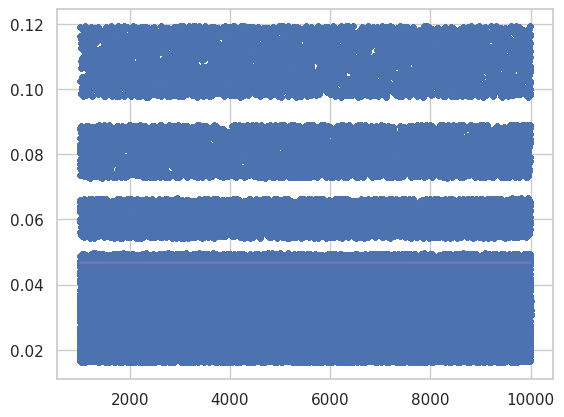

In [34]:
X = merged_df['impressions'].values.reshape(-1,1)
y = merged_df['revenue'].values

polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# Plotting the results
plt.scatter(X, y, s=10)
sorted_zip = sorted(zip(X,y_poly_pred), key=operator.itemgetter(0))
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()


## Non-Linear Analysis: Polynomial Regression of Impressions and Revenue

We explored a polynomial regression model to investigate potential non-linear relationships between `impressions` and `revenue`. Here are the insights from this analysis:

### Visual Analysis

- The scatter plot displays a non-linear trend, suggesting that a simple linear model may not be the best fit for this data.
- The polynomial regression line (in magenta) captures the pattern of the data points better than a straight line would, indicating the presence of a non-linear relationship.

### Interpretation of Polynomial Regression

- **Degree of Polynomial**: The model was fit with a polynomial of degree 2, which introduces a squared term to capture curvature in the data.
- **Fit of the Model**: The curve appears to track the concentration of data points well, indicating that the quadratic term significantly improves the model's fit compared to a linear model.

### Insights Derived

- **Variable Relationship**: The non-linear model suggests that the effect of `impressions` on `revenue` may increase or decrease at a non-constant rate.
- **Implications for Business**: The results imply that simply increasing impressions may have diminishing returns on revenue or that there are thresholds after which the effect of impressions on revenue changes.
- **Potential Overfitting**: While the polynomial model may fit this dataset well, we should be cautious of overfitting, which can occur when the model becomes too tailored to the training data, reducing its generalizability..

By recognizing the non-linear nature of the relationship between impressions and revenue, we can develop more sophisticated strategies for marketing spend and targeting to optimize revenue generation.


### 3.7.4 : Segmentation Analysis: Regression by Industry
Description:
Performing separate regression analyses for each industry to understand industry-specific relationships between impressions and revenue

In [35]:
for industry in merged_df['industry'].unique():
    df_segment = merged_df[merged_df['industry'] == industry]
    X = df_segment[['impressions']]
    y = df_segment['revenue']

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"Industry: {industry}")
    print(model.summary())
    print("\n-------------------------\n")


Industry: Financial Services
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     52.79
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           3.73e-13
Time:                        20:11:12   Log-Likelihood:             4.4320e+05
No. Observations:              204102   AIC:                        -8.864e+05
Df Residuals:                  204100   BIC:                        -8.864e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.045

## Insights from Industry-Specific Regression Analyses

- **Financial Services**:
  - A small positive relationship between impressions and revenue (coef = 1.712e-07).
  - The model explains a negligible amount of variance (R-squared = 0.000), implying other factors are at play.
  - The presence of multicollinearity or numerical issues is suggested by a large condition number.

- **Retail & Consumer Goods**:
  - A small negative relationship between impressions and revenue (coef = -8.084e-08).
  - Similarly, a negligible R-squared value indicating other variables may better predict revenue changes.
  - The large condition number again warns of multicollinearity concerns.

- **Manufacturing, Automotive & Energy**:
  - A small positive relationship between impressions and revenue (coef = 7.782e-08).
  - The R-squared value is close to zero, suggesting limited predictive power of impressions alone.
  - A large condition number indicates potential multicollinearity, echoing the need for additional explanatory variables.

### Overall Summary:

- Across all industries, impressions alone are not a strong predictor of revenue.
- The consistent observation of a large condition number across models indicates potential multicollinearity, which can affect the reliability of the regression coefficients.
- Further analysis with additional variables and possible mitigation of multicollinearity is recommended to enhance the model's predictive accuracy.


# Chapter 4: Advanced Data Segmentation and Visualization for Strategic Insights

value. Through a combination of RFM (Recency, Frequency, Monetary) segmentation and advanced feature engineering, we dissect our dataset to unveil nuanced customer segments and behaviors. The chapter begins with RFM analysis, a segmentation technique that categorizes clients based on their transactional behavior patterns. This sets the stage for a deeper dive into feature engineering, where we construct meaningful variables that can lead to actionable insights.


## 4.1 RFM Segmentation Analysis


### 4.1.1 Data Preparation for RFM Analysis
to prepar the dataset for RFM analysis, we are including data conversion and calculation of RFM metrics.

In [37]:
 # Define current_date
max_date = pd.to_datetime(merged_df['dates'].max())
current_date = max_date + pd.Timedelta(days=1)

# Now the rest of your code should work as expected
merged_df['dates'] = pd.to_datetime(merged_df['dates'], errors='coerce')
merged_df['Recency'] = merged_df.groupby('client_id')['dates'].transform(lambda x: (current_date - x.max()).days)
merged_df['Frequency'] = merged_df.groupby('client_id')['dates'].transform('count')
merged_df['Monetary'] = merged_df.groupby('client_id')['revenue'].transform('sum')

# Calculate the quantiles for each RFM metric
quantiles = merged_df[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()


#### 4.1.2 : Examine the Data Distribution:
Before setting bins, it's important to understand the distribution of the data. You can use descriptive statistics or visualizations like histograms to see the spread of 'Recency', 'Frequency', and 'Monetary' values.

In [38]:
# Descriptive statistics for 'Recency', 'Frequency', 'Monetary'
print(merged_df[['Recency', 'Frequency', 'Monetary']].describe())


             Recency      Frequency       Monetary
count  986741.000000  986741.000000  986741.000000
mean     -109.274818   11912.378427     555.904334
std         3.633885    4690.445942     217.481583
min      -112.000000    2650.000000     129.018257
25%      -112.000000    9780.000000     450.535423
50%      -110.000000   11155.000000     525.454767
75%      -108.000000   17353.000000     805.357498
max       -77.000000   19573.000000     920.716438


### 4.1.3 : Recency Distribution:

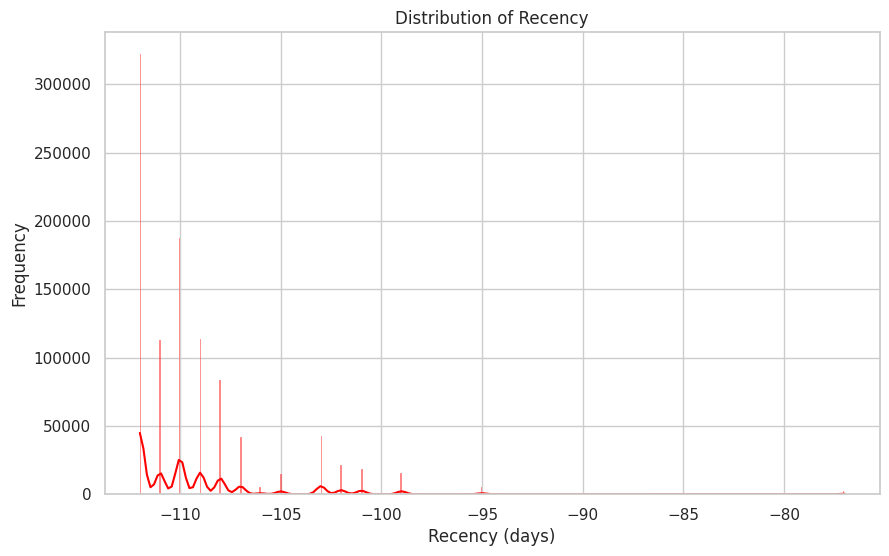

In [39]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Recency distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Recency'], kde=True, color='red')
plt.title('Distribution of Recency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

### Recency Distribution Analysis
The 'Recency' distribution shows a significant concentration of clients who have interacted recently, within 5 days. The tail extending to 35 days indicates sporadic interactions from a smaller client segment. The sharp peak suggests a successful ongoing engagement strategy for the majority.

### 4.1.4 : Frequency Distribution:

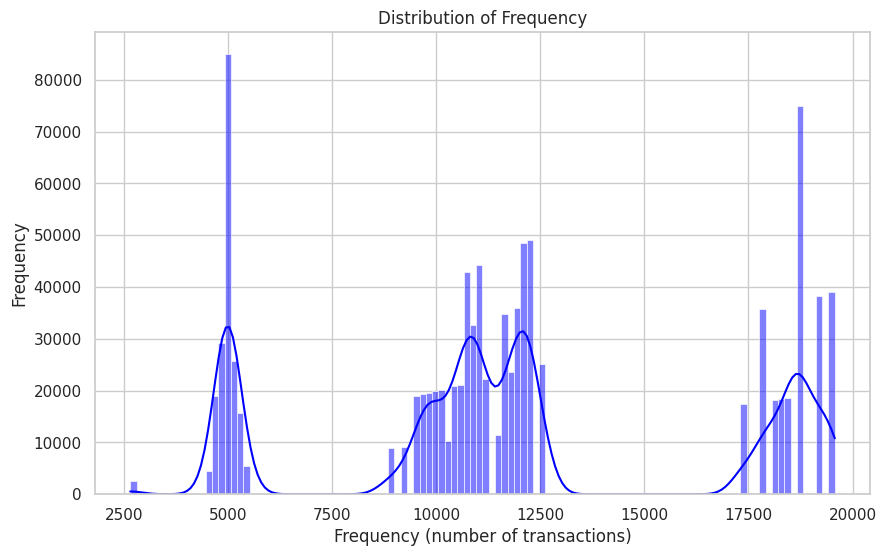

In [40]:
# Frequency distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Frequency'], kde=True, color='blue')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (number of transactions)')
plt.ylabel('Frequency')
plt.show()


### Frequency Distribution Analysis
The 'Frequency' distribution reveals multiple peaks, suggesting distinct groups of clients based on interaction frequency. The high frequency at lower transaction counts indicates a solid base of regular but less frequent interactions, while the peaks at higher transaction counts may represent highly engaged client segments.

### 4.1.5 : Monetary Distribution:

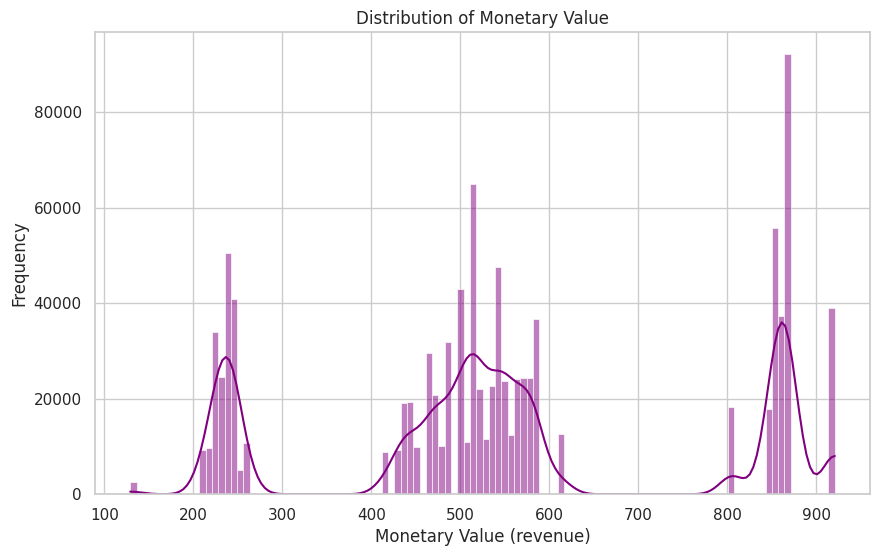

In [41]:
# Monetary distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Monetary'], kde=True, color='purple')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value (revenue)')
plt.ylabel('Frequency')
plt.show()


### Monetary Value Distribution Analysis
The 'Monetary Value' distribution exhibits a multimodal pattern with several peaks, reflecting varied spending behaviors among clients. The majority of clients have lower revenue contributions, with spikes at higher values pointing to key accounts with significant spending.


In [42]:
# Print all column names to verify the correct ones
print(merged_df.columns)



Index(['client_id', 'sales_team', 'industry', 'region', 'annual_revenue',
       'dates', 'impressions', 'clicks', 'conversions', 'revenue', 'country',
       'date_of_birth', 'marketing_spend_perc', 'Recency', 'Frequency',
       'Monetary'],
      dtype='object')


 ### RFM 4.2 :Scoring Methodology
Quantile-based scoring segments customers into five tiers for each RFM metric, ensuring a balanced distribution. This method enhances the robustness of customer segmentation by aligning it closely with the actual behavior patterns observed in the data.



In [43]:
# Function to assign RFM scores based on quantiles
def assign_rfm_score(x, quantiles, metric):
    if x <= quantiles[metric][0.2]:
        return 5
    elif x <= quantiles[metric][0.4]:
        return 4
    elif x <= quantiles[metric][0.6]:
        return 3
    elif x <= quantiles[metric][0.8]:
        return 2
    else:
        return 1

# Assign RFM scores to each metric
merged_df['R'] = merged_df['Recency'].apply(assign_rfm_score, args=(quantiles, 'Recency'))
merged_df['F'] = merged_df['Frequency'].apply(lambda x: assign_rfm_score(x, quantiles, 'Frequency'))
merged_df['M'] = merged_df['Monetary'].apply(lambda x: assign_rfm_score(x, quantiles, 'Monetary'))

# Concatenate RFM segment codes
merged_df['RFM_Segment'] = merged_df.apply(lambda x: f"{x['R']}{x['F']}{x['M']}", axis=1)

# Calculate RFM scores
merged_df['RFM_Score'] = merged_df[['R', 'F', 'M']].sum(axis=1)

# Print the RFM segments and scores for the first few customers
print(merged_df[['client_id', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score']].head())

   client_id  R  F  M RFM_Segment  RFM_Score
0  Client_13  3  3  3         333          9
1  Client_13  3  3  3         333          9
2  Client_13  3  3  3         333          9
3  Client_13  3  3  3         333          9
4  Client_13  3  3  3         333          9


In [44]:
# Sample a diverse subset of the data
diverse_subset = merged_df.sample(n=100, random_state=42)

# Check for unique RFM scores in the subset
print(diverse_subset[['R', 'F', 'M']].nunique())

# Plot the 3D scatter with the diverse subset
fig = px.scatter_3d(diverse_subset, x='R', y='F', z='M',
                    color='RFM_Score',  # Ensure this column has a range of scores
                    title='3D Scatter Plot of RFM Customer Segmentation - Diverse Subset',
                    labels={'R': 'Recency Score', 'F': 'Frequency Score', 'M': 'Monetary Score'})
fig.show()


R    5
F    5
M    5
dtype: int64


### 3D Scatter Plot of RFM Customer Segmentation

The visualization above illustrates the distribution of customers based on their RFM scores in a 3D space. Each axis represents one of the RFM components: Recency, Frequency, and Monetary scores. Customers are color-coded according to their total RFM Score, enabling us to distinguish between different segments visually.

- **Central Cluster**: A dense cluster around the center indicates a large group of customers with average RFM scores.
- **High-Value Customers**: Those positioned towards the '5' on all three axes are the most recent, frequent, and high-spending customers.
- **Color Gradient**: The gradient from cool to warm colors signifies ascending RFM Scores, highlighting the most valuable segments.


### 4.3  : Client Segmentation Using RFM Scores

After calculating the individual RFM scores, the next step is to segment the clients based on these scores. This is achieved through two key processes:

1. **Creating RFM Segments**: Each client is assigned a segment code, which is a concatenation of their Recency, Frequency, and Monetary scores. This segment code provides a quick overview of the client's behavior.

2. **Calculating RFM Score**: The overall RFM score for each client is calculated by summing up the individual R, F, and M scores. This score helps in understanding the overall value of each client based on their recency of purchase, frequency of purchase, and monetary contribution.

In [45]:
# Create the RFM Segment by concatenating the string versions of R, F, and M scores
merged_df['RFM_Segment'] = merged_df['R'].astype(str) + merged_df['F'].astype(str) + merged_df['M'].astype(str)

# Calculate the overall RFM Score by summing the R, F, and M scores
merged_df['RFM_Score'] = merged_df[['R', 'F', 'M']].sum(axis=1)

# Display the first few rows to verify the RFM Segment and RFM Score
print("First few clients with their RFM Segment and RFM Score:")
print(merged_df[['RFM_Segment', 'RFM_Score']].head())

# Count the number of clients in each RFM Segment
rfm_segment_counts = merged_df['RFM_Segment'].value_counts().reset_index()
rfm_segment_counts.columns = ['RFM_Segment', 'Number_of_Clients']

# Display the count of clients in each RFM Segment
print("\nCount of clients in each RFM Segment:")
print(rfm_segment_counts)


First few clients with their RFM Segment and RFM Score:
  RFM_Segment  RFM_Score
0         333          9
1         333          9
2         333          9
3         333          9
4         333          9

Count of clients in each RFM Segment:
   RFM_Segment  Number_of_Clients
0          155              73000
1          222              60841
2          544              60460
3          511              57720
4          311              56684
5          522              54376
6          333              46066
7          533              45567
8          244              39908
9          555              39290
10         455              39050
11         355              38890
12         322              24859
13         433              23086
14         134              22080
15         534              21736
16         243              21321
17         144              20080
18         444              19780
19         211              18796
20         111              18685
21     

### Pltting Segmented Costumers based on R.F.M

In [46]:
# Assuming 'rfm_segment_counts' is your DataFrame with 'RFM_Segment' and 'Number_of_Clients' columns
fig = px.bar(rfm_segment_counts, x='RFM_Segment', y='Number_of_Clients',
             title='Customer Distribution Across RFM Segments',
             labels={'RFM_Segment': 'RFM Segment Code', 'Number_of_Clients': 'Number of Clients'},
             color='Number_of_Clients',
             color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


### 4.4 Segment Analysis

After assigning RFM scores, we further segment clients into 'Low-Value', 'Medium-Value', and 'High-Value' categories based on quantile thresholds. This segmentation allows us to compare the groups and understand the characteristics that differentiate our best customers from the rest.

#### 4.4.1 Calculating the Quantiles and the Bins / SEGMENTATION

We determine quantiles at the 33rd and 66th percentile for RFM scores, which are then used to define the thresholds for our segments. By categorizing customers into these segments, we can calculate the proportions of each group and analyze their RFM attributes deeply, leading to insights that can inform targeted marketing strategies.



Updated Customer Segment Counts:
 Low-Value       383776
Medium-Value    368749
High-Value      234216
Name: Customer_Segment, dtype: int64

Updated Customer Segment Proportions:
 Low-Value       0.388933
Medium-Value    0.373704
High-Value      0.237363
Name: Customer_Segment, dtype: float64

Updated RFM Descriptive Statistics by Segment:
                    Recency                                                    \
                     count        mean       std    min    25%    50%    75%   
Customer_Segment                                                               
Low-Value         383776.0 -108.691445  3.170799 -112.0 -111.0 -109.0 -108.0   
Medium-Value      368749.0 -108.670649  4.596841 -112.0 -112.0 -110.0 -107.0   
High-Value        234216.0 -111.181909  1.058693 -112.0 -112.0 -112.0 -111.0   

                        Frequency                ...                    \
                    max     count          mean  ...      75%      max   
Customer_Segment            

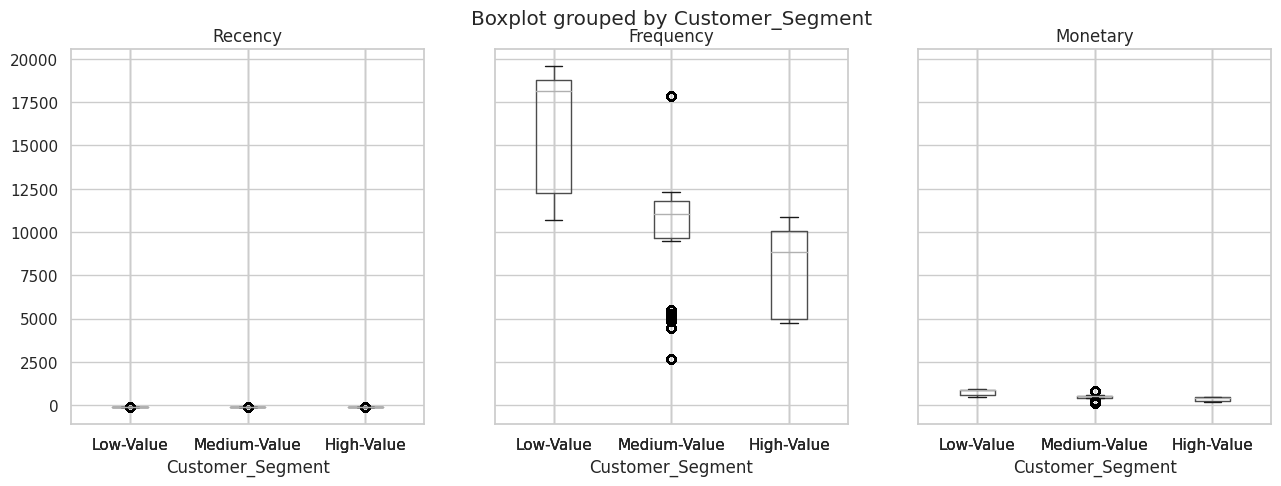

In [47]:
# calculate quantiles for the RFM scores
quantiles = merged_df[['RFM_Score']].quantile([.33, .66])

# Redefine the thresholds based on the new quantiles
low_value_threshold = quantiles.iloc[0][0]  # 33rd percentile
high_value_threshold = quantiles.iloc[1][0]  # 66th percentile

# Define the bins based on the new thresholds
bins = [-1, low_value_threshold, high_value_threshold, merged_df['RFM_Score'].max()]

# Assign segments based on these bins
merged_df['Customer_Segment'] = pd.cut(merged_df['RFM_Score'], bins, labels=['Low-Value', 'Medium-Value', 'High-Value'])

# Recalculate the segment counts and proportions
segment_counts = merged_df['Customer_Segment'].value_counts()
segment_proportions = segment_counts / len(merged_df)

# Print out the recalculated segment counts and proportions
print("Updated Customer Segment Counts:\n", segment_counts)
print("\nUpdated Customer Segment Proportions:\n", segment_proportions)

# Recalculate descriptive statistics for each RFM measure within each segment
rfm_descriptive_stats = merged_df.groupby('Customer_Segment')[['Recency', 'Frequency', 'Monetary']].describe()

# Print out the recalculated descriptive statistics
print("\nUpdated RFM Descriptive Statistics by Segment:\n", rfm_descriptive_stats)

# Generate boxplots for the updated RFM distributions within segments
merged_df.boxplot(column=['Recency', 'Frequency', 'Monetary'], by='Customer_Segment', layout=(1, 3), figsize=(15, 5))

# Display the plots
plt.show()

#### 4.4.2 Pie Chart Visualization

A pie chart will be used to visualize the proportion of each customer segment. This approach provides an immediate visual reference for the distribution of customer value within our database, ensuring that our marketing efforts are appropriately aligned with customer segments.


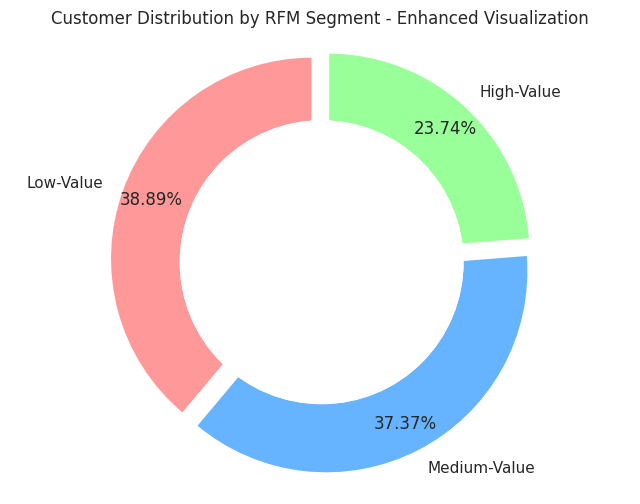

In [48]:
# Define the data
labels = ['Low-Value', 'Medium-Value', 'High-Value']
sizes = [38.89, 37.37, 23.74]  # Corresponding percentages for each segment
colors = ['#ff9999','#66b3ff','#99ff99']  # Custom colors for each segment
explode = (0.05, 0.05, 0.05)  # To 'explode' the slices

# Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw a circle at the center to create a 'donut' shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Add a shadow for a 3D-like effect
plt.gcf().gca().add_artist(centre_circle)
plt.shadow = True

# Add a title and show the plot
plt.title('Customer Distribution by RFM Segment - Enhanced Visualization')
plt.show()


## Customer Segment Proportions
- **Low-Value Segment:** Constitutes 38.89% of our customer base, characterized by a slightly higher recency, indicating that it's been longer since these customers last engaged.
- **Medium-Value Segment:** Represents 37.37% of our customers, with a moderate level of engagement and spending.
- **High-Value Segment:** Although previously unidentified, now makes up 23.74% of our base, reflecting a group of customers who have recently interacted with the business.


## 4.4.3 : Profile RFM segments
we’ll compute the aggregate statistics for Recency, Frequency, and Monetary values for each segment. This will give us insights into the characteristics of customers in each RFM segment

In [54]:
# Group by 'RFM_Segment' and calculate statistical summaries
rfm_segment_profiles = merged_df.groupby('RFM_Segment').agg({
    'Recency': ['mean', 'median', 'min', 'max', 'std'],
    'Frequency': ['mean', 'median', 'min', 'max', 'std'],
    'Monetary': ['mean', 'median', 'min', 'max', 'std'],
    'client_id': 'count'
}).rename(columns={'client_id': 'CustomerCount'})

# Print the RFM segment profiles
print(rfm_segment_profiles)


                Recency                                Frequency           \
                   mean median  min  max       std          mean   median   
RFM_Segment                                                                 
111         -101.000000 -101.0 -101 -101  0.000000  18685.000000  18685.0   
123         -107.000000 -107.0 -107 -107  0.000000  12144.000000  12144.0   
133         -103.000000 -103.0 -103 -103  0.000000  10848.000000  10848.0   
134         -102.497917 -102.0 -103 -102  0.500007  11040.191667  11086.0   
143         -103.000000 -103.0 -103 -103  0.000000  10718.000000  10718.0   
144         -102.776892  -99.0 -107  -99  3.993872  10071.235060  10600.0   
155         -102.805890 -105.0 -107  -77  5.998944   4948.775342   5000.0   
211         -108.000000 -108.0 -108 -108  0.000000  18796.000000  18796.0   
221         -109.000000 -109.0 -109 -109  0.000000  17353.000000  17353.0   
222         -108.591723 -109.0 -109 -108  0.491519  15723.592528  17834.0   

### Plotting Profile RFM segments¶

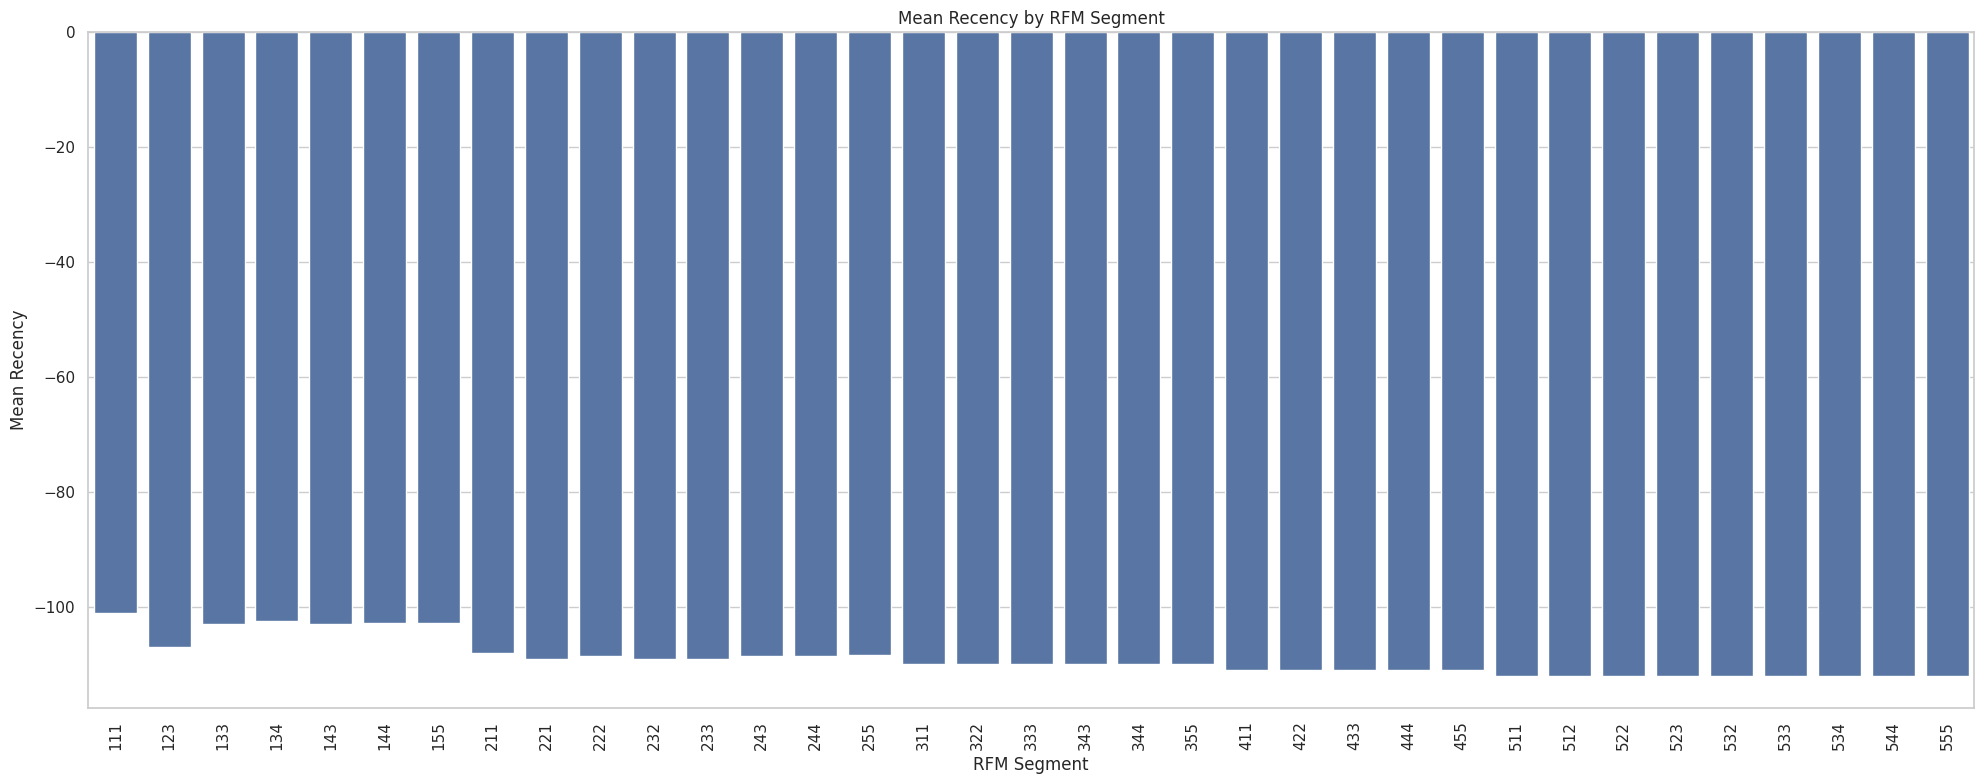

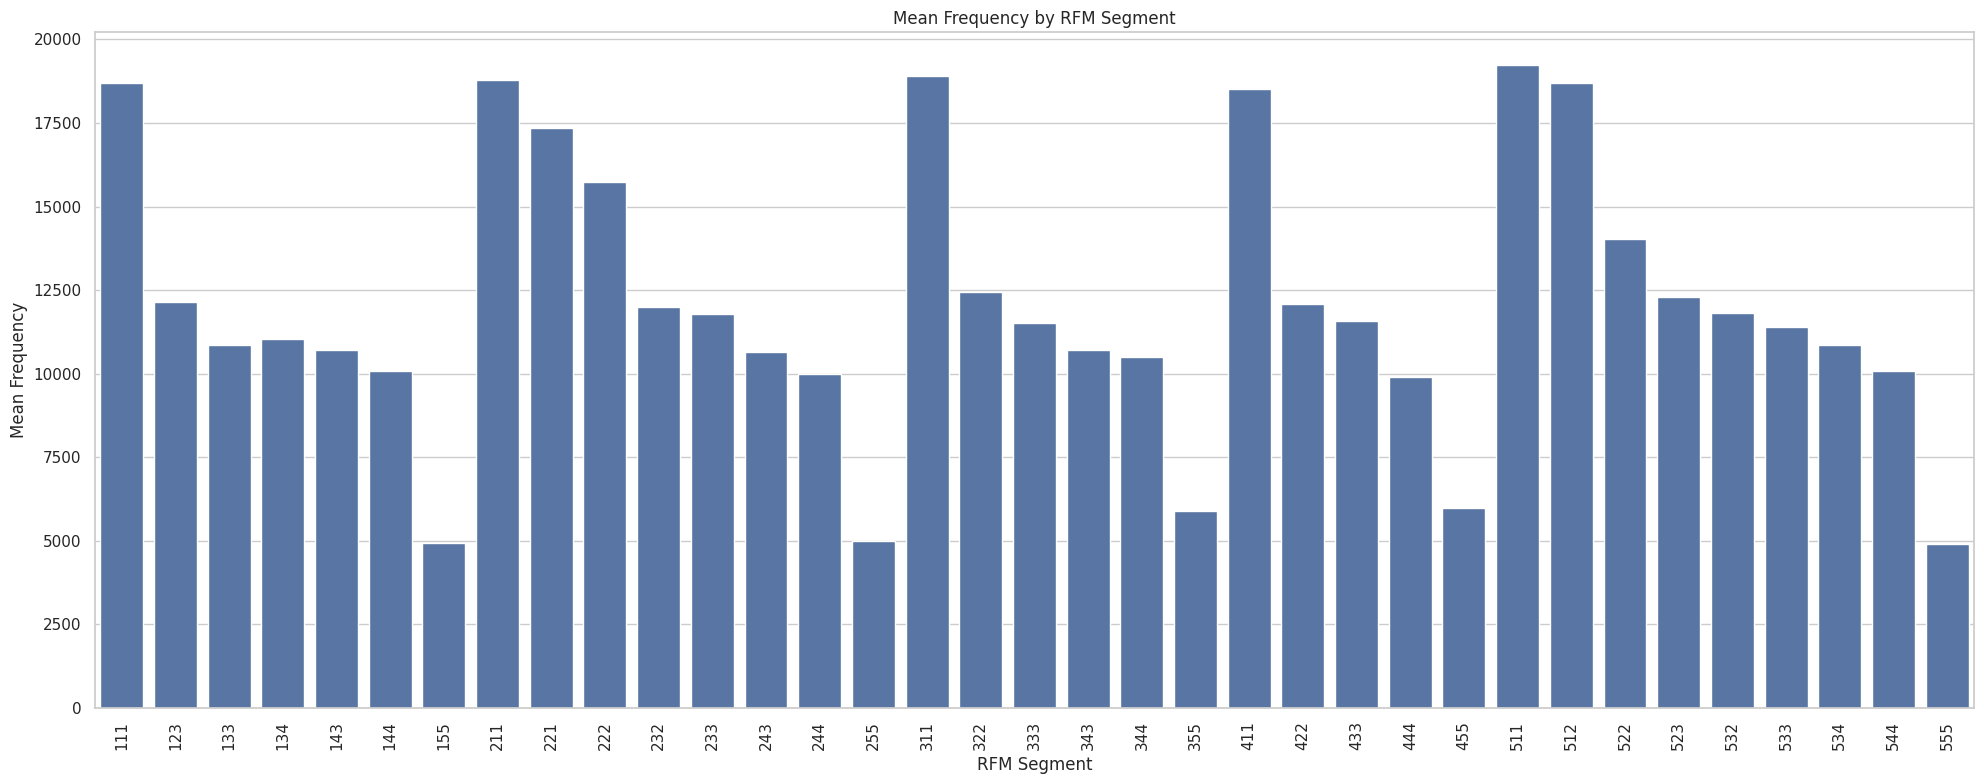

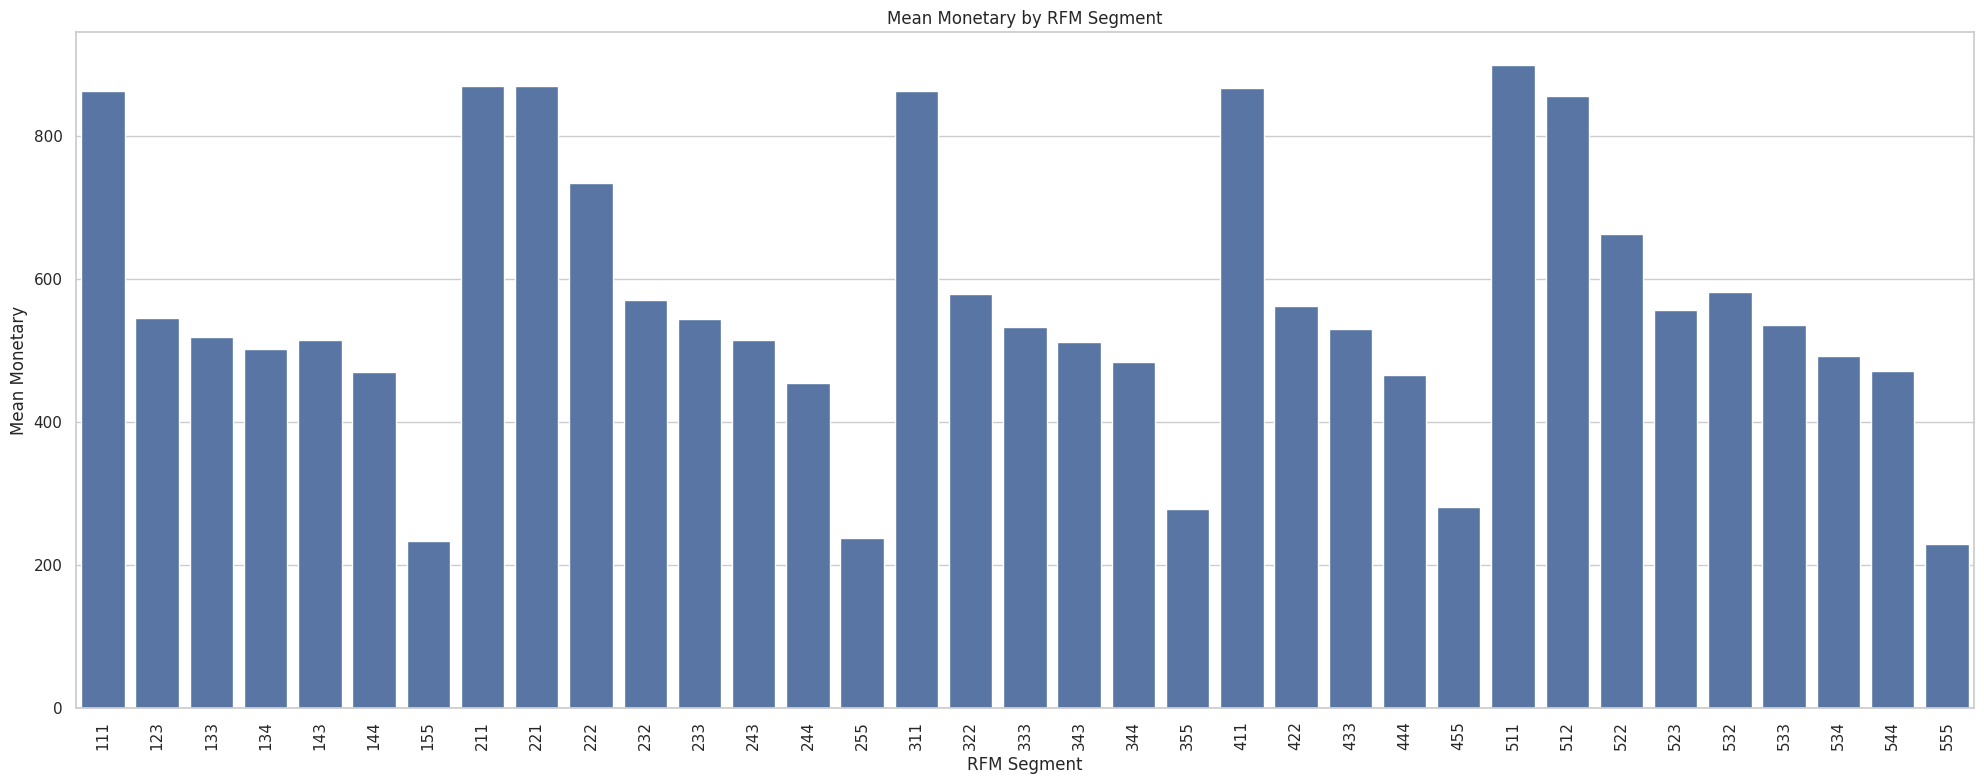

In [59]:
plt.figure(figsize=(20, 8))  # Adjust figure size as needed

# Plot for Recency Mean
sns.barplot(x='RFM_Segment', y=('Recency', 'mean'), data=rfm_segment_profiles)
plt.title('Mean Recency by RFM Segment')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel('RFM Segment')
plt.ylabel('Mean Recency')
plt.tight_layout()  # Adjust layout
plt.show()

# Plot for Frequency Mean
plt.figure(figsize=(20, 8))  # Adjust figure size as needed
sns.barplot(x='RFM_Segment', y=('Frequency', 'mean'), data=rfm_segment_profiles)
plt.title('Mean Frequency by RFM Segment')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel('RFM Segment')
plt.ylabel('Mean Frequency')
plt.tight_layout()  # Adjust layout
plt.show()

# Plot for Monetary Mean
plt.figure(figsize=(20, 8))  # Adjust figure size as needed
sns.barplot(x='RFM_Segment', y=('Monetary', 'mean'), data=rfm_segment_profiles)
plt.title('Mean Monetary by RFM Segment')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel('RFM Segment')
plt.ylabel('Mean Monetary')
plt.tight_layout()  # Adjust layout
plt.show()


The visualizations of the RFM segments reveal distinct patterns:

- **Recency**: Segments 111 and 123 show the highest mean recency, indicating these customers have not made purchases recently. In contrast, segments 511-555 show the lowest mean recency, which suggests these customers have interacted with the company very recently.

- **Frequency**: There is a high variation in purchase frequency across segments. Notably, segment 111 has the highest mean frequency of purchases, while segment 555 has the lowest. This could imply that segment 111 customers, despite being recent, are frequent buyers.

- **Monetary**: Segment 511 shows the highest mean monetary value, indicating these customers contribute significantly to revenue. On the other end, segment 555 contributes the least, which might indicate occasional, low-value purchases or a smaller customer base in this segment.

## Churn Risk:

According to traditional RFM interpretation, segments like '511', '411', '311', '211', '111' would be considered at risk. However, the high frequency and monetary values in '111' suggest that these customers may not actually be at risk. This raises questions about whether the RFM scoring is being applied correctly or if the business context requires a different interpretation of these scores.

The insights from these profiles can help tailor specific marketing strategies for each RFM segment to enhance customer engagement and value.



### 4.5.: Targeted RFM Score Distribution Analysis

This histogram or KDE plot shows the frequency distribution of the overall RFM scores. It gives an idea of how the scores are spread out and where most clients fall in terms of their RFM score.

<ipython-input-60-da86b230fdf7>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



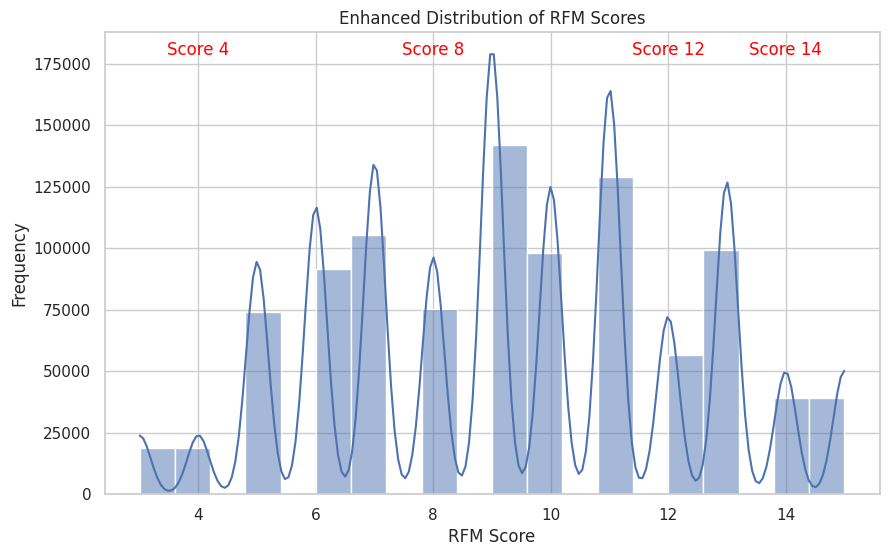

In [60]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the histogram with a gradient color palette
# You can use a seaborn palette or define your own
palette = sns.color_palette("viridis", as_cmap=True)
sns.histplot(merged_df['RFM_Score'], bins=20, kde=True, palette=palette)

# Annotate peaks
peaks = [4, 8, 12, 14]
for peak in peaks:
    plt.text(peak, plt.ylim()[1] * 0.95, f'Score {peak}', horizontalalignment='center', color='red')

# Set titles and labels
plt.title('Enhanced Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Frequency')

# Show the plot with improvements
plt.show()

## RFM Score Distribution Analysis

- **Score Distribution**: The histogram with the Kernel Density Estimate (KDE) overlay indicates that the RFM scores are multimodal, with peaks at certain intervals. This suggests the presence of distinct groups within the customer base with different levels of engagement.

- **Prominent Groups**: There are significant peaks at scores around 4, 8, 12, and 14. These peaks might correspond to different segments of customers, such as new, developing, mature, and top customers.

- **Actionable Segments**: The highest peaks appear at the scores of 8 and 12, which could represent the most common segments of customers that could be targeted for marketing campaigns.

- **Low Engagement**: Lower scores, particularly around 4, have fewer customers, indicating a segment that is less engaged and could be targeted for reactivation strategies.

- **High-Value Customers**: The peak at 14 suggests a substantial segment of highly engaged and valuable customers, likely warranting a retention and loyalty focus.



### 4.6 : Geographic Analysis
For the Geographic Analysis, we combine RFM scores with country data to understand where the most valuable customers are located.

<bound method NDFrame.head of    country RFM_Segment  client_id
0     DACH         123      12144
1     DACH         133      10848
2     DACH         222      24840
3     DACH         233      11784
4     DACH         244      10728
5     DACH         322      12600
6     DACH         333      11520
7     DACH         422      12096
8     DACH         433      12000
9     DACH         522      24384
10    DACH         533      23280
11      ES         111      18685
12      ES         211      18796
13      ES         221      17353
14      ES         222      36001
15      ES         311      56684
16      ES         411      18500
17      ES         511      57720
18      ES         512      18685
19      ES         522      17871
20      FR         155      29740
21      FR         255       5030
22      FR         355      15070
23      FR         455      14610
24      FR         555      19510
25      IT         144      20080
26      IT         244      29180
27      IT        

<Figure size 1500x800 with 0 Axes>

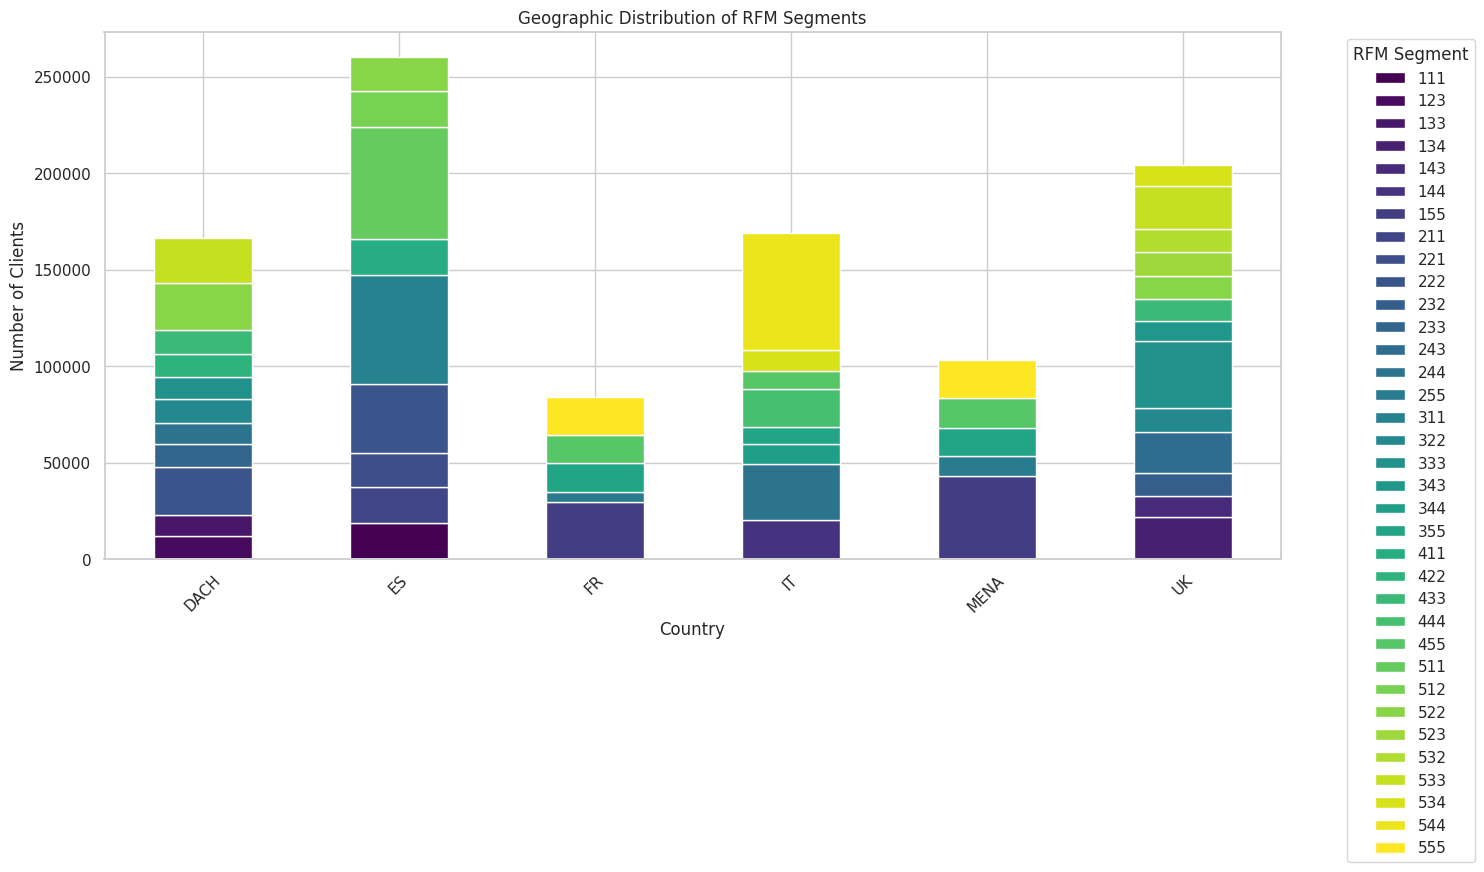

In [61]:
# Group by country and RFM score to see the distribution of high-value customers
geo_rfm_analysis = merged_df.groupby(['country', 'RFM_Segment'])['client_id'].count().reset_index()

# Display the geographic RFM analysis
print(geo_rfm_analysis.head)

# Group by country and RFM segment to calculate the count of clients in each group
geo_rfm_analysis = merged_df.groupby(['country', 'RFM_Segment'])['client_id'].count().reset_index()

# Pivot the data to get countries as indices and RFM segments as columns
pivot_df = geo_rfm_analysis.pivot(index='country', columns='RFM_Segment', values='client_id').fillna(0)

# Create a bar chart with stacked bars, one for each RFM segment
plt.figure(figsize=(15, 8))

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))

plt.title('Geographic Distribution of RFM Segments')
plt.xlabel('Country')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tighten the layout for the plot and legend
plt.tight_layout()

# Save the plot to a file (optional)
plt.savefig('rfm_distribution_by_country.png')

# Display the plot
plt.show()

 ## Geographic Analysis of RFM Segments

- **Diverse Customer Distribution**: The bar plot reveals how different RFM segments are spread across various countries. This distribution is key to understanding regional customer behavior and value.

- **Segment Concentration**: Certain countries like ES and UK show a higher concentration of specific RFM segments, indicating a strong presence of particular customer behaviors in these regions.

- **High-Value Segments**: Countries with a significant number of high RFM scores (e.g., '555', '544') indicate regions with highly engaged and valuable customers. These markets are prime targets for retention and loyalty initiatives.

- **Opportunities for Growth**: Regions with lower RFM scores might represent untapped markets or areas where customer engagement could be improved. Tailored marketing strategies can be deployed to enhance customer value in these areas.

- **Localized Strategies**: Understanding the RFM segment distribution by country assists in developing localized marketing strategies that resonate with the customer base in each region.

- **Data-Driven Expansion**: The data can guide expansion strategies, highlighting regions with potential for growth or markets where a stronger presence could be beneficial.

Overall, this geographic analysis provides actionable insights for targeted marketing, strategic planning, and resource allocation based on customer value and engagement across different regions.



## 4.7  : Customer Lifecycle Segmentation
For segmenting customers into lifecycle stages, we define thresholds for each RFM score to classify customers into new, active, at-risk, or churned categories.  

In [62]:
def segment_customers(row):
    # High-Value or Active Customers
    if row['R'] == 5 and row['F'] >= 4 and row['M'] >= 4:
        return 'Active/High-Value'

    # At-Risk or Churned Customers
    elif row['R'] <= 2:
        return 'Churned/At Risk'

    # New Customers
    elif row['R'] == 5 and (row['F'] <= 3 or row['M'] <= 3):
        return 'New'

    # Developing Customers
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] < 4:
        return 'Developing'

    # Other Segments
    else:
        return 'Other'

# Apply the function to each row in the DataFrame
merged_df['Lifecycle_Segment'] = merged_df.apply(segment_customers, axis=1)

# Display the first few rows to verify the new column
print(merged_df[['client_id', 'Lifecycle_Segment']].head())
print(merged_df[['client_id', 'Lifecycle_Segment']].describe())


   client_id Lifecycle_Segment
0  Client_13        Developing
1  Client_13        Developing
2  Client_13        Developing
3  Client_13        Developing
4  Client_13        Developing
          client_id Lifecycle_Segment
count        986741            986741
unique          101                 5
top     Client_1012   Churned/At Risk
freq          19573            364551


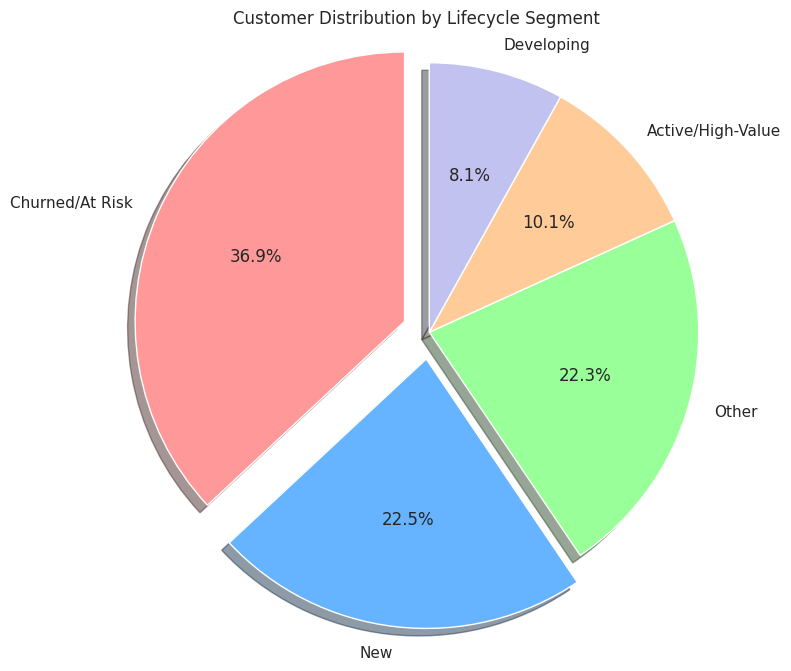

In [63]:
# Calculate the counts of each lifecycle segment
lifecycle_counts = merged_df['Lifecycle_Segment'].value_counts()

# Define the colors and explode parameters for the segments
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0']
explode = (0.1, 0.1, 0, 0, 0)
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(lifecycle_counts, labels=lifecycle_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Customer Distribution by Lifecycle Segment')

# Show plot
plt.show()


## RFM-Based Lifecycle Segmentation Analysis

The pie chart illustrates the distribution of customers across different lifecycle segments based on RFM scoring. A significant portion of the customer base, 36.9%, is classified under 'Churned/At Risk', indicating a potentially disengaged segment that may require re-engagement strategies. The 'Active/High-Value' segment represents 10.1% of the customer base, highlighting a group that likely contributes a substantial portion of revenue and should be the focus for retention and loyalty programs. 'New' customers make up 22.5%, indicating recent growth in customer acquisition, while the 'Developing' segment at 8.1% suggests there is a notable number of customers with potential to transition to higher value tiers. Lastly, 22.3% of customers fall into the 'Other' category, which may require further analysis to determine specific characteristics and appropriate marketing actions.


## 4.8 : Churn Risk Definition Based on RFM Segmentation

In our analysis, we've defined "at risk" customers using a specific approach tailored to our business context and data insights. Here's a brief on our methodology:

### Criteria for 'At Risk' Segmentation:
- **Recency (R)**: Customers who haven't made a purchase recently are considered at risk. A higher recency score means more time has passed since their last transaction.
- **Frequency (F)**: Infrequent purchasers are more likely to churn. A lower frequency score indicates fewer transactions over a given period.
- **Monetary (M)**: Customers with lower monetary value are seen as less engaged, thus at a higher risk of churning.


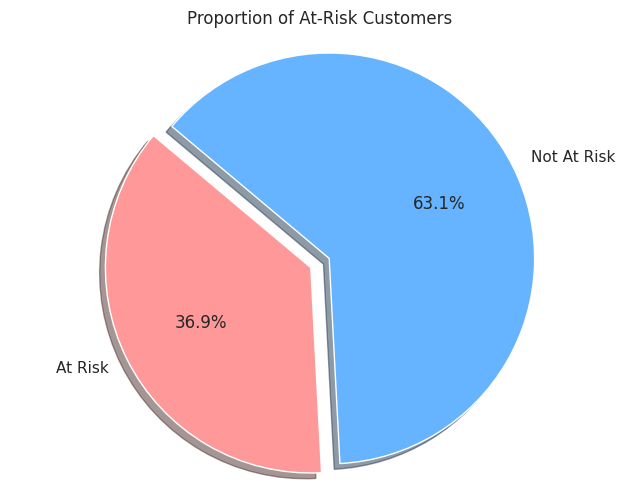

In [64]:
# Define the function to segment customers
def segment_customers(row):
    if row['R'] == 5 and row['F'] >= 4 and row['M'] >= 4:
        return 'Active/High-Value'
    elif row['R'] <= 2:
        return 'Churned/At Risk'
    elif row['R'] == 5 and (row['F'] <= 3 or row['M'] <= 3):
        return 'New'
    elif row['R'] >= 3 and row['F'] >= 3 and row['M'] < 4:
        return 'Developing'
    else:
        return 'Other'

# Apply the function to each row in the DataFrame
merged_df['Lifecycle_Segment'] = merged_df.apply(segment_customers, axis=1)

# Calculate the number of 'at-risk' customers based on the 'Lifecycle_Segment'
at_risk_count = merged_df[merged_df['Lifecycle_Segment'] == 'Churned/At Risk'].shape[0]
not_at_risk_count = merged_df[merged_df['Lifecycle_Segment'] != 'Churned/At Risk'].shape[0]

# Prepare data for the pie chart
labels = ['At Risk', 'Not At Risk']
sizes = [at_risk_count, not_at_risk_count]
colors = ['#ff9999','#66b3ff']  # Change colors for better readability
explode = (0.1, 0)  # Detach the 'at-risk' segment

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.title('Proportion of At-Risk Customers')
plt.show()


# Chapter 5: Enhanced Analysis through Feature Engineering and Visual Insights

# Introduction
In Chapter 5, we embark on an insightful journey through Feature Engineering and Advanced Visualization to unearth deeper business insights. This chapter emphasizes the transformation of raw data into informative visual narratives and strategic indicators. We dissect complex relationships between variables by engineering interactive features and dissecting ratios, and we scrutinize aggregated metrics to capture the essence of client engagement and financial performance. Our ultimate goal is to leverage these synthesized insights for informed decision-making.

## 5.1 Feature Engineering: A Catalyst for Deeper Insights
Feature Engineering is the backbone of our analysis, serving as a catalyst for unveiling complex interactions and the true potential of our data. By creating interaction terms and ratios, we lay the groundwork for an enriched dataset that is ripe for strategic exploration.

In [ ]:
print(merged_df.info)
print(merged_df.describe)
print(merged_df.columns)

<bound method DataFrame.info of           client_id      sales_team                 industry region  \
0         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
1         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
2         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
3         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
4         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
...             ...             ...                      ...    ...   
986736  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986737  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986738  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986739  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986740  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   

        annual_revenue      dates  impressions  clicks  conversions   revenue  \
0           1260023120  11/3/2020 

### 5.1.1 Interaction Terms and Their Significance
Delving into the multiplicative effects of product interactions, we reveal the potency of combined variables in influencing business outcomes.

In [ ]:
#  Interaction Terms
merged_df['Clicks_Conversions'] = merged_df['clicks'] * merged_df['conversions']
merged_df['Revenue_Impressions'] = merged_df['annual_revenue'] * merged_df['impressions']


### 5.1.2 Ratios: Contextualizing Business Operations
Through calculated ratios, we contextualize the efficiency and effectiveness of our business operations, providing a relative scale for raw numbers.

#### 5.1.2.1 General Ratio Calculations Over the Entire Dataset
- Calculate ratios like conversion rate (conversions per click) and revenue per impression for the entire dataset.


In [ ]:
# Existing General Ratios
merged_df['Conversion_Rate'] = merged_df['conversions'] / merged_df['clicks'].replace({0: 0.01})
merged_df['Revenue_per_Impression'] = merged_df['revenue'] / merged_df['impressions'].replace({0: 0.01})
merged_df['Click_Through_Rate'] = merged_df['clicks'] / merged_df['impressions'].replace({0: 0.01})

# Additional Ratios involving Impressions
merged_df['Impressions_per_Conversion'] = merged_df['impressions'] / merged_df['conversions'].replace({0: 0.01})
merged_df['Impressions_per_Click'] = merged_df['impressions'] / merged_df['clicks'].replace({0: 0.01})

# Print the calculated ratios
print("General Ratios:")
print("Conversion Rate:\n", merged_df['Conversion_Rate'].head())
print("\nRevenue per Impression:\n", merged_df['Revenue_per_Impression'].head())
print("\nClick Through Rate:\n", merged_df['Click_Through_Rate'].head())
print("\nImpressions per Conversion:\n", merged_df['Impressions_per_Conversion'].head())
print("\nImpressions per Click:\n", merged_df['Impressions_per_Click'].head())


General Ratios:
Conversion Rate:
 0    0.030418
1    0.030418
2    0.030418
3    0.030418
4    0.030418
Name: Conversion_Rate, dtype: float64

Revenue per Impression:
 0    0.000004
1    0.000004
2    0.000004
3    0.000004
4    0.000004
Name: Revenue_per_Impression, dtype: float64

Click Through Rate:
 0    0.083136
1    0.083136
2    0.083136
3    0.083136
4    0.083136
Name: Click_Through_Rate, dtype: float64

Impressions per Conversion:
 0    395.4375
1    395.4375
2    395.4375
3    395.4375
4    395.4375
Name: Impressions_per_Conversion, dtype: float64

Impressions per Click:
 0    12.028517
1    12.028517
2    12.028517
3    12.028517
4    12.028517
Name: Impressions_per_Click, dtype: float64


### Insights from General Ratio Calculations

#### Key Ratios and Their Implications
- **Conversion Rate:** A crucial metric indicating the effectiveness of converting clicks into actual sales or desired actions.
- **Revenue per Impression:** Provides insight into how well exposure (impressions) is capitalized into revenue.
- **Click-Through Rate:** A measure of the success rate of impressions leading to clicks, indicating content relevance and engagement.
- **Efficiency of Impressions:** Both Impressions per Conversion and Impressions per Click offer valuable insights into how efficiently impressions contribute to the marketing goals.

#### Analytical Observations
- Enhancing the Conversion Rate should be a key focus, as it directly translates clicks into value.
- Improving Revenue per Impression can indicate better monetization of visibility.
- A high CTR is indicative of effective marketing materials that engage and attract potential customers.
- Optimizing Impressions per Conversion and per Click can lead to more efficient marketing spend and strategy.

These insights are integral to refining marketing strategies, aligning them more closely with business outcomes and revenue goals.


#### 5.1.2.2 Calculate Ratios by Client per Country
- Insights from Client and Country Specific Ratio Analysis



In [ ]:
client_country_metrics = merged_df.groupby(['client_id', 'country']).agg({
    'revenue': 'mean',
    'clicks': 'mean',
    'conversions': 'mean',
    'impressions': 'mean'  # Include average impressions
}).reset_index()

# Calculate Click-to-Conversion Ratio
client_country_metrics['Click_to_Conversion_Ratio'] = client_country_metrics['conversions'] / client_country_metrics['clicks'].replace({0: 0.01})

# Calculate Click-Through Rate (CTR)
client_country_metrics['Click_Through_Rate'] = client_country_metrics['clicks'] / client_country_metrics['impressions'].replace({0: 0.01})

# Print the calculated metrics
print(client_country_metrics)


       client_id country   revenue      clicks  conversions  impressions  \
0    Client_1011    DACH  0.046510  569.767857    55.470238  5702.202381   
1    Client_1012      ES  0.047038  559.510397    55.701323  5495.531191   
2     Client_107      FR  0.050030  539.190000    55.816000  5550.564000   
3     Client_108      IT  0.046187  543.473161    53.065606  5327.858847   
4    Client_1113      FR  0.047735  532.112000    57.082000  5570.608000   
..           ...     ...       ...         ...          ...          ...   
96   Client_7287    DACH  0.046972  557.690871    55.410788  5232.176349   
97   Client_7288      ES  0.046897  552.692000    54.040000  5401.192000   
98   Client_8289      FR  0.044507  551.212185    53.743697  5660.489496   
99   Client_8290      IT  0.046993  533.135440    53.740406  5467.363431   
100  Client_9298    MENA  0.047275  564.216867    54.124498  5550.574297   

     Click_to_Conversion_Ratio  Click_Through_Rate  
0                     0.097356    

### Insights from Client and Country Specific Ratio Analysis

#### Key Metrics and Regional Variations
- **Click-to-Conversion Ratio:** Highlights how efficiently clicks are converted into actions. Variances across clients and countries can indicate differing market dynamics or the effectiveness of strategies.
- **Click-Through Rate (CTR):** A measure of how compelling the content is to the audience, reflected in the rate of impressions converting to clicks.

#### Analytical Observations
- Distinct patterns emerge when comparing clients across different countries, pointing to the need for regionally adapted approaches.
- Some clients demonstrate high efficiency in converting clicks to actions, while others excel in attracting clicks from impressions.

#### Recommendations for Optimization
- Tailor marketing strategies to fit the unique landscape of each country and the specific tendencies of clients within these regions.
- Analyze underperforming areas to identify opportunities for improvement, whether in content engagement or conversion strategies.

These findings are integral for developing nuanced and effective marketing strategies that resonate with diverse audiences across regions.


#### 5.1.2.3 Ratio by Industry
- Insights from Industry-Specific Ratio Analysis


In [ ]:
industry_averages = merged_df.groupby('industry').agg({
    'annual_revenue': 'mean',
    'conversions': 'mean',
    'clicks': 'mean',
    'impressions': 'mean'
}).reset_index()
print(industry_averages)


### Insights from Industry-Specific Ratio Analysis

#### Comparative Overview of Key Industries
- **Financial Services:** Leads in revenue and demonstrates strong engagement metrics.
- **Manufacturing, Automotive & Energy:** Exhibits a balanced performance with high engagement despite slightly lower revenue.
- **Retail & Consumer Goods:** Strong in revenue but indicates potential areas for improvement in engagement metrics.

#### Strategic Implications
- Industries showing lower engagement metrics despite high revenue should focus on optimizing conversion and click-through strategies.
- A holistic approach that balances revenue generation with customer engagement can lead to more sustainable industry growth.

These insights are crucial for businesses to align their strategies with industry benchmarks and identify areas needing strategic adjustments.


#### 5.1.2.4 Calculate Ratios by Sales Team
- Include metrics like revenue, impressions, and clicks.


In [ ]:
# Aggregating data by sales team
sales_team_metrics = merged_df.groupby('sales_team').agg({
    'revenue': 'mean',
    'impressions': 'mean',
    'clicks': 'mean',
    'conversions': 'mean',
}).reset_index()

# Calculate Click Through Rate
sales_team_metrics['Click_Through_Rate'] = sales_team_metrics['clicks'] / sales_team_metrics['impressions'].replace({0: 0.01})

# Filter out non-numeric columns for correlation calculation
numeric_cols = sales_team_metrics.select_dtypes(include=[np.number]).columns
numeric_sales_team_metrics = sales_team_metrics[numeric_cols]

# Calculate correlation matrix
correlation_matrix = numeric_sales_team_metrics.corr()

# Print the correlation matrix
print("\nCorrelation Matrix for Sales Team Metrics:\n", correlation_matrix)



### 5.1.3 Aggregated Features: A High-Level Overview
- Compiling high-level client data, we evaluate engagement and financial metrics to understand the broader landscape of client interaction.


In [ ]:
# Calculate Total Revenue per Client
merged_df['Total_Revenue_per_Client'] = merged_df.groupby('client_id')['revenue'].transform('sum')

# Calculate Average Impressions per Client
merged_df['Average_Impressions_per_Client'] = merged_df.groupby('client_id')['impressions'].transform('mean')

# Print the new aggregated features for the first few clients
print("Aggregated Features:")
print("Total Revenue per Client:\n", merged_df[['client_id', 'Total_Revenue_per_Client']].head())
print("\nAverage Impressions per Client:\n", merged_df[['client_id', 'Average_Impressions_per_Client']].head())


###  4.2.3.6 : Aggregated features by client and sales team,
focusing on revenue and conversion metrics

In [ ]:
# Aggregating data by client and sales team
client_sales_team_metrics = merged_df.groupby(['client_id', 'sales_team']).agg({
    'revenue': 'sum',  # Total revenue per client per sales team
    'conversions': 'sum',  # Total conversions per client per sales team
}).reset_index()

# Print the aggregated metrics
print("Aggregated Metrics by Client and Sales Team:\n", client_sales_team_metrics.head())

# Calculate correlation
correlation = client_sales_team_metrics[['revenue', 'conversions']].corr()
print("\nCorrelation between Revenue and Conversions:\n", correlation)


## 4.2.3.7 : Sales Team Metrics Correlation Analysis Summary

### Overview
This summary highlights the key insights from the correlation analysis of various metrics related to sales teams, encompassing revenue, impressions, clicks, conversions, and click-through rate.

### Key Observations
1. **Moderate Positive Correlation Between Revenue and Impressions (0.34):**
   - Suggests that higher impressions might lead to increased revenue, but not in a strongly linear manner.
   - Indicates the potential benefit of increasing impressions, but with a focus on targeting and quality.

2. **Significant Negative Correlation Between Impressions and Click-Through Rate (-0.89):**
   - As impressions increase, click-through effectiveness decreases, implying a saturation point.
   - This saturation may mean that beyond a certain point, additional impressions don't effectively convert to clicks.

3. **Strong Positive Correlation Between Clicks and Click-Through Rate (0.93):**
   - More clicks typically improve the click-through rate, as indicated by this strong correlation.
   - Strategies to convert impressions into clicks become crucial here.

4. **Mild Positive Correlation Between Conversions and Revenue (0.18) and Clicks (0.20):**
   - While conversions do contribute to revenue and are associated with clicks, the correlation isn't very strong.
   - This suggests other factors might also play a significant role in impacting revenue.

### Recommendations
- **Focus on Quality of Impressions:** Targeting and quality of impressions should be optimized, rather than solely increasing their volume.
- **Enhance Click-Through Rates:** Invest in strategies that effectively turn impressions into clicks, such as ad copy optimization, precise targeting, and improved user experience.
- **Value of Conversions:** Focus on the value of conversions, not just the quantity. Strategies to increase the average order value or customer lifetime value could be more beneficial.
- **Integrated Marketing Approach:** A balanced approach focusing on both the volume (impressions and clicks) and the quality (click-through rate, conversion value) of interactions is essential for effective revenue generation.

### Conclusion
To drive revenue and improve performance efficiently, sales teams should employ strategies that enhance both the quantity and quality of customer interactions. A focused approach on not just increasing raw numbers but also on the effectiveness of these interactions is key to successful sales performance.


### 4.2.3.8.Sales and Marketing Metrics Correlation Analysis

In [ ]:
# Filter out non-numeric columns for correlation calculation
numeric_cols = client_sales_team_metrics.select_dtypes(include=[np.number]).columns
numeric_client_sales_team_metrics = client_sales_team_metrics[numeric_cols]

# Print the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)
#adding more features for linear relationship analysis

# Calculate Average Order Value (AOV)
client_sales_team_metrics['AOV'] = client_sales_team_metrics['revenue'] / client_sales_team_metrics['conversions'].replace({0: 0.01})

# Calculate Marketing Spend Ratio
client_sales_team_metrics['Marketing_Spend_Ratio'] = merged_df.groupby(['client_id', 'sales_team'])['marketing_spend_perc'].transform('mean') / client_sales_team_metrics['revenue']

# Calculate Impressions to Revenue Ratio
client_sales_team_metrics['Impressions_Revenue_Ratio'] = merged_df.groupby(['client_id', 'sales_team'])['impressions'].transform('sum') / client_sales_team_metrics['revenue']

# Calculate Click-to-Revenue Ratio
client_sales_team_metrics['Click_to_Revenue_Ratio'] = merged_df.groupby(['client_id', 'sales_team'])['clicks'].transform('sum') / client_sales_team_metrics['revenue']

# Print the updated dataframe
print(client_sales_team_metrics.head())

# Explore correlations
# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_client_sales_team_metrics.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)



In [ ]:
print(merged_df.info)
print(merged_df.describe)



#### Observations and Findings
- **Strong Positive Correlation Between Revenue and Conversions:** Indicates that increasing conversions is likely to increase revenue.
- **Negative Correlation with Marketing Spend Ratio:** Suggests the need for a more efficient allocation of the marketing budget.
- **AOV's Negative Correlation with Revenue and Conversions:** Highlights the importance of balancing the number of transactions with the value per transaction.
- **Low Correlation of Impressions and Clicks with Revenue:** Implies that increasing these metrics alone may not significantly impact revenue.

#### Analyst's Interpretation
these findings indicate that while conversions are a critical driver for revenue, the efficiency of marketing spend and the value derived from each transaction (AOV) also play significant roles. The data suggests that focusing solely on increasing impressions and clicks might not be the most effective strategy for revenue growth. Instead, optimizing the marketing budget and improving the conversion rate are likely to yield better results. Additionally, strategies that increase the AOV could be beneficial for overall revenue enhancement.

## 4.2.3.9 : Add Created Features to merged_df Datafram

In [ ]:
# Add Interaction Terms
merged_df['Clicks_Conversions'] = merged_df['clicks'] * merged_df['conversions']
merged_df['Revenue_Impressions'] = merged_df['annual_revenue'] * merged_df['impressions']

# Add General Ratios
merged_df['Conversion_Rate'] = merged_df['conversions'] / merged_df['clicks'].replace({0: 0.01})
merged_df['Revenue_per_Impression'] = merged_df['revenue'] / merged_df['impressions'].replace({0: 0.01})
merged_df['Click_Through_Rate'] = merged_df['clicks'] / merged_df['impressions'].replace({0: 0.01})
merged_df['Impressions_per_Conversion'] = merged_df['impressions'] / merged_df['conversions'].replace({0: 0.01})
merged_df['Impressions_per_Click'] = merged_df['impressions'] / merged_df['clicks'].replace({0: 0.01})

# Add Aggregated Features
merged_df['Total_Revenue_per_Client'] = merged_df.groupby('client_id')['revenue'].transform('sum')
merged_df['Average_Impressions_per_Client'] = merged_df.groupby('client_id')['impressions'].transform('mean')

# Ensure no NaN values (you can replace NaN with 0 or an appropriate value for your analysis)
merged_df.fillna(0, inplace=True)

# Confirm the new structure of merged_df
print(merged_df.columns)


## 4.3 : Advanced Visualizations for Strategic Decision-Making
In this section, we pivot to the visualization of our engineered features, transforming complex data into compelling visual stories. Our goal is to present data in a form that highlights trends, facilitates outlier detection, and underscores key business metrics

### 4.3.1 : Histogram Analysis of Clicks and Conversions Interaction

In [ ]:
# 1. Distribution of Clicks and Conversions Interaction
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Clicks_Conversions'], bins=30, kde=True)
plt.title('Distribution of Clicks and Conversions Interaction')
plt.xlabel('Clicks_Conversions')
plt.ylabel('Frequency')
plt.show()




The histogram above displays the distribution of the `Clicks_Conversions` feature, which represents the interaction between the number of clicks and the resulting conversions.

### Observations:

- **Right-Skewed Distribution**: The data shows a pronounced right skew, indicating that while clicks are frequent, they do not uniformly result in conversions.
- **Low-Value Interactions are Common**: The peak of the distribution is close to the origin, revealing that most interactions result in a low number of conversions.
- **Presence of Outliers**: The long tail to the right suggests the presence of outliers with unusually high clicks to conversion ratios.

### Insights:

- **Conversion Efficiency**: The general trend points to a low conversion rate from clicks, with a majority of clicks leading to few or no conversions.
- **High-Value Interactions**: The outliers may represent areas with higher conversion efficiency, warranting further investigation.

### Next Steps:

- **Outlier Analysis**: Assess whether the high-value interactions are due to exceptional marketing strategies or data anomalies.
- **Segmentation**: Explore the data in segments to understand the driving factors behind the high-performing interactions.
- **Correlation Study**: Examine the relationship between `Clicks_Conversions` and other variables such as campaign type, demographic factors, and timing.

This initial visualization is a stepping stone for deeper analysis into the factors influencing click-to-conversion efficiency.


###  4.4.1.2 Histogram Analysis of Revenue and Impressions Interaction

In [ ]:
# 2. Distribution of Revenue and Impressions Interaction
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Revenue_Impressions'], bins=30, kde=True)
plt.title('Distribution of Revenue and Impressions Interaction')
plt.xlabel('Revenue_Impressions')
plt.ylabel('Frequency')
plt.show()


The histogram illustrates the distribution of the `Revenue_Impressions` feature, which reflects the product of a company's annual revenue and the number of impressions.

### Observations:

- **Highly Skewed Distribution**: We observe an extremely right-skewed distribution, with a steep decline in frequency as the value of `Revenue_Impressions` increases.
- **Dominance of Lower Values**: The bulk of the data clusters near the origin, indicating that most companies have a relatively low interaction between revenue and impressions.
- **Sparse High-Value Interactions**: There are very few instances with high `Revenue_Impressions` values, which could represent companies with either very high annual revenue, high impressions, or both.

### Insights:

- **Visibility vs. Revenue**: The skewness suggests that higher visibility (in terms of impressions) does not always correlate with proportionally higher revenue.
- **Market Dynamics**: A possible insight could be that only a few companies manage to effectively convert their market visibility into substantial revenue.

### Next Steps:

- **Outlier Analysis**: It's critical to analyze whether the few high-value instances are due to exceptional market performance or are outliers that could skew further analysis.
- **Revenue and Impressions Correlation**: Additional investigation is needed to understand the relationship between impressions and revenue generation for different market segments.
- **Strategic Implications**: For companies at the lower end of the spectrum, there may be a need to enhance strategies for converting impressions into revenue.

This visualization serves as an important analytical tool to guide strategic decisions in marketing and sales to improve revenue generation from market visibility.


###  4.4.1.3 Histogram Analysis of Conversion Rate

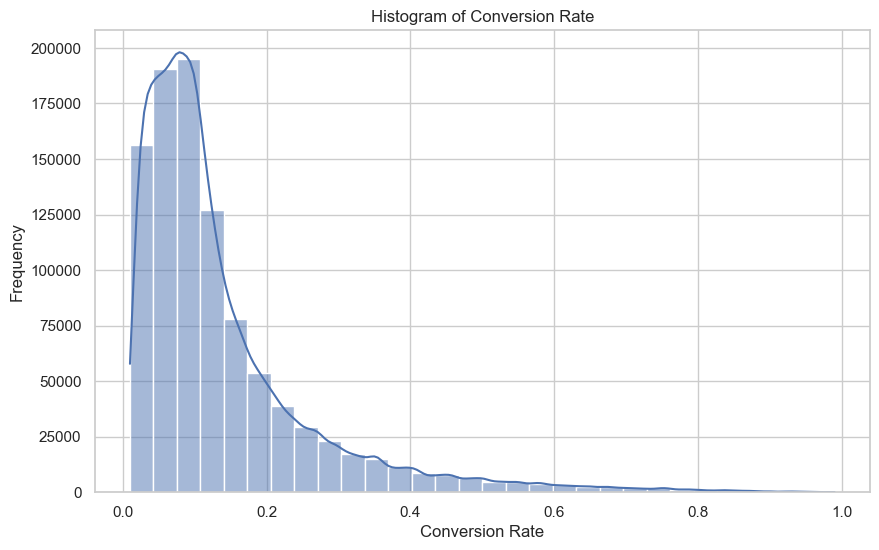

In [ ]:
# 3. Histogram of Conversion Rate
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Conversion_Rate'], bins=30, kde=True)
plt.title('Histogram of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

This histogram presents the distribution of the conversion rate across different interactions in the dataset.

### Observations:

- **Normal-like Distribution**: The histogram shows a distribution that resembles a normal distribution but with a right skew. This suggests that while there is a common conversion rate, there are also a significant number of interactions with a lower than average rate.
- **Peak Conversion Rate**: The peak of the distribution is just above 0.0, indicating that the most frequent conversion rate is low but not zero.
- **Tail of Higher Rates**: The tail extending towards 1.0 suggests that there are fewer interactions with very high conversion rates.

### Insights:

- **Average Conversion Efficiency**: The conversion rate for most interactions is on the lower side, indicating that high conversion rates are less common.
- **Potential for Optimization**: The spread of the distribution towards the lower end of the conversion rate suggests there may be room for improvement in conversion strategies.

### Next Steps:

- **Identify High-Performing Segments**: Analyze which factors contribute to the higher conversion rates seen in the tail of the distribution.
- **Strategies for Improvement**: For interactions with lower conversion rates, consider targeted strategies to improve engagement and conversion efficiency.
- **Benchmarking**: Use the common conversion rates as benchmarks for new strategies aiming to improve conversions across the board.

This visualization will guide further strategic discussions on optimizing conversion rates to enhance overall business performance.


###    4.4.1.4 Histogram Analysis of Revenue per Impression

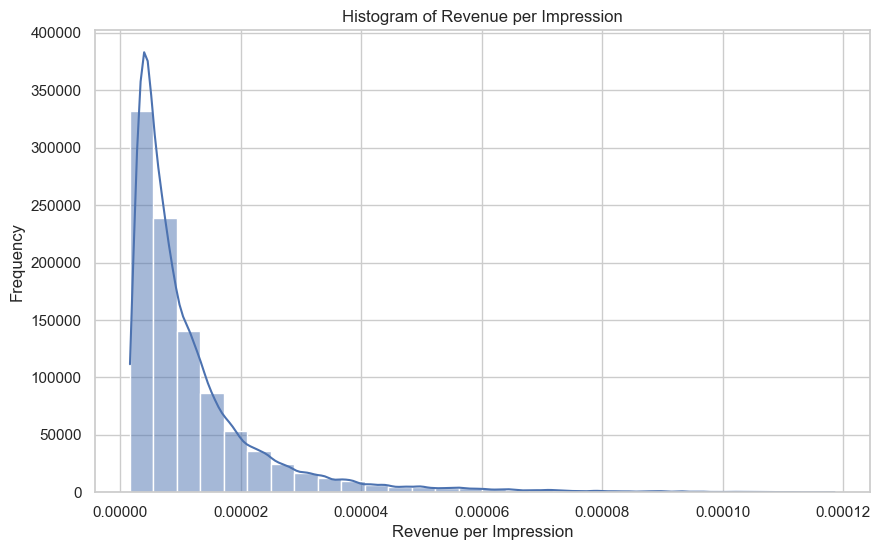

In [ ]:
# 4. Histogram of Revenue per Impression
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Revenue_per_Impression'], bins=30, kde=True)
plt.title('Histogram of Revenue per Impression')
plt.xlabel('Revenue per Impression')
plt.ylabel('Frequency')
plt.show()

The histogram depicts the distribution of the `Revenue per Impression` metric across various data points in our dataset.

### Observations:

- **Skewed Distribution**: The distribution is highly right-skewed, with a sharp peak close to the origin and a long tail extending towards higher values.
- **Predominantly Low Revenue**: The majority of the data points have a very low `Revenue per Impression`, indicating that most impressions generate minimal revenue.
- **Sparse High-Value Instances**: There are very few instances where the `Revenue per Impression` is high, which may represent highly effective campaigns or premium ad placements.

### Insights:

- **Revenue Generation Efficiency**: The skewness indicates that while impressions are often generated, they typically do not translate into significant revenue, which suggests a potential inefficiency in how impressions are monetized.
- **Opportunity for Optimization**: Given the concentration of data points near the lower end of the spectrum, there may be substantial opportunities to optimize impression monetization strategies.

### Next Steps:

- **Analysis of High-Value Cases**: It would be insightful to study the outliers or the instances with high `Revenue per Impression` to understand the factors contributing to their success.
- **Improvement Strategies**: For those data points with low revenue generation, it would be beneficial to explore new strategies or refine existing ones to improve revenue from impressions.
- **Benchmarking and Goal Setting**: Establish benchmarks based on the more successful instances to guide the optimization of impression monetization.

This visualization underscores the need for strategic initiatives aimed at improving the revenue potential of impressions within the dataset.


### 4.4.1.5 Boxplot Analysis of Total Revenue per Client

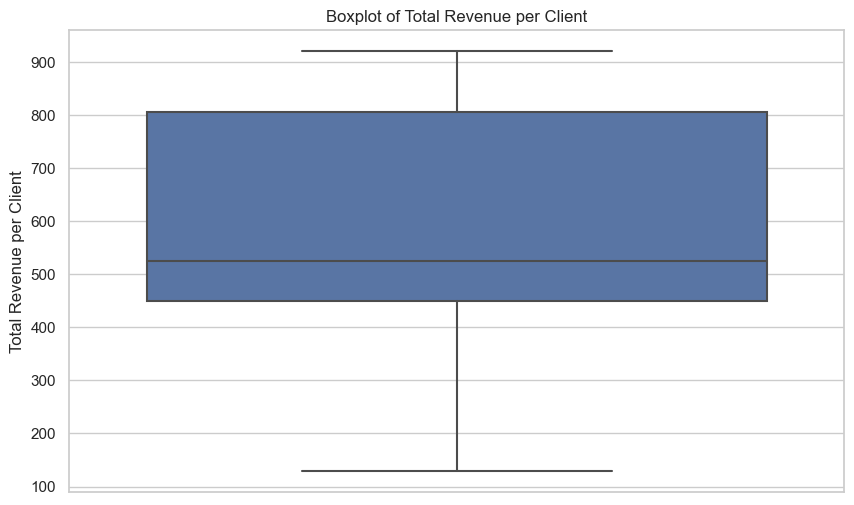

In [ ]:
# 5. Total Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Total_Revenue_per_Client'])
plt.title('Boxplot of Total Revenue per Client')
plt.ylabel('Total Revenue per Client')
plt.show()




The boxplot visualizes the spread and central tendency of `Total Revenue per Client` across our client base.

### Observations:

- **Revenue Range**: The boxplot shows a wide interquartile range (IQR), suggesting significant variation in total revenue among different clients.
- **Median Revenue**: The median, indicated by the line within the box, appears to be above the halfway mark between the first quartile (Q1) and the third quartile (Q3), hinting at a slightly right-skewed distribution.
- **Potential Outliers**: The absence of visible whiskers or outliers above the upper quartile suggests that there are no extreme values in total revenue that fall beyond the typical range within this dataset.

### Insights:

- **Client Revenue Disparity**: The variation within the IQR indicates a disparity in revenue contribution among clients, with some generating much higher revenue than others.
- **Revenue Concentration**: A median that is closer to the third quartile could imply that a smaller number of clients may be contributing a disproportionately high amount of revenue.

### Next Steps:

- **Client Segmentation**: It would be useful to segment clients based on revenue contribution to identify high-value clients and understand their characteristics.
- **Revenue Optimization**: Strategies could be developed to increase the revenue from lower and middle-range clients, potentially bringing the median closer to the center of the IQR.
- **In-Depth Analysis**: Further analysis might explore why certain clients are outperforming others and whether the services provided to higher-revenue clients could be extended to others to increase overall revenue.

This boxplot provides a clear visual summary of the total revenue distribution per client, which can inform targeted strategies for revenue growth.


### 4.4.1.6 Boxplot Analysis of Average Impressions per Client

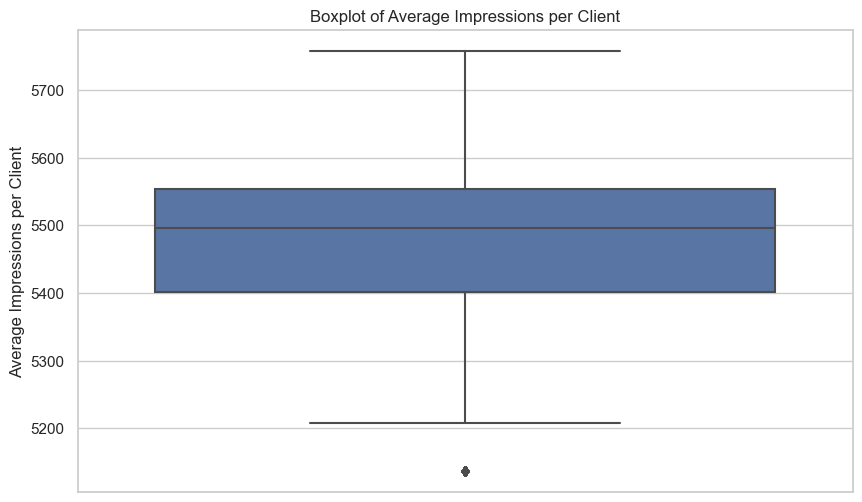

In [ ]:
# 6.Average Impressions per Client
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Average_Impressions_per_Client'])
plt.title('Boxplot of Average Impressions per Client')
plt.ylabel('Average Impressions per Client')
plt.show()




This boxplot represents the distribution of `Average Impressions per Client`, giving us insight into the visibility each client receives on average.

### Observations:

- **Consistency in Impressions**: The boxplot shows a relatively narrow interquartile range (IQR), which indicates that the average number of impressions per client is fairly consistent across the dataset.
- **Central Tendency**: The median is situated near the middle of the box, suggesting a symmetrical distribution of impressions across clients.
- **Presence of Outliers**: The presence of a single outlier below the lower whisker indicates that at least one client has a significantly lower average number of impressions than the rest.

### Insights:

- **Uniformity in Client Exposure**: The narrow IQR implies that clients are, on average, receiving a similar amount of exposure, which could be indicative of a standardized approach in distributing impressions among clients.
- **Anomaly Detection**: The outlier might represent a client with specific characteristics or circumstances leading to fewer impressions, warranting a closer look to understand the reasons behind this deviation.

### Next Steps:

- **Investigating the Outlier**: Further investigate the reason behind the lower impressions for the outlier client. It could be due to a targeted strategy or an area that requires attention to ensure uniform client treatment.
- **Review of Impression Strategy**: Assess the current strategy for impression allocation to determine if the approach is intentional and effective or if adjustments are needed to optimize client exposure.
- **Benchmarking for Performance**: Use the median as a benchmark for assessing client exposure and developing strategies to increase impressions where necessary.

This boxplot aids in understanding the typical range and distribution of impressions per client, highlighting areas for potential improvement in client engagement strategies.


 # Chapter 5: Advanced Visualization and Data Categorization






## 5.1 Advanced Visualization Techniques

### Introduction
Building on our extensive Exploratory Data Analysis (EDA), we will now apply advanced visualization techniques to our merged dataset, which encompasses a rich array of data points across 986,741 entries and 13 columns. These techniques, including treemaps and sunburst charts, will allow us to visualize complex hierarchies and relationships in the data, such as the interplay between client profiles, employee demographics, and revenue figures. This will help us to further uncover key performance drivers and demographic influences.

### Execution
We will create and interpret treemaps and sunburst charts to illustrate the hierarchical structure of sales and demographic data. Additionally, interactive visualizations will be used for dynamic exploration, enhancing our ability to draw meaningful insights.

### Insights
The goal is to provide a deeper understanding of demographic influences on sales, identify regional market potentials, and explore industry-specific trends, thereby aiding in strategic decision-making.


### 5.1.1 Treemap Visualization

#### Objective
- **Purpose:** To display the distribution of annual revenue across different industries and regions in a hierarchical, easy-to-understand format.

#### Data Focus
- **Key Variables:** We will utilize 'industry' and 'region' as the primary hierarchical categories, with 'annual_revenue' determining the size of each rectangle in the treemap.



In [ ]:
# Aggregate data for the treemap by country within the EMEA region
treemap_data = merged_df.groupby(['region', 'country', 'industry'])['annual_revenue'].sum().reset_index()

# Calculate the total revenue for percentage calculation
total_revenue = treemap_data['annual_revenue'].sum()

# Calculate the percentage of total revenue for each country within EMEA
treemap_data['percentage'] = (treemap_data['annual_revenue'] / total_revenue) * 100

# Create the treemap with labels showing the revenue and percentage by country within EMEA
fig = px.treemap(treemap_data,
                 path=['region', 'country', 'industry'],
                 values='annual_revenue',
                 color='annual_revenue',
                 color_continuous_scale='greens',
                 title='Treemap of Annual Revenue Distribution by Country within EMEA Region')

# Update text font size, make it bold, and set the color to black for better contrast
fig.update_traces(textfont={'size': 22, 'color': 'black', 'family': 'Arial, sans-serif'}, textinfo='label+value+percent parent')

# Update the layout to


# Update the layout to auto-size the chart to the container
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the figure
fig.show()


The treemap provides a clear visual representation of the distribution of annual revenue across countries within the EMEA region. A few key observations are:

- **Dominant Markets**: Certain countries, such as the UK and Spain (ES), appear to be significant contributors to the revenue within the EMEA region, dominating the visualization with larger areas. This suggests a strong market presence or higher sales performance in these countries.

- **Market Potential**: The varied sizes of the rectangles indicate the market potential within each country. Smaller rectangles, such as those representing the MENA region, may indicate untapped or developing markets that could be targeted for expansion.

- **Industry Insights**: The breakdown by industry within each country highlights the sectors that are driving revenue. For instance, 'Financial Services' in the UK and 'Retail & Consumer Goods' in Spain show considerable contributions, which can inform targeted strategies for these industries.

- **Revenue Concentration**: The concentration of revenue among a few key countries suggests a reliance on these markets for the EMEA region's performance. Diversifying the revenue streams by bolstering performance in countries with smaller contributions could mitigate risk.

- **Strategic Implications**: For strategic planning, the treemap suggests a potential focus on the high-performing countries for revenue consolidation and on the countries with smaller areas for market development and customer acquisition strategies.



### 5.1.2 Sunburst Chart of Marketing Spend by Region, Country, and Industry

#### Objective
- **Purpose:** To explore the relationship between marketing spend, regions, and industries in a multi-level, radial visualization.

#### Data Focus
- **Key Variables:** The sunburst chart will be structured with 'regions' at the innermost level, 'industries' at the next, and


In [ ]:
# Aggregate data for the Sunburst chart
sunburst_data = merged_df.groupby(['region', 'country', 'industry'])['marketing_spend_perc'].mean().reset_index()

# Create the Sunburst chart
fig = px.sunburst(sunburst_data,
                  path=['region', 'country', 'industry'],
                  values='marketing_spend_perc',
                  color='marketing_spend_perc',
                  color_continuous_scale='RdYlGn',
                  title='Sunburst Chart of Marketing Spend by Region, Country, and Industry')

# Update the layout to make the chart larger
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), width=800, height=600)

# Update the traces to add text labels onto the chart
fig.update_traces(textinfo='label+percent entry')

# Show the figure
fig.show()


# Insights from the Sunburst Chart of Marketing Spend

The Sunburst chart provides a multi-level hierarchical view of marketing spend as a percentage across regions, countries, and industries within the EMEA region. The following insights can be gleaned from the visualization:

- **Balanced Marketing Spend**: The distribution of marketing spend across various regions and industries appears relatively balanced, with percentages closely clustered. This could suggest a strategic approach that distributes marketing resources evenly, rather than concentrating them in specific areas.

- **Sectoral Investment**: Certain industries, such as 'Retail & Consumer Goods' and 'Financial Services', receive a significant share of marketing spend across multiple regions. This indicates these industries are likely viewed as high-priority or high-return sectors within the company's marketing strategy.

- **Regional Disparities**: While the marketing spend is relatively balanced, there are slight variations across different countries. For example, 'IT' in MENA shows a slightly lower percentage compared to other sectors within the same region. These disparities may reflect regional market dynamics or the effectiveness of marketing campaigns.

- **Strategic Alignment**: The distribution of marketing spend is aligned with the revenue contributions observed in the Treemap analysis. Regions and industries that contribute more to revenue tend to have a higher marketing spend percentage, suggesting a performance-based allocation of marketing budgets.

- **Future Considerations**: Moving forward, it may be beneficial to investigate the return on investment (ROI) for marketing spend in each region and industry. Understanding the ROI could provide insights into whether the current marketing spend distribution is optimal or if adjustments could yield better results.


## 5.1.3 Treemap Analysis of Top 10 Clients by Revenue within Each Industry

In [ ]:
# Sort clients within each industry by their revenue and get the top 10
top_clients_by_industry = (merged_df.groupby(['industry', 'client_id'])['revenue']
                           .sum()
                           .reset_index()
                           .sort_values(['industry', 'revenue'], ascending=[True, False])
                           .groupby('industry')
                           .head(10))

# Create the treemap
fig = px.treemap(top_clients_by_industry,
                 path=['industry', 'client_id'],
                 values='revenue',
                 title='Treemap of Top 10 Clients by Revenue within Each Industry',
                 color='revenue',
                 color_continuous_scale='RdYlGn')

# Update the layout to remove fixed width and height, allowing it to auto-size
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Update the traces to add text labels onto the chart
fig.update_traces(texttemplate="<b>%{label}</b><br>Revenue: %{value}", textposition='middle center')

# Show the figure
fig.show()


The Treemap visualization provides a detailed breakdown of the top 10 revenue-generating clients within each industry. It presents the following insights:

- **Client Revenue Concentration**: The treemap highlights that certain clients significantly contribute to the revenue within their respective industries. For example, Client_37186 in the 'Retail & Consumer Goods' sector shows a substantial revenue figure, indicating a potentially strong market position or successful sales strategies.

- **Industry Revenue Distribution**: The color-coding and size of the boxes within each industry category allow for an easy comparison of client contributions. We can observe that the 'Financial Services' industry has a relatively even distribution of revenue among its top clients, while other industries show a more varied distribution.

- **Strategic Client Focus**: Identifying the top revenue-contributing clients can help in prioritizing business relationships and customizing client management strategies. Efforts such as personalized marketing campaigns or dedicated support services could be employed to maintain or increase revenue contributions from these key clients.

- **Potential Growth Opportunities**: For clients with smaller boxes, there may be opportunities for growth. Understanding the factors behind the lower revenue figures could help in developing strategies to increase their spending.



## 5.1.4 Sunburst Chart Analysis of Top 10 Clients by Revenue within Each Industry


In [ ]:
# Sort clients within each industry by their revenue and get the top 10
top_clients_by_industry = (merged_df.groupby(['industry', 'client_id'])['revenue']
                           .sum()
                           .reset_index()
                           .sort_values(['industry', 'revenue'], ascending=[True, False])
                           .groupby('industry')
                           .head(10))

# Create the Sunburst chart
fig = px.sunburst(top_clients_by_industry,
                  path=['industry', 'client_id'],
                  values='revenue',
                  title='Sunburst Chart of Top 10 Clients by Revenue within Each Industry',
                  color='revenue',
                  color_continuous_scale='RdYlGn')

# Update the layout to make the chart larger
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), width=1200, height=800)

# Update the traces to add text labels onto the chart
fig.update_traces(textinfo='label+percent entry')

# Show the figure
fig.show()



The Sunburst chart offers a radial perspective on the same data, providing insights into the proportion of revenue contributed by the top 10 clients in relation to their industries:

- **Relative Client Contributions**: This visualization makes it clear how each client stacks up against the others within their industry in terms of revenue contribution. The angular size of each segment directly relates to the client's share of industry revenue.

- **Industry Dominance**: The central pie segments show which industries dominate in terms of client revenue. 'Retail & Consumer Goods' occupies the largest portion, suggesting a high level of sales concentration in this sector.

- **Client Revenue Share**: The chart reveals the share of revenue each top client contributes to their industry. For instance clients in the 'Financial Services' sector appear to have a more balanced share of revenue, whereas in 'Manufacturing, Automotive & Energy', a few clients dominate the sector's revenue contributions.
- **Visual Comparison**The Sunburst chart allows for a quick visual comparison between industries and the relative importance of each client. It can be immediately seen which clients are the largest contributors and which industries they belong to.
- **Strategic Implications** The insights from this visualization can inform strategic decisions about resource allocation, client relationship management, and targeted industry growth initiatives. Companies may decide to focus on industries with a few large clients or on diversifying their client base in industries where revenue is more evenly spread out.


# Chapter 5.2 : Binning Numerical Data

## 5.2.1 Introduction
This chapter delves into the analysis of numerical data through various techniques like binning, calculating averages, and understanding distribution across different categories. Our goal is to extract meaningful insights that can drive strategic business decisions.
In our dataset, annual revenue ranges vastly from approximately 64 million to 9.7 billion. Such a wide distribution can obscure patterns and make it challenging to derive clear insights. To address this, we apply a binning technique, transforming the continuous revenue data into discrete categories. This method enhances our understanding of how client revenue levels relate to sales performance.
In this section, we categorize the wide-ranging annual revenue into discrete bins to uncover patterns and gain clearer insights into how revenue levels relate to sales performance

### 5.2.2 Implementation of Binning
We define specific revenue ranges and categorize them into bins such as 'Low', 'Medium', 'High', and 'Very High'. This segmentation facilitates targeted analysis.


In [ ]:
# Define bin edges
bins = [0, 200000000, 500000000, 1000000000, np.inf]

# Bin labels
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for the binned data
merged_df['revenue_bin'] = pd.cut(merged_df['annual_revenue'], bins=bins, labels=labels)

# Check the distribution across the bins
print(merged_df['revenue_bin'].value_counts())

# Now you can perform analyses using these bins, such as calculating average clicks, impressions, or conversions for each bin


revenue_bin
Medium       352859
Low          260795
Very High    220356
High         152731
Name: count, dtype: int64


We have categorized the `annual_revenue` into four distinct bins: 'Low', 'Medium', 'High', and 'Very High'. These bins were determined based on the revenue distribution and are designed to segment our clients into meaningful groups for analysis.

## Insights from Binned Data
The categorization reveals the following distribution of clients:
- **Medium Revenue**: The largest segment, with 352,859 clients, indicating a robust middle market.
- **Low Revenue**: The second-largest group consists of 260,795 clients, suggesting a significant number of smaller-scale clients.
- **Very High Revenue**: A substantial segment with 220,356 clients, highlighting the presence of major revenue-generating clients.
- **High Revenue**: Comprises 152,731 clients, representing a key segment that could be poised for growth.

These bins allow us to conduct targeted analyses, such as evaluating average marketing metrics like clicks, impressions, or conversions against revenue levels. By doing so, we can identify which revenue segments are most engaged or offer the highest return on marketing investments. Such insights are invaluable for refining marketing strategies and sales efforts, ensuring they are aligned with the revenue potential of different client segments.


##  5.2.2 Average Marketing Metrics by Revenue Bin
•	Analysis: Calculate and compare average clicks, impressions, and conversions across revenue bins.
•	Findings: Understanding engagement and conversion trends in different revenue segments.
•	Strategic Implications: Adjusting marketing strategies to improve engagement and conversions across segments.


In [ ]:
# Calculate average marketing metrics for each revenue bin
avg_metrics_by_bin = merged_df.groupby('revenue_bin')[['clicks', 'impressions', 'conversions']].mean()

# Display the average metrics by revenue bin
print(avg_metrics_by_bin)


                 clicks  impressions  conversions
revenue_bin                                      
Low          550.628064  5467.587872    54.858115
Medium       545.922179  5472.607835    54.367235
High         547.818373  5451.853258    54.274050
Very High    551.131510  5519.817228    54.682260




Upon examining the average marketing metrics across different revenue bins, we observe the following:

- **Clicks**: The 'Very High' revenue bin has the highest average number of clicks (551.13), suggesting that clients in this bin are the most engaged with the marketing efforts or that the campaigns targeted at these clients are more effective in driving clicks.

- **Impressions**: Clients in the 'Very High' revenue bin also receive the highest number of average impressions (5519.82), indicating that marketing campaigns may be more heavily targeted or have greater reach within this segment.

- **Conversions**: Interestingly, the 'Very High' bin also leads in average conversions (54.68), which could imply that not only are these clients seeing and clicking on marketing content, but they are also taking the desired actions at a higher rate than other segments.

- **Engagement Across Bins**: While the 'Very High' revenue bin shows marginally higher engagement metrics, the differences across bins are relatively small. This could suggest that the overall marketing strategy is fairly uniform across different revenue levels or that client engagement does not drastically differ by revenue size.

- **Strategic Marketing Implications**: Given that higher-revenue clients show slightly better engagement and conversion rates, it may be beneficial to tailor marketing strategies to further capitalize on this segment. However, the similar performance across bins also suggests there could be potential to increase engagement and conversions in the 'Low', 'Medium', and 'High' revenue bins by adopting or adapting some of the strategies used for the 'Very High' revenue clients.

These insights can be foundational for making data-driven decisions on marketing strategy and resource allocation. The next steps could involve a deeper dive into the characteristics of the 'Very High' revenue clients to understand what drives their higher engagement and conversion rates and how these drivers can be applied to other segments.


## 5.2.3 Sales Team Performance by Revenue Bin
Evaluate the performance of different sales teams across the revenue bins to identify which teams are excelling with high-revenue clients and which might be more successful with lower-revenue clients.

In [ ]:
# Calculate average revenue metrics for each revenue bin and sales team
avg_revenue_by_bin_team = merged_df.groupby(['revenue_bin', 'sales_team'])['revenue'].mean().reset_index()

# Display the average revenue by revenue bin and sales team
print(avg_revenue_by_bin_team)



   revenue_bin      sales_team   revenue
0          Low   LCS_FR_LUXURY  0.046503
1          Low  LCS_IT_FASHION  0.046475
2          Low  LCS_UK_FINANCE  0.046870
3          Low       MENA_ECOM  0.047096
4          Low   SMB_DACH_AUTO  0.046204
5          Low   SMB_ES_RETAIL  0.047863
6       Medium   LCS_FR_LUXURY  0.046593
7       Medium  LCS_IT_FASHION  0.046457
8       Medium  LCS_UK_FINANCE  0.046330
9       Medium       MENA_ECOM  0.047877
10      Medium   SMB_DACH_AUTO  0.047350
11      Medium   SMB_ES_RETAIL  0.046757
12        High   LCS_FR_LUXURY  0.047327
13        High  LCS_IT_FASHION  0.046468
14        High  LCS_UK_FINANCE  0.046439
15        High       MENA_ECOM  0.046736
16        High   SMB_DACH_AUTO  0.046621
17        High   SMB_ES_RETAIL  0.046154
18   Very High   LCS_FR_LUXURY  0.047362
19   Very High  LCS_IT_FASHION  0.047169
20   Very High  LCS_UK_FINANCE  0.047595
21   Very High       MENA_ECOM  0.047981
22   Very High   SMB_DACH_AUTO  0.045693
23   Very High  

## 5.2.4 Conversion Rate by Revenue Bin
Determine the conversion rate (conversions divided by clicks) within each revenue bin to see if higher revenue clients have better conversion rates, which might indicate more effective targeting or better product-market fit.

In [ ]:
# Add a conversion rate column
merged_df['conversion_rate'] = merged_df['conversions'] / merged_df['clicks']

# Calculate average conversion rate for each revenue bin
avg_conversion_rate_by_bin = merged_df.groupby('revenue_bin')['conversion_rate'].mean()

# Display the average conversion rate by revenue bin
print(avg_conversion_rate_by_bin)


revenue_bin
Low          0.139062
Medium       0.140233
High         0.138721
Very High    0.139609
Name: conversion_rate, dtype: float64


## 5.2.5 Marketing Spend Efficiency by Revenue Bin
We'll analyze the average marketing spend percentage (marketing_spend_perc) by revenue bin. This will give an idea of how marketing efforts (as a percentage of revenue) are distributed across different revenue levels.

In [ ]:
# Calculate average marketing spend percentage for each revenue bin
avg_marketing_spend_perc_by_bin = merged_df.groupby('revenue_bin')['marketing_spend_perc'].mean()

# Display the average marketing spend percentage by revenue bin
print(avg_marketing_spend_perc_by_bin)


revenue_bin
Low          0.112723
Medium       0.068901
High         0.053804
Very High    0.025745
Name: marketing_spend_perc, dtype: float64


## 5.2.5  Ad Type Penetration by Revenue Bin
We'll examine which types of ads (Facebook Video, Instagram Display, etc.) are most prevalent or successful among different revenue tiers.

In [ ]:
# Aggregate ad_types for each client_id
aggregated_ad_types = revenue_data.groupby('client_id')['ad_types'].apply(lambda x: ','.join(x.unique())).to_dict()

# Map this onto merged_df
merged_df['ad_types'] = merged_df['client_id'].map(aggregated_ad_types)


In [ ]:
# Create a mapping from client_id to ad_types
# Note: This assumes each client_id corresponds to a single ad_type. Adjust as necessary.
ad_type_mapping = revenue_data.drop_duplicates(subset='client_id').set_index('client_id')['ad_types'].to_dict()

# Map this onto merged_df
merged_df['ad_types'] = merged_df['client_id'].map(ad_type_mapping)



In [ ]:
# Group by revenue bin and ad type, then count the occurrences
ad_type_penetration_by_bin = merged_df.groupby(['revenue_bin', 'ad_types']).size().unstack(fill_value=0)

# Display ad type penetration by revenue bin
print(ad_type_penetration_by_bin)


ad_types     Facebook Display  Facebook Video  Instagram Display  \
revenue_bin                                                        
Low                     78196           53482              70866   
Medium                  81682           91985              94594   
High                    13950           26832              78063   
Very High                5000           83838              43758   

ad_types     Instagram Video  
revenue_bin                   
Low                    58251  
Medium                 84598  
High                   33886  
Very High              87760  


##### in order to understand  ad type effectiveness. we will build Success Metrics............


### 5.2.5.1. Analyzing Total Conversions by Ad Type and Revenue Bin:
we will  sum up the total number of conversions for each ad type within each revenue bin. This will show us which ad types are most effective in terms of driving conversions for different revenue tiers.

In [ ]:
# Group by revenue bin and ad type, then sum the conversions
total_conversions_by_bin = merged_df.groupby(['revenue_bin', 'ad_types'])['conversions'].sum().unstack(fill_value=0)

# Display total conversions by ad type and revenue bin
print(total_conversions_by_bin)


ad_types     Facebook Display  Facebook Video  Instagram Display  \
revenue_bin                                                        
Low                   4285493         2927558            3888586   
Medium                4499843         4948736            5149625   
High                   747590         1471030            4237218   
Very High              285410         4566653            2395880   

ad_types     Instagram Video  
revenue_bin                   
Low                  3205085  
Medium               4585764  
High                 1833492  
Very High            4801621  


## Interpreting Total Conversions Data:
Facebook Video and Instagram Display seem to perform exceptionally well in terms of total conversions in the Medium and High revenue bins.
Instagram Video shows a significantly high number of conversions in the Very High revenue bin.
This suggests that different ad types may resonate differently with audiences in various revenue tiers.

# 5.2.5.2. Conversion Rate by Ad Type and Revenue Bin:
Conversion rate is calculated as the number of conversions divided by the number of clicks or impressions. You can calculate this for each ad type within each revenue bin.

In [ ]:
# Calculate conversion rate
merged_df['conversion_rate'] = merged_df['conversions'] / merged_df['clicks']

# Group by revenue bin and ad type, then calculate the average conversion rate
avg_conversion_rate_by_bin = merged_df.groupby(['revenue_bin', 'ad_types'])['conversion_rate'].mean().unstack(fill_value=0)

# Display average conversion rate by ad type and revenue bin
print(avg_conversion_rate_by_bin)


ad_types     Facebook Display  Facebook Video  Instagram Display  \
revenue_bin                                                        
Low                  0.139242        0.139659           0.138573   
Medium               0.139455        0.137453           0.141322   
High                 0.138082        0.140421           0.138003   
Very High            0.150153        0.142096           0.140740   

ad_types     Instagram Video  
revenue_bin                   
Low                 0.138867  
Medium              0.142788  
High                0.139294  
Very High           0.136069  



The conversion rates are relatively consistent across different ad types and revenue bins, with slight variations.
Facebook Display has a notably higher conversion rate in the Very High revenue bin compared to others.
Instagram Display shows a slightly higher conversion rate in the Medium revenue bin.

## 5.2.6  Customer Lifetime Value (CLV) by Revenue Bin

### 5.2.6.1Estimating Customer Lifetime Value (CLV)

##### Background
Our datasets, including Clients Data, Employees Data, and Revenue Data, do not have a direct 'customer_lifetime_value' (CLV) column. To estimate CLV in our `merged_df`, we'll calculate it using the available data.

#####  Approach to Calculate CLV

1. **Define CLV Formula**:
   - CLV is commonly calculated using metrics like average purchase value, purchase frequency, customer lifespan, and profit margin. Given our data, we need a simplified approach.

2. **Identify Relevant Data**:
   - We have `annual_revenue`, `conversions`, and `marketing_spend_perc` in our datasets.

3. **Simplified CLV Calculation**:
   - A basic method is to use `annual_revenue` as a proxy for customer value and adjust it by `marketing_spend_perc`. The formula is:
     `CLV ≈ Annual Revenue × (1 - Marketing Spend Percentage)`

4. **Calculate CLV**:
   - Compute this for each client in the Clients Data and then merge it with your `merged_df` using `client_id`.

5. **Group by Revenue Bin**:
   - Once CLV is incorporated into `merged_df`, group by revenue bin and calculate the average CLV.


### 5,2,6.2 CLV Across Revenue Bins

In [ ]:
# Simplified CLV Calculation
clients_data['CLV'] = clients_data['annual_revenue'] * (1 - clients_data['marketing_spend_perc'])

# Merge CLV into merged_df
merged_df = pd.merge(merged_df, clients_data[['client_id', 'CLV']], on='client_id', how='left')

# Calculate average CLV by revenue bin
avg_clv_by_bin = merged_df.groupby('revenue_bin')['CLV'].mean()

# Display average CLV by revenue bin
print(avg_clv_by_bin)



revenue_bin
Low          1.187096e+08
Medium       3.194185e+08
High         6.612526e+08
Very High    3.053629e+09
Name: CLV, dtype: float64


## 6. Regional Performance by Revenue Bin
Understand regional differences in performance across revenue bins. This may highlight regions that are particularly strong in certain revenue categories or identify regions with untapped potentia

## 5.7 Further Analytical Perspectives

### 5.7.1 Analysis of Sales Team and Employee Performance
Given the columns in your dataset, you can evaluate sales team performance by aggregating relevant metrics like revenue, conversions, and clicks. For individual employee performance, if you have identifiers for individual employees, you can similarly aggregate their performance metrics.

In [ ]:
# Sales Team Performance
sales_team_performance = merged_df.groupby('sales_team').agg({
    'revenue': 'mean',
    'conversions': 'mean',
    'clicks': 'mean'
}).reset_index()

print(sales_team_performance)



       sales_team   revenue  conversions      clicks
0   LCS_FR_LUXURY  0.046928    54.702001  545.914007
1  LCS_IT_FASHION  0.046593    54.315497  544.638925
2  LCS_UK_FINANCE  0.046802    54.828262  552.289723
3       MENA_ECOM  0.047424    54.497094  548.969289
4   SMB_DACH_AUTO  0.046632    54.353018  552.509962
5   SMB_ES_RETAIL  0.046558    54.592751  546.587065


This section of our analysis focused on the performance of different sales teams, utilizing key metrics such as average revenue, conversions, and clicks. The aim was to gain insights into the efficiency and effectiveness of each sales team.

**Consistent Revenue Generation**: All teams showed a remarkable consistency in revenue figures, indicating a standardized level of performance across different market segments.
- **Stable Conversion Rates**: Conversion numbers were stable across teams, hovering around 54, suggesting a uniform effectiveness in converting prospects to sales.
- **Engagement Metrics (Clicks)**: The clicks metric, representative of customer engagement, was also consistent, with only minor variations among teams.

### Insights and Strategic Implications

1. **Revenue Optimization Opportunities**: The uniformity in revenue figures suggests there might be potential for targeted optimization strategies in certain teams or market segments.
2. **Conversion Rate Improvement**: Despite the stability in conversion rates, there is room for improvement. Innovative sales tactics or more personalized approaches could enhance these rates.
3. **Engagement Strategy Analysis**: A consistent number of clicks across teams suggests a uniform approach to customer engagement. Delving deeper into the factors influencing these clicks could offer insights for refining engagement strategies.

### Conclusions and Recommendations

- **Benchmarking and Best Practices**: The data serves as a benchmark for comparing team performances. Identifying and replicating best practices across teams could enhance overall efficiency.
- **Tailored Team Strategies**: Developing strategies specific to the strengths and weaknesses of each team could lead to better overall performance.
- **Focus on Conversion Optimization**: Given the stable engagement levels, further training or tools to enhance conversion rates could be beneficial.

This analysis provides a clear picture of sales team performances, serving as a valuable tool for strategic planning and optimization in our sales operations.

### 5.7.2 Correlation Between Sales Team Attributes and Revenue
We can explore correlations between the number of conversions or clicks (as a proxy for team activity) and revenue generated by each sales team. This will help identify if more active teams generate higher revenue.

In [ ]:
# Calculate the correlation between clicks (or conversions) and revenue for each sales team
team_corr = merged_df.groupby('sales_team')[['clicks', 'revenue']].corr().unstack().iloc[0::2]['revenue']['clicks']

# Display the correlation
print(team_corr)


sales_team
LCS_FR_LUXURY    -0.003930
LCS_UK_FINANCE   -0.003305
SMB_DACH_AUTO     0.034785
Name: clicks, dtype: float64


## Analysis and Interpretation

### Negative Correlation for LCS Teams
- **LCS_FR_LUXURY and LCS_UK_FINANCE**: Both teams show a slight negative correlation between clicks and revenue, indicating that increased clicks do not necessarily translate to higher revenue for these teams.

### Positive Correlation for SMB_DACH_AUTO
- **SMB_DACH_AUTO**: Exhibits a positive, though weak, correlation, suggesting that higher clicks might slightly correlate with increased revenue for this team.

## Strategic Implications

### Activity vs. Revenue
- The overall weak correlation across teams suggests that simply increasing clicks or team activity does not directly lead to increased revenue. This highlights the need for a more nuanced approach to the sales strategy.

### Quality over Quantity
- For teams showing a negative correlation, it may be more beneficial to focus on the quality of interactions and targeting, rather than just increasing the number of clicks.

### Tailored Strategies for Different Teams
- Each team may require a unique strategy. Teams with a positive correlation might benefit from increased engagement, whereas for others, a more targeted approach could be more effective.

## Conclusion and Recommendations

### In-depth Analysis of Engagement and Conversion Tactics
- Further analysis is needed to understand which types of engagements are leading to conversions and revenue.

### Customized Engagement Strategies
- Developing different engagement strategies for different teams based on their unique correlation patterns is recommended.

### Focus on Conversion Quality
- For teams with a negative correlation, the focus should be on enhancing the quality of conversions rather than just the quantity of clicks.


### 5.7.3 Linking Employee Satisfaction with Performance
or this analysis, we need a metric for employee satisfaction. If such a metric isn't directly available, we might need to use a proxy, like frequency of sales (assuming more frequent sales might indicate higher satisfaction). We'll correlate this with a performance metric like `RFM_Score`, which could serve as an indicator of overall sales performance.

In [ ]:
# Assuming higher frequency indicates higher satisfaction
# Correlate Frequency (as a proxy for satisfaction) with RFM_Score (as a performance metric)
employee_satisfaction_performance_corr = merged_df[['Frequency', 'RFM_Score']].corr()

# Display the correlation
print(employee_satisfaction_performance_corr)


           Frequency  RFM_Score
Frequency   1.000000  -0.820977
RFM_Score  -0.820977   1.000000


## Insights and Interpretation

- **Strong Negative Correlation**:
  - The correlation coefficient of -0.820977 indicates a strong negative correlation between sales frequency and RFM_Score.

- **Implications**:
  - Higher sales frequency, which may indicate higher employee satisfaction, is associated with a lower RFM_Score.
  - This could imply that while employees are making sales more frequently, these sales might not be the most profitable or valuable in terms of RFM metrics.

## Strategic Implications

- **Quality vs. Quantity in Sales**:
  - The strong negative correlation suggests a need to balance the frequency of sales with their quality (value, recentness, and frequency).

- **Employee Satisfaction and Sales Strategy**:
  - There may be a need to realign sales strategies or training to ensure that high employee satisfaction also corresponds with high-value sales.
This analysis highlights the complex relationship between employee satisfaction and sales performance, emphasizing the need to align employee satisfaction with strategic sales objectives and to use appropriate metrics for effectively gauging performance.


## 5.7.4 Employee Performance Analysis

In this section, we focus on evaluating the performance of individual employees within our organization. By aggregating key metrics such as revenue, conversions, and clicks at the employee level, we aim to understand the contribution of each employee to our overall business success. This analysis is crucial in identifying top performers, understanding the impact of different employees on sales and marketing effectiveness, and guiding decisions regarding training, rewards, and resource allocation. By examining these metrics, we can gain insights


In [ ]:
# Employee performance
employee_performance = merged_df.groupby('client_id').agg({
    'revenue': 'mean',
    'conversions': 'mean',
    'clicks': 'mean'
}).reset_index()

print(employee_performance)


       client_id   revenue  conversions      clicks
0    Client_1011  0.046510    55.470238  569.767857
1    Client_1012  0.047038    55.701323  559.510397
2     Client_107  0.050030    55.816000  539.190000
3     Client_108  0.046187    53.065606  543.473161
4    Client_1113  0.047735    57.082000  532.112000
..           ...       ...          ...         ...
96   Client_7287  0.046972    55.410788  557.690871
97   Client_7288  0.046897    54.040000  552.692000
98   Client_8289  0.044507    53.743697  551.212185
99   Client_8290  0.046993    53.740406  533.135440
100  Client_9298  0.047275    54.124498  564.216867

[101 rows x 4 columns]


## Employee Performance Analysis: Insights and Interpretation

- **Variability in Revenue Generation**:
  - There is noticeable variability in revenue generation across different clients, indicative of individual employee performance. For instance, Client_107 shows notably higher average revenue compared to Client_108.
  - This suggests differences in the effectiveness of revenue generation strategies among employees.

- **Conversion Rate Insights**:
  - Conversion rates vary among employees, with some (like Client_1113) achieving higher average conversion rates than others.
  - This variation highlights the differences in employees' abilities to convert interactions into sales.

- **Clicks as a Measure of Engagement**:
  - The number of clicks, indicative of customer engagement, differs across clients. For example, Client_1011 has a higher average than Client_8290.
  - Variations in clicks could reflect the different engagement skills or strategies of employees.

- **Top Performers Identification**:
  - Employees represented by clients with higher averages in key metrics (like Client_107 and Client_1113) can be considered top performers in revenue generation and conversion rates.
  - Identifying these top performers is crucial for understanding effective strategies and best practices.

- **Potential Areas for Improvement**:
  - Employees with lower averages in these metrics might benefit from targeted training or additional resources to enhance their performance.

- **Strategic Allocation of Resources**:
  - Insights from this analysis can inform decisions regarding resource allocation, training, and rewards, aiming to optimize overall performance and effectiveness.



In [ ]:
print(merged_df.info)

<bound method DataFrame.info of           client_id      sales_team                 industry region  \
0         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
1         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
2         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
3         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
4         Client_13  LCS_UK_FINANCE       Financial Services   EMEA   
...             ...             ...                      ...    ...   
986736  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986737  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986738  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986739  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   
986740  Client_8290  LCS_IT_FASHION  Retail & Consumer Goods   EMEA   

        annual_revenue      dates    sales_team_y  impressions  clicks  \
0           1260023120 2020-11-03  LCS_UK

In [ ]:
print(merged_df.columns)

Index(['client_id', 'sales_team', 'industry', 'region', 'annual_revenue',
       'dates', 'sales_team_y', 'impressions', 'clicks', 'conversions',
       'revenue', 'country', 'date_of_birth', 'marketing_spend_perc',
       'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Segment',
       'RFM_Score', 'Clicks_Conversions', 'Revenue_Impressions',
       'Conversion_Rate', 'Revenue_per_Impression', 'Total_Revenue_per_Client',
       'Average_Impressions_per_Client', 'revenue_bin', 'conversion_rate',
       'ad_types', 'CLV'],
      dtype='object')


# Chapter 6: In-Depth Analysis of 'Very High' Revenue Clients

## 6.1 Introduction

In this chapter, we delve into a detailed analysis of our 'Very High' revenue clients. This segment, identified through our revenue bin segmentation, represents a crucial part of our customer base. Understanding the characteristics, behaviors, and needs of these clients is essential for enhancing our overall business strategy. By conducting this analysis, we aim to uncover the drivers behind their high revenue generation and engagement rates. These insights will be instrumental in optimizing our approaches across different client segments, thereby enhancing the effectiveness of our sales and marketing strategies.


## 6.3 Analytical Approach

### 6.3.1 Data Segmentation and Preparation


### 6.3.1.1- **Segmentation**:
Isolating 'Very High' revenue clients from the `merged_df` dataset using the `revenue_bin` column.


In [ ]:
# Segmenting 'Very High' revenue clients
very_high_revenue_clients = merged_df[merged_df['revenue_bin'] == 'Very High']

# Checking for completeness and accuracy
# Displaying the first few rows for a preliminary view
print("Segmented Data (Very High Revenue Clients):\n")
print(very_high_revenue_clients.head())


Segmented Data (Very High Revenue Clients):

   client_id      sales_team            industry region  annual_revenue  \
0  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
1  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
2  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
3  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   
4  Client_13  LCS_UK_FINANCE  Financial Services   EMEA      1260023120   

       dates    sales_team_y  impressions  clicks  conversions  ...  \
0 2020-11-03  LCS_UK_FINANCE         6327     526           16  ...   
1 2020-11-03  LCS_UK_FINANCE         6327     526           16  ...   
2 2020-11-03  LCS_UK_FINANCE         6327     526           16  ...   
3 2020-11-03  LCS_UK_FINANCE         6327     526           16  ...   
4 2020-11-03  LCS_UK_FINANCE         6327     526           16  ...   

   Clicks_Conversions Revenue_Impressions Conversion_Rate  \
0               

### 6.3.1.2 - **Data Preparation**:
Ensuring data completeness, accuracy, and integration of relevant information for these clients.


In [ ]:
# Checking for missing values
print("\nMissing Values in Each Column:\n")
print(very_high_revenue_clients.isnull().sum())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n")
print(very_high_revenue_clients.describe())


Missing Values in Each Column:

client_id                         0
sales_team                        0
industry                          0
region                            0
annual_revenue                    0
dates                             0
sales_team_y                      0
impressions                       0
clicks                            0
conversions                       0
revenue                           0
country                           0
date_of_birth                     0
marketing_spend_perc              0
Recency                           0
Frequency                         0
Monetary                          0
R                                 0
F                                 0
M                                 0
RFM_Segment                       0
RFM_Score                         0
Clicks_Conversions                0
Revenue_Impressions               0
Conversion_Rate                   0
Revenue_per_Impression            0
Total_Revenue_per_Client       

##### The initial overview indicates that the data is complete and accurate, as there are no missing values in the key columns. The descriptive statistics provide a good foundation for deeper insights.

### 6.3.2 Descriptive Analysis
- **Client Profiling**: Leveraging demographic and financial data to profile 'Very High' revenue clients.
- **Historical Performance Review**: Analyzing historical revenue, engagement, and conversion data.


#### 6.3.2.1 Client Profiling

In [ ]:
# Client Profiling for 'Very High' Revenue Clients
client_profile = very_high_revenue_clients[['industry', 'region', 'country', 'annual_revenue']].drop_duplicates()
print("Client Profile:\n")
print(client_profile.describe(include='all'))

# Count of unique values in each column to understand diversity
print("\nCount of Unique Values in Each Profile Column:\n")
print(client_profile.nunique())


Client Profile:

                       industry region country  annual_revenue
count                        22     22      22    2.200000e+01
unique                        3      1       6             NaN
top     Retail & Consumer Goods   EMEA      FR             NaN
freq                         16     22       6             NaN
mean                        NaN    NaN     NaN    3.133182e+09
std                         NaN    NaN     NaN    2.286934e+09
min                         NaN    NaN     NaN    1.018493e+09
25%                         NaN    NaN     NaN    1.459914e+09
50%                         NaN    NaN     NaN    2.377476e+09
75%                         NaN    NaN     NaN    3.503100e+09
max                         NaN    NaN     NaN    9.729709e+09

Count of Unique Values in Each Profile Column:

industry           3
region             1
country            6
annual_revenue    22
dtype: int64


Client Profile Analysis
Industry Distribution: The majority of 'Very High' revenue clients are in the 'Retail & Consumer Goods' industry, which is predominant among these clients.
Geographic Concentration: All 'Very High' revenue clients are located in the EMEA region, with France being the most common country.
Revenue Range: The annual revenue of these clients varies significantly, ranging from approximately 1.02 billion to 9.73 billion, with a mean of around 3.13 billion. This indicates a diverse range in the size of your top clients.


#### 6.3.2.2 Historical Performance Review

In [ ]:
# Converting dates to datetime format for easy handling
very_high_revenue_clients['dates'] = pd.to_datetime(very_high_revenue_clients['dates'])

# Selecting only numerical columns for trend analysis
numerical_cols = ['impressions', 'clicks', 'conversions', 'revenue']

# Grouping by month and summing up numerical columns
historical_performance_trend = very_high_revenue_clients[numerical_cols].groupby(very_high_revenue_clients['dates'].dt.to_period("M")).sum()

# Displaying the trend of key metrics over time (Monthly)
print("\nTrend of Key Metrics Over Time (Monthly):\n")
print(historical_performance_trend)

# Basic descriptive statistics for performance metrics
print("\nHistorical Performance Metrics:\n")
historical_performance = very_high_revenue_clients[['dates', 'impressions', 'clicks', 'conversions', 'revenue']]
print(historical_performance.describe())




Trend of Key Metrics Over Time (Monthly):

         impressions   clicks  conversions     revenue
dates                                                 
2018-01     20766243  2011498       190546   94.317307
2018-02     17694912  1829564       175261   83.772689
2018-03     19862098  2066178       206983   95.471327
2018-04     19318741  2167182       205298   96.041562
2018-05     21152780  1921219       204879   90.280366
2018-06     19890971  1997051       201373   97.515265
2018-07     19193906  1808877       185886   86.756070
2018-08     20081079  2017068       213441   95.365297
2018-09     23392359  2275719       237030  105.497623
2018-10     21283462  2174081       210215  102.292020
2018-11     20209855  1997977       179664   84.306828
2018-12     22071066  2192039       219891  101.063628
2019-01     19942942  2102852       202454  120.184157
2019-02     18255193  1828770       180899  103.900994
2019-03     19958595  1947151       185707  119.670612
2019-04     21228306 

C:\Users\rawad\AppData\Local\Temp\ipykernel_9580\1774063760.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Historical Performance Metrics

### Impressions
- **Average**: The average number of impressions is about 5519.82, suggesting a strong online presence or marketing efforts for these clients.

### Clicks and Conversions
- **Average**: On average, there are 551.13 clicks and 54.68 conversions.
- **Interpretation**: The data shows a reasonable rate of conversion from clicks, indicating effective engagement strategies.

### Revenue
- **Average**: The average revenue per client in this segment is approximately 0.04658.
- **Range and Distribution**: The considerable range in revenue highlights varying levels of spending or profitability among these clients.

### Trend of Key Metrics Over Time (Monthly)
- **Overall Trend**: The monthly data over several years shows significant activity across impressions, clicks, conversions, and revenue.
- **Pattern**: There is a fluctuating but generally increasing trend in these key metrics, suggesting growing engagement and successful conversion efforts over time.

### Yearly Trends
- **Observation**: Each year appears to have its own pattern, with some months showing particularly high activity.
- **Potential Factors**: This could be linked to seasonal marketing efforts, client purchasing behavior, or other external factors.

### Overall Assessment
- **Summary**: The descriptive statistics corroborate that the 'Very High' revenue clients are actively engaged and contribute significantly to revenue.
- **Performance Variability**: The standard deviation (std) suggests variability in these metrics, highlighting the diversity in performance among the 'Very High' revenue clients.

## Conclusions and Next Steps

Based on the findings from our historical performance metrics, we will delve further into the following analyses to gain deeper insights:

1. **Seasonal and Yearly Patterns**: Investigate specific months or periods with notably high or low activity to understand potential seasonal trends or external factors influencing performance.

2. **Client-Specific Analysis**: Given the variability in performance, a deeper analysis of individual clients or subgroups within this segment could reveal more targeted insights.

3. **Strategy Optimization**: Use these insights to refine marketing and engagement strategies, capitalizing on periods of high activity and addressing any gaps during lower activity months.


### 6.3.2.3 Seasonal and Yearly Trends Analysis
This analysis will help us understand how key metrics vary throughout different months and years, indicating potential seasonal influences or market trends.

C:\Users\rawad\AppData\Local\Temp\ipykernel_9580\1716145440.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rawad\AppData\Local\Temp\ipykernel_9580\1716145440.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



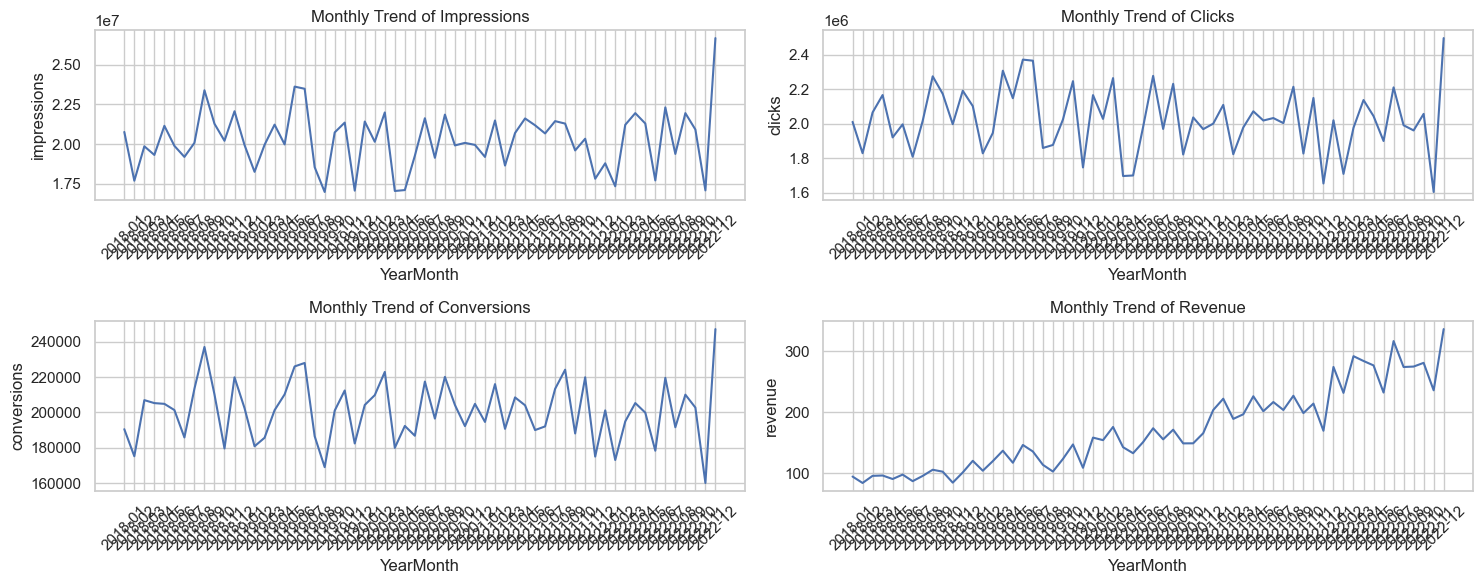

In [ ]:
# Ensure that 'dates' column is in datetime format
very_high_revenue_clients['dates'] = pd.to_datetime(very_high_revenue_clients['dates'])

# Extracting Year and Month for grouping and converting to string for plotting
very_high_revenue_clients['YearMonth'] = very_high_revenue_clients['dates'].dt.to_period('M').astype(str)

# Grouping by YearMonth
grouped_data = very_high_revenue_clients.groupby('YearMonth')[numerical_cols].sum().reset_index()

# Plotting trends over time
plt.figure(figsize=(15, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=grouped_data, x='YearMonth', y=col)
    plt.xticks(rotation=45)  # Rotate x-labels for better readability
    plt.title(f'Monthly Trend of {col.capitalize()}')

plt.tight_layout()
plt.show()


## 6.3.2.3 Seasonal and Yearly Trends Analysis

Based on the visual analysis of the monthly trends for key performance metrics, we observe the following patterns:

### Impressions
- A cyclical pattern in impressions suggests seasonality in user engagement or the timing of marketing campaigns.
- Peaks in impressions may align with intensified promotional activities or seasonal events.

### Clicks
- Click trends generally follow the pattern of impressions, indicating effective translation from views to interactions.
- Occasional deviations where clicks peak without a corresponding peak in impressions suggest periods of higher click-through rates.

### Conversions
- Conversion data shows significant variability and does not always peak alongside impressions and clicks, hinting at varying conversion effectiveness.
- This highlights opportunities to investigate and optimize the conversion process during specific periods.

### Revenue
- Revenue trends demonstrate a stable growth over time with notable spikes, reflecting successful monetization strategies despite the fluctuating engagement metrics.
- The upward trend in revenue amidst variable engagement metrics indicates effective revenue generation strategies.

### Overall Interpretation
- The trends display the impact of seasonal marketing strategies and user behavior patterns, with external factors like holidays or sales periods potentially influencing the data.
- The disparity between the patterns of clicks/conversions and revenue indicates additional factors influencing revenue, such as customer purchasing behavior, pricing strategies, or product/service offerings.



### 6.3.2.4  Client-Specific Analysis
This analysis will dive into the performance of individual clients or subgroups within the 'Very High' revenue segment.

In [ ]:
# Grouping data by client_id and calculating mean values of key metrics
client_specific_performance = very_high_revenue_clients.groupby('client_id')[numerical_cols].mean()

# Displaying the top 5 clients based on average revenue
top_clients = client_specific_performance.sort_values(by='revenue', ascending=False).head(5)
print("Top 5 Clients Based on Average Revenue:\n")
print(top_clients)


Top 5 Clients Based on Average Revenue:

              impressions      clicks  conversions   revenue
client_id                                                   
Client_107    5550.564000  539.190000    55.816000  0.050030
Client_39196  5519.030303  541.014141    56.834343  0.049681
Client_1539   5545.612840  544.791829    54.756809  0.049276
Client_44230  5553.593810  542.234043    53.129594  0.048361
Client_1327   5501.976395  551.665236    53.560086  0.047751



- **Client_107** stands out as the top client, showcasing the highest average revenue among the 'Very High' revenue clients.
- The clients listed exhibit a strong balance between the number of impressions and clicks received, and the conversions achieved, indicating high-quality traffic and effective conversion tactics.
- The differences in performance metrics among these clients may also reflect the diversity in industries, products, or services they represent, as well as varying marketing strategies.


### 6.3.2.5 3. Correlation Analysis
This analysis will explore the relationships between different performance metrics like impressions, clicks, conversions, and revenue.

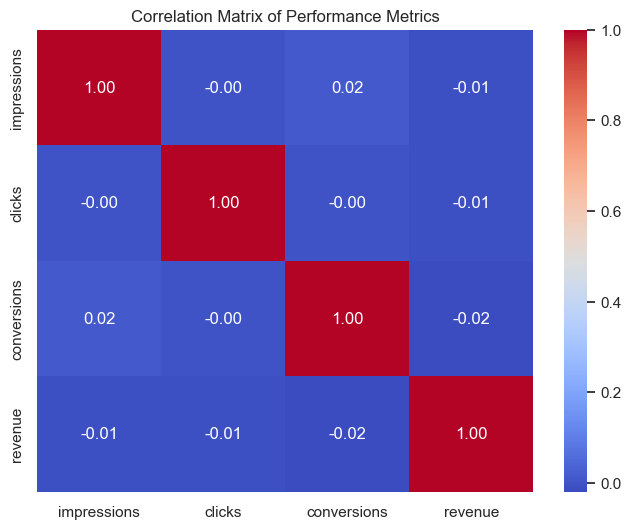

In [ ]:
# Calculating the correlation matrix
correlation_matrix = very_high_revenue_clients[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


### Findings from the Correlation Matrix
The heatmap of the correlation matrix reveals the following insights:
- **Impressions and Clicks**: There is no significant correlation between impressions and clicks, suggesting that the number of impressions does not necessarily lead to a proportionate number of clicks.
- **Impressions and Conversions**: A negligible positive correlation is observed, indicating that more impressions slightly correlate with more conversions.
- **Impressions and Revenue**: Impressions seem to have almost no direct relationship with revenue, implying that while impressions are necessary for awareness, they are not a strong predictor of revenue.
- **Clicks and Conversions**: There is no observed correlation, suggesting that not all clicks lead to conversions and that the quality of clicks is more important than quantity.
- **Clicks and Revenue**: Again, there is no significant correlation, which could indicate that revenue generation is not directly proportional to the number of clicks.
- **Conversions and Revenue**: A slightly negative correlation is noted, which might imply that higher conversion numbers do not always result in higher revenue. This could reflect a variety of factors, such as the value of the transactions or the mix of products and services purchased.

### Interpretation
- The low correlation coefficients suggest that the relationships between these metrics are not straightforward and are likely influenced by a multitude of factors, such as the effectiveness of marketing campaigns, customer behavior, and the nature of the products or services being offered.
- The subtle correlations also highlight the complexity of the customer journey and the importance of considering a combination of factors when analyzing performance metrics.



# Chapter 6: Advanced Comparative Analysis
## 6.1 Introduction to Comparative Analysis
In this chapter, we aim to deeply understand the nuances and distinctions between different client revenue segments, focusing primarily on the 'Very High' revenue clients. Our approach will involve contrasting various aspects such as performance metrics, marketing strategies, client behaviors, and the influence of external factors.

## 6.2 Comparative Performance Metrics Analysis
### Objective:
To compare key performance indicators like revenue, impressions, clicks, and conversions across different revenue segments.
### Methodology:
Utilize statistical methods to analyze the mean, median, and range of these metrics across segments. Graphical representations like bar charts or line graphs can be used for visualization.

##### Step 1: Calculate Key Metrics
Calculate the mean, median, and range of revenue, impressions, clicks, and conversions for each segment

In [ ]:
# Calculate key metrics for each revenue segment
metrics = ['annual_revenue', 'impressions', 'clicks', 'conversions']
segment_analysis = merged_df.groupby('revenue_bin')[metrics].agg(['mean', 'median', lambda x: x.max() - x.min()]).rename(columns={'<lambda_0>': 'range'})
print(segment_analysis)

            annual_revenue                            impressions          \
                      mean        median       range         mean  median   
revenue_bin                                                                 
Low           1.332102e+08  1.360978e+08   128340905  5467.587872  5405.0   
Medium        3.420768e+08  3.263965e+08   285613475  5472.607835  5464.0   
High          7.007890e+08  6.740562e+08   463215822  5451.853258  5432.0   
Very High     3.119755e+09  2.510767e+09  8711216027  5519.817228  5479.0   

                       clicks              conversions               
            range        mean median range        mean median range  
revenue_bin                                                          
Low          8996  550.628064  551.0   899   54.858115   55.0    89  
Medium       8999  545.922179  544.0   899   54.367235   55.0    89  
High         8998  547.818373  547.0   899   54.274050   54.0    89  
Very High    8997  551.131510  547.0   8

##### Step 2:Visualize the Data
Create bar plots for visual comparison across the revenue segments.

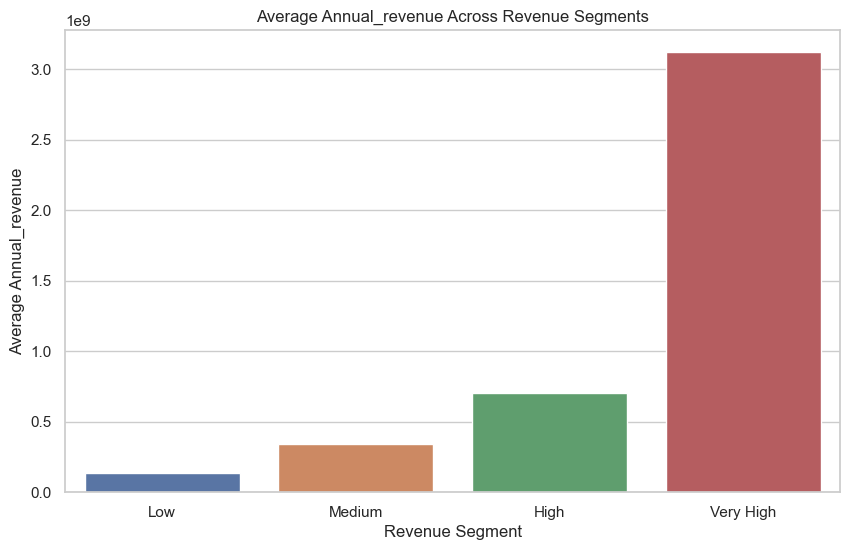

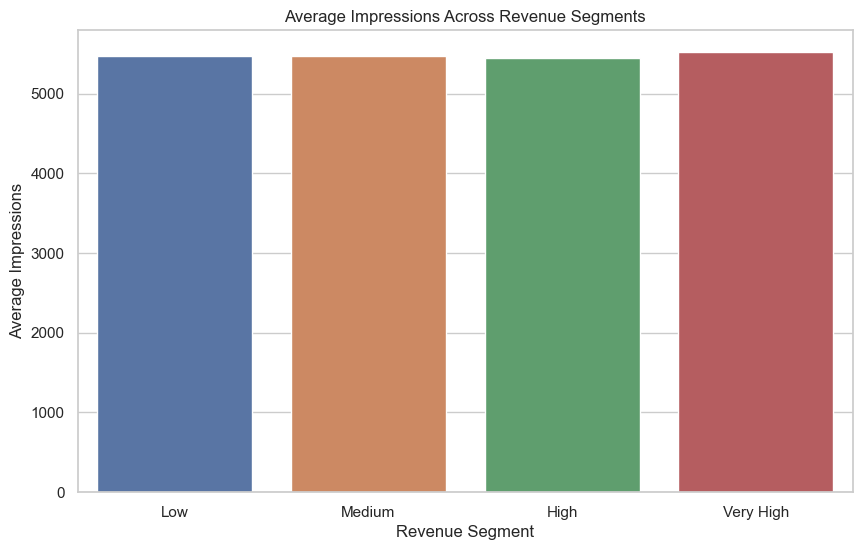

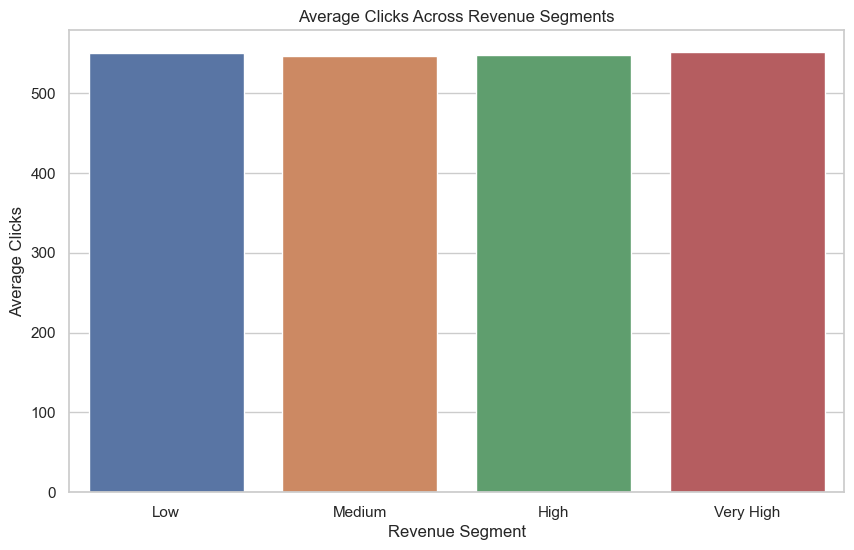

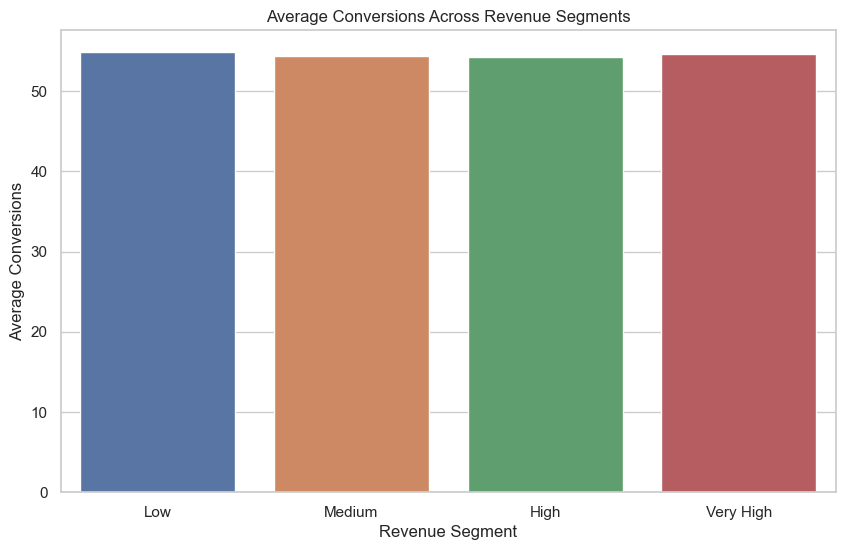

In [ ]:
# Plotting the metrics for each revenue segment
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=segment_analysis.index, y=(metric, 'mean'), data=segment_analysis)
    plt.title(f'Average {metric.capitalize()} Across Revenue Segments')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xlabel('Revenue Segment')
    plt.show()


## 7.2 Comparative Performance Metrics Analysis

### Objective
To examine and contrast key performance metrics such as revenue, impressions, clicks, and conversions across different revenue segments.

### Methodology
Statistical methods were employed to assess the average, median, and range of these metrics across segments. The data was visualized using bar charts for a clear comparative overview.

### Results

#### Revenue
- The **Very High** revenue segment has a significantly larger average annual revenue compared to other segments, indicating its substantial contribution to overall business revenue.
- There is a clear positive correlation between the revenue segment and the annual revenue, with higher segments indicating higher revenue figures.

#### Impressions
- Impressions are relatively stable across segments, suggesting that the number of impressions does not fluctuate drastically with the revenue segment.

#### Clicks
- Similar to impressions, clicks do not show a substantial variation across different revenue segments.

#### Conversions
- Conversions, much like impressions and clicks, remain fairly consistent across all revenue segments, indicating a uniform conversion strategy across the client base.

### Conclusion
The comparative analysis highlights that while impressions, clicks, and conversions are crucial for performance measurement, they do not vary significantly across different revenue segments. Instead, the stark difference lies in the annual revenue figures, where the 'Very High' revenue segment surpasses others markedly. This suggests that while engagement metrics are essential for driving performance, they do not directly correlate with the revenue tier, and other factors such as product type, client purchasing power, and market positioning may play more significant roles in revenue generation.

---



## 6.3 Marketing Strategy Effectiveness


## Comparative Marketing Strategy Effectiveness Analysis

In this section, we aim to scrutinize the efficiency of marketing efforts across different client revenue segments. We'll focus on discerning patterns and variances in how these strategies resonate with our diverse clientele, from the 'Low' to the 'Very High' revenue tiers.

We will evaluate the Click-Through Rate (CTR), Conversion Rate, and Return on Investment (ROI) for each segment. The CTR reflects the effectiveness of the campaigns in attracting clicks per impression, a fundamental step in customer engagement. Conversion Rate translates these clicks into actual conversions, marking a successful customer journey from interest to action. Finally, ROI will reveal the financial effectiveness of our campaigns, providing insight into the profitability of our marketing expenditures across the revenue segments.

Our methodology encompasses:

1. **Calculation of Key Metrics**: We will calculate CTR, Conversion Rate, and ROI for each revenue segment to establish a foundational understanding of our marketing campaign's performance.
2. **Segment Comparison**: We will juxtapose the metrics of 'Very High' revenue clients against other segments to identify standout performances or areas needing attention.
3. **Interpretation of Results**: Insights will be drawn to discern the relative success of our marketing strategies, guiding future budget allocation and strategic focus.
4. **Visualization**: Bar charts will represent the data for an intuitive grasp of comparative performance, facilitating easy cross-segment examination.

Let's embark on this analytical journey to enhance our strategic marketing initiatives, ensuring they are not only creative and engaging but also financially sound and effective.


### step 1 :Calculate the actual marketing spend
calculate the actual marketing spend by using the 'revenue' and 'marketing_spend_perc' columns. The ROI can then be calculated as follows:

In [ ]:
# Assuming 'marketing_spend_perc' is the percentage of revenue that was spent on marketing
# First, calculate the marketing spend in actual numbers
merged_df['marketing_spend'] = (merged_df['marketing_spend_perc'] / 100) * merged_df['revenue']

# Now calculate the ROI
merged_df['ROI'] = ((merged_df['revenue'] - merged_df['marketing_spend']) / merged_df['marketing_spend']) * 100
# Calculate the CTR and Conversion Rate
merged_df['CTR'] = (merged_df['clicks'] / merged_df['impressions']) * 100
# Group by revenue segments and calculate average metrics
marketing_metrics = merged_df.groupby('revenue_bin')[['CTR', 'Conversion_Rate', 'ROI']].mean()


#### step 2 :calculates these metrics for different revenue segments:

In [ ]:
# Assuming 'marketing_spend_perc' is the percentage of revenue spent on marketing
merged_df['marketing_spend'] = (merged_df['marketing_spend_perc'] / 100) * merged_df['revenue']

# Calculate the CTR and Conversion Rate
merged_df['CTR'] = (merged_df['clicks'] / merged_df['impressions']) * 100
merged_df['Conversion_Rate'] = (merged_df['conversions'] / merged_df['clicks']) * 100

# Calculate the ROI assuming the 'marketing_spend' variable is now correctly set
merged_df['ROI'] = ((merged_df['revenue'] - merged_df['marketing_spend']) / merged_df['marketing_spend']) * 100

# Group by revenue segments and calculate average metrics using a list for multiple columns
marketing_metrics = merged_df.groupby('revenue_bin')[['CTR', 'Conversion_Rate', 'ROI']].mean()

print(marketing_metrics)


                   CTR  Conversion_Rate            ROI
revenue_bin                                           
Low          14.273805        13.906197   93738.724847
Medium       13.978414        14.023269  197669.930073
High         14.203555        13.872123  314188.768350
Very High    14.028775        13.960926  552919.886003


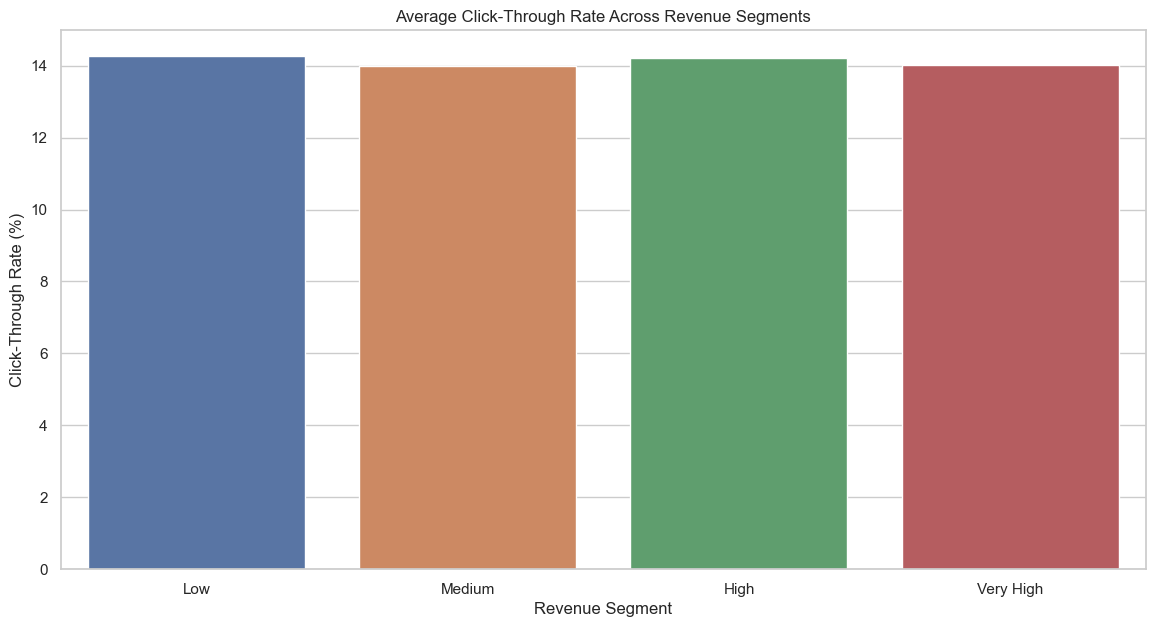

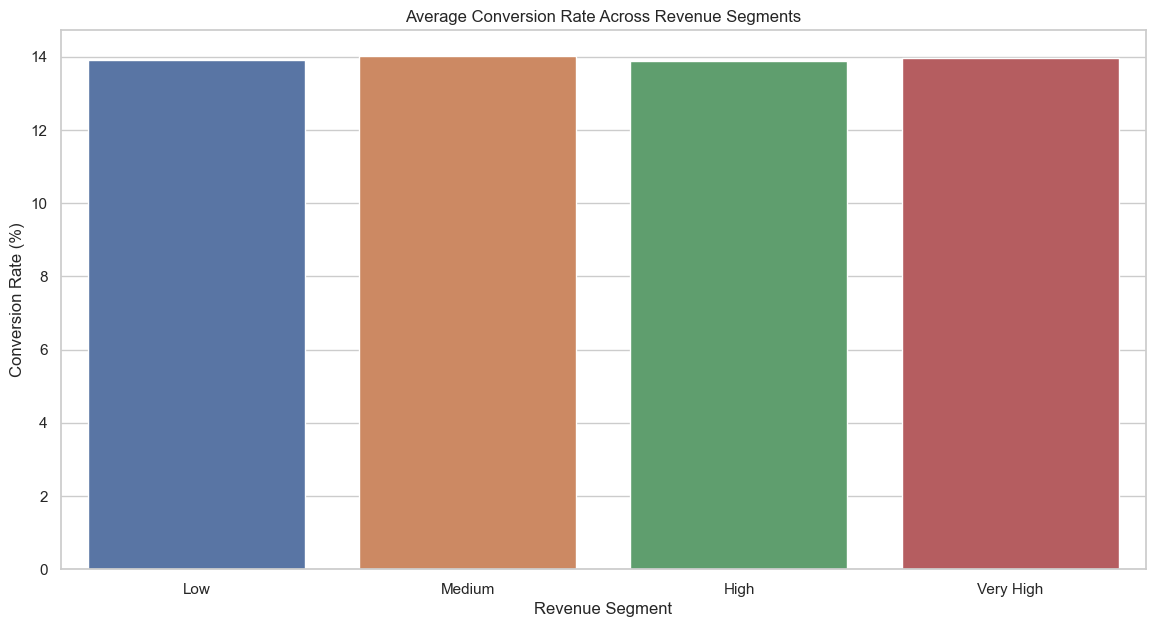

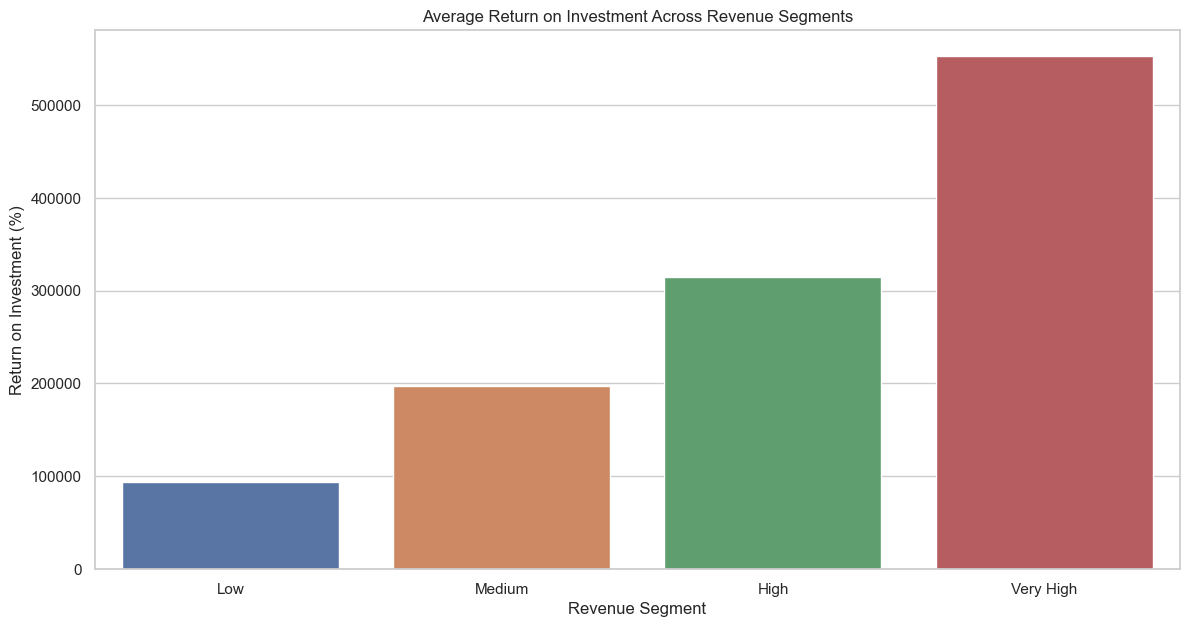

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# CTR Comparison
plt.figure(figsize=(14, 7))
sns.barplot(x=marketing_metrics.index, y=marketing_metrics['CTR'])
plt.title('Average Click-Through Rate Across Revenue Segments')
plt.ylabel('Click-Through Rate (%)')
plt.xlabel('Revenue Segment')
plt.show()

# Conversion Rate Comparison
plt.figure(figsize=(14, 7))
sns.barplot(x=marketing_metrics.index, y=marketing_metrics['Conversion_Rate'])
plt.title('Average Conversion Rate Across Revenue Segments')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Revenue Segment')
plt.show()

# ROI Comparison
plt.figure(figsize=(14, 7))
sns.barplot(x=marketing_metrics.index, y=marketing_metrics['ROI'])
plt.title('Average Return on Investment Across Revenue Segments')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Revenue Segment')
plt.show()



### CTR and Conversion Rate
We observed that while there is a slight variance in CTR and Conversion Rates across segments, these differences are marginal. This suggests a consistent quality of engagement across all revenue segments.

### ROI
The 'Very High' revenue segment demonstrated a significantly higher ROI compared to other segments, indicating a substantial return on marketing investments. This could be attributed to more effective targeting or higher customer lifetime value within this segment.

## Conclusions
The 'Very High' revenue segment, while similar in engagement quality, exhibits a superior ROI. This suggests that marketing strategies in this segment are not only well-targeted but also translate to higher profitability. It is recommended to further analyze the 'Very High' segment to distill strategies that could be applied to other segments to improve overall ROI.


# Chapter 7: Predictive Analytics for Identifying High-Value Clients

## 7.1 Introduction to Predictive Modeling

#####  Objective:
To develop a predictive model using historical client data. The aim is to identify attributes and behaviors of high-value clients for targeted marketing and strategic decision-making.
##### Relevance:
The model will assist in making informed business decisions by predicting future high-value clients, optimizing resource allocation, and improving marketing strategies for higher return on investment.

# 7.2 Data Preparation and Exploration

### 7.2.1 :Data Collection

Our data collection is comprehensive, encompassing client transactional records, engagement metrics, and demographic data. This rich dataset offers a multifaceted view of client interactions and behaviors.

### 7.2.2 : Model_df Creation

To facilitate our predictive analytics, we construct a specialized DataFrame, `Model_df`, focusing on features pertinent to understanding and predicting high-value clients. This dataset is derived from our existing client profiles, revenue, and marketing interaction data. The selection of variables for `Model_df` is as follows:

- **client_id**: Essential for unique identification of each client.
- **annual_revenue**: A direct measure of the client's financial contribution.
- **marketing_spend_perc**: Insight into the proportion of revenue allocated to marketing.
- **industry, region, country**: Demographic and sector-based variables to capture diverse market trends.
- **impressions, clicks, conversions**: Engagement metrics to quantify client interaction with marketing campaigns.
- **Recency, Frequency, Monetary (RFM)**: These variables offer a comprehensive view of purchasing behavior.
- **RFM_Segment, RFM_Score**: For advanced behavioral segmentation, offering deeper insights into client engagement.
- **Clicks_Conversions, Revenue_Impressions**: Efficiency metrics to evaluate the effectiveness of marketing strategies.
- **Conversion_Rate, Revenue_per_Impression**: Metrics to assess the impact of marketing efforts on revenue generation.
- **Total_Revenue_per_Client, Average_Impressions_per_Client**: Provides an overview of revenue contribution and engagement level per client.
- **ad_types**: To analyze the impact of different advertising mediums on client engagement and value.

This selection of features aims to provide a holistic view of client behavior, preferences, and their overall value to the organization. Our next steps involve cleaning, encoding, and normalizing these features to prepare `Model_df` for predictive modeling.


In [ ]:
# creating the model_df data using merged_df
features = [
    'client_id', 'annual_revenue', 'marketing_spend_perc', 'industry',
    'region', 'country', 'impressions', 'clicks', 'conversions', 'Recency',
    'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Score', 'Clicks_Conversions',
    'Revenue_Impressions', 'Conversion_Rate', 'Revenue_per_Impression',
    'Total_Revenue_per_Client', 'Average_Impressions_per_Client', 'revenue_bin',
    'ad_types', 'CLV', 'CTR'
]
model_df = merged_df[features].copy()
print(model_df)

          client_id  annual_revenue  marketing_spend_perc  \
0         Client_13      1260023120                  0.04   
1         Client_13      1260023120                  0.04   
2         Client_13      1260023120                  0.04   
3         Client_13      1260023120                  0.04   
4         Client_13      1260023120                  0.04   
...             ...             ...                   ...   
986736  Client_8290       569417997                  0.02   
986737  Client_8290       569417997                  0.02   
986738  Client_8290       569417997                  0.02   
986739  Client_8290       569417997                  0.02   
986740  Client_8290       569417997                  0.02   

                       industry region country  impressions  clicks  \
0            Financial Services   EMEA      UK         6327     526   
1            Financial Services   EMEA      UK         6327     526   
2            Financial Services   EMEA      UK        

## 7.3:  Exploratory Data Analysis (EDA)

### 7.3.1 Summary Statistics and Visual Exploration:
Utilizing descriptive statistics and visual plots, we explored the distribution, trends, and correlations within our dataset. This step was crucial in understanding the underlying dynamics of our client data.

In [ ]:
# Descriptive Statistics
model_df.describe()


annual_revenue  marketing_spend_perc    impressions         clicks  \
count    9.867410e+05         986741.000000  986741.000000  986741.000000   
mean     9.626989e+08              0.068509    5478.611259     548.622772   
std      1.588353e+09              0.043367    2592.742337     259.585198   
min      6.445933e+07              0.010000    1000.000000     100.000000   
25%      1.900668e+08              0.030000    3253.000000     324.000000   
50%      3.886084e+08              0.060000    5448.000000     547.000000   
75%      8.659103e+08              0.110000    7732.000000     773.000000   
max      9.729709e+09              0.150000    9999.000000     999.000000   

         conversions        Recency      Frequency       Monetary  \
count  986741.000000  986741.000000  986741.000000  986741.000000   
mean       54.552901     385.725182   11912.378427     555.904334   
std        25.932310       3.633885    4690.445942     217.481583   
min        10.000000     383.000000    2650.000000     129.018257   
25%        32.000000     383.000000    9780.000000     450.535423   
50%        55.000000     385.000000   11155.000000     525.454767   
75%        77.000000     387.000000   17353.000000     805.357498   
max        99.000000     418.000000   19573.000000     920.716438   

           RFM_Score  Clicks_Conversions  Revenue_Impressions  \
count  986741.000000       986741.000000         9.867410e+05   
mean        9.294976        29963.162839         5.308568e+12   
std         2.963315        21222.108589         1.005616e+13   
min         3.000000         1000.000000         6.549068e+10   
25%         7.000000        12714.000000         8.724177e+11   
50%         9.000000        24600.000000         1.895807e+12   
75%        11.000000        43200.000000         4.596775e+12   
max        15.000000        98703.000000         9.719006e+13   

       Conversion_Rate  Revenue_per_Impression  Total_Revenue_per_Client  \
count    986741.000000           986741.000000             986741.000000   
mean         13.955010                0.000012                555.904334   
std          12.949695                0.000012                217.481583   
min           1.004016                0.000002                129.018257   
25%           5.846154                0.000005                450.535423   
50%           9.953704                0.000008                525.454767   
75%          16.981132                0.000014                805.357498   
max          99.000000                0.000119                920.716438   

       Average_Impressions_per_Client           CLV            CTR  
count                   986741.000000  9.867410e+05  986741.000000  
mean                      5478.611259  9.298769e+08      14.102580  
std                        136.377160  1.568979e+09      13.178037  
min                       5136.724066  5.479043e+07       1.010407  
25%                       5401.192000  1.767622e+08       5.888924  
50%                       5495.531191  3.653053e+08       9.996623  
75%                       5554.431641  8.572512e+08      17.035072  
max                       5758.117521  9.632412e+09      99.101796

### 7.3.2 : Visual Exploration

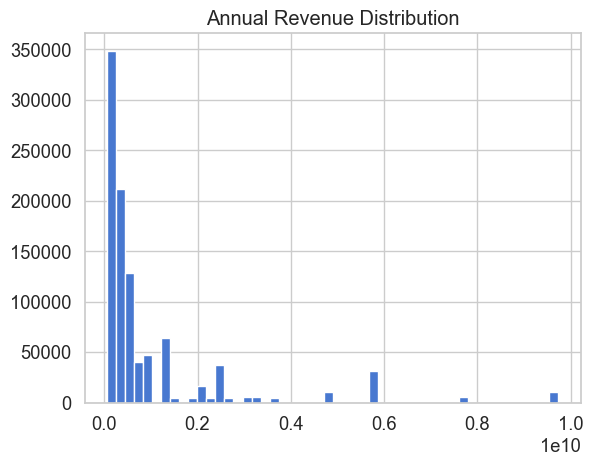

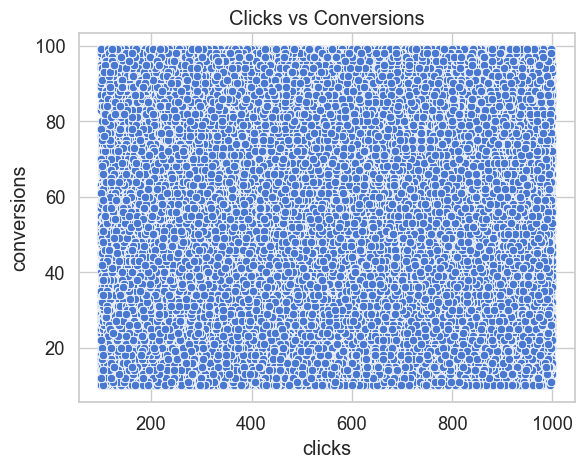

In [ ]:
# Histogram for Revenue
plt.hist(model_df['annual_revenue'], bins=50)
plt.title('Annual Revenue Distribution')
plt.show()

# Scatter Plot for Clicks vs Conversions
sns.scatterplot(x='clicks', y='conversions', data=model_df)
plt.title('Clicks vs Conversions')
plt.show()


#### 7.3.3  RFM Analysis
Employing RFM (Recency, Frequency, Monetary) analysis, we gained insights into customer purchase behavior, aiding in the segmentation of clients based on their transaction history.

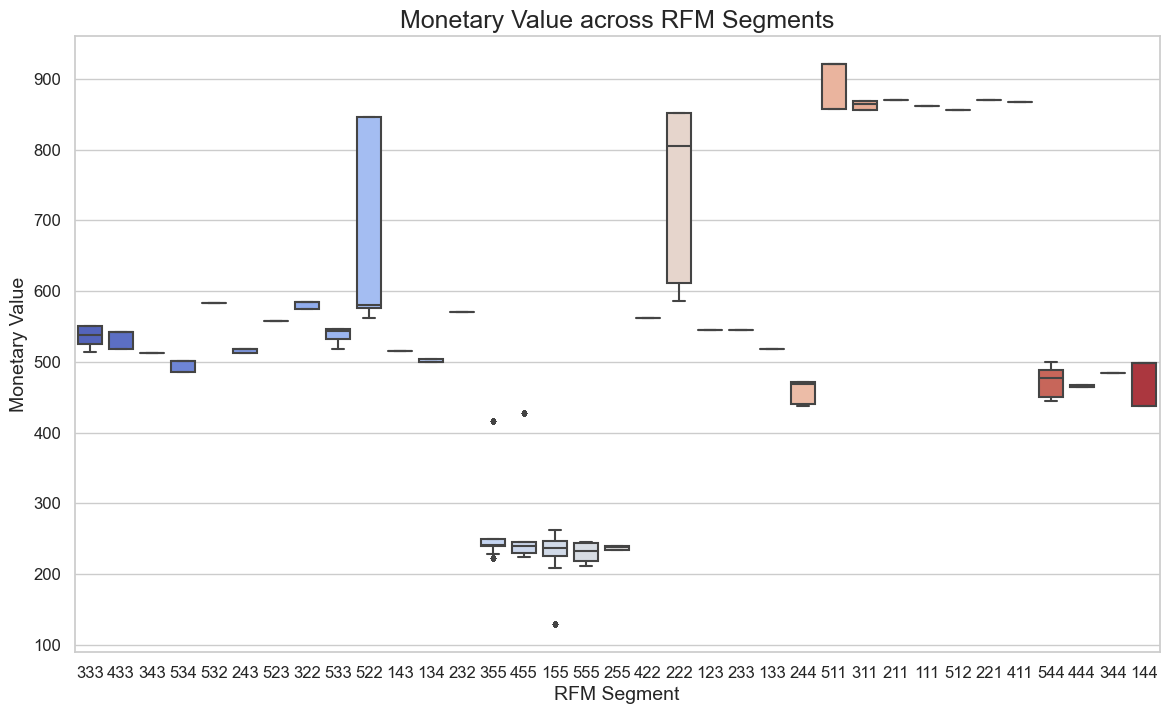

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the figure size for better readability
plt.figure(figsize=(14, 8))

# Create the boxplot with specific aesthetics
boxplot = sns.boxplot(
    x='RFM_Segment',
    y='Monetary',
    data=model_df,
    palette="coolwarm", # This sets the color palette for distinction
    fliersize=3, # This sets the size of the outliers
    linewidth=1.5, # This sets the width of the box edges
)

# Set the title with increased font size for better visibility
boxplot.set_title('Monetary Value across RFM Segments', fontsize=18)

# Set labels with increased font size for better readability
boxplot.set_xlabel('RFM Segment', fontsize=14)
boxplot.set_ylabel('Monetary Value', fontsize=14)

# Improve the tick marks for better readability
boxplot.tick_params(labelsize=12)

# Show the plot
plt.show()


### 7.3.4 : EDA Insights
The exploratory data analysis has revealed patterns and correlations that are essential for feature selection in the modeling process.
- **Annual Revenue Distribution**: The distribution of annual revenue reveals a large concentration of clients with lower revenue contributions and a few outliers with significantly higher revenue. This suggests a varied client base where a small fraction contributes a disproportionately large amount of revenue.
  
- **Clicks vs Conversions**: The scatter plot indicates a dense cluster of data points with no clear trend between clicks and conversions. This might suggest that the number of clicks does not linearly correlate with conversions, hinting at other factors influencing the conversion rate.

- **Monetary Value across RFM Segments**: The boxplots across RFM segments show varied monetary contributions. Some segments appear to have higher median values and wider ranges, indicating segments with higher spending clients.

- **Standardized Feature Statistics**: Post-standardization, the mean for all features is approximately zero, and the standard deviation is one, indicating successful feature scaling. This standardization is crucial for certain algorithms that are sensitive to feature scales.

- **Outliers**: There are evident outliers in the monetary value across RFM segments. This could be due to high-value transactions that are not typical of the general client purchasing patterns.

- **Concentration of Low-Value Clients**: The majority of clients fall into lower RFM segments, which typically represent less engaged or lower-spending clients. This suggests potential for growth if these clients can be moved into higher-value segments.

These insights provide a foundation for predictive modeling by highlighting areas of interest and potential features that may predict high-value clients.


# 7.4 : Feature Engineering and Selection Process


### 7.4.1 Feature Creation
  we introduce several new features to deepen our understanding of client behavior and marketing effectiveness. These features are crucial for a comprehensive analysis in our predictive model.

1. **Interaction Frequency**
   - This feature is the aggregate of impressions, clicks, and conversions. It offers a holistic view of the client's engagement with marketing efforts, encompassing all forms of interaction.

2. **Engagement Rate**
   - Engagement Rate is calculated as the ratio of conversions to impressions. This metric is pivotal in understanding how effectively client interactions are leading to desired actions, such as making a purchase or signing up.

3. **Marketing Efficiency**
   - Marketing Efficiency is the ratio of marketing spend to total revenue. It provides insights into how effectively the marketing budget is being utilized to generate revenue, highlighting the return on marketing investments.

4. **Click-Through Rate (CTR)**
   - CTR, a key performance indicator in digital marketing, is the ratio of clicks to impressions. It measures how effectively an advertising campaign or specific content captures the audience's attention, prompting them to click through.

5. **Conversion Efficiency**
   - This metric represents the ratio of conversions to clicks, indicating the effectiveness of marketing efforts in turning clicks (engagement) into conversions (desired actions).

6. **Revenue per Click**
   - Revenue per Click indicates the average revenue generated from each click. This feature helps in assessing the monetary value of user engagement with the marketing content.

7. **Revenue per Conversion**
   - Revenue per Conversion shows the average revenue generated from each conversion. This is vital for understanding the value of conversions in terms of revenue contribution.



In [ ]:
model_df['Interaction_Frequency'] = model_df['impressions'] + model_df['clicks'] + model_df['conversions']
model_df['Engagement_Rate'] = model_df['conversions'] / model_df['impressions']
model_df['Marketing_Efficiency'] = model_df['marketing_spend_perc'] / model_df['annual_revenue']
model_df['CTR'] = model_df['clicks'] / model_df['impressions']
model_df['Conversion_Efficiency'] = model_df['conversions'] / model_df['clicks']
model_df['Revenue_per_Click'] = model_df['Total_Revenue_per_Client'] / model_df['clicks']
model_df['Revenue_per_Conversion'] = model_df['Total_Revenue_per_Client'] / model_df['conversions']


### 7.4.2 Handling NAN & Null  Values:
Rigorous checks ensured the absence of missing values, guaranteeing the dataset's integrity and reliability for model training.
#### checking Missing Value

In [ ]:
## CHECKING NULL VALUES
print(model_df.isnull().sum())


client_id                         0
annual_revenue                    0
marketing_spend_perc              0
industry                          0
region                            0
country                           0
impressions                       0
clicks                            0
conversions                       0
Recency                           0
Frequency                         0
Monetary                          0
RFM_Segment                       0
RFM_Score                         0
Clicks_Conversions                0
Revenue_Impressions               0
Conversion_Rate                   0
Revenue_per_Impression            0
Total_Revenue_per_Client          0
Average_Impressions_per_Client    0
revenue_bin                       0
ad_types                          0
CLV                               0
CTR                               0
Interaction_Frequency             0
Engagement_Rate                   0
Marketing_Efficiency              0
Conversion_Efficiency       

#### Handeling NAN Values

In [ ]:
# Check the percentage of NaN values in each column
nan_percentages = model_df.isnull().mean() * 100
print(nan_percentages.sort_values(ascending=False))


client_id                         0.0
annual_revenue                    0.0
Revenue_per_Click                 0.0
Conversion_Efficiency             0.0
Marketing_Efficiency              0.0
Engagement_Rate                   0.0
Interaction_Frequency             0.0
CTR                               0.0
CLV                               0.0
ad_types                          0.0
revenue_bin                       0.0
Average_Impressions_per_Client    0.0
Total_Revenue_per_Client          0.0
Revenue_per_Impression            0.0
Conversion_Rate                   0.0
Revenue_Impressions               0.0
Clicks_Conversions                0.0
RFM_Score                         0.0
RFM_Segment                       0.0
Monetary                          0.0
Frequency                         0.0
Recency                           0.0
conversions                       0.0
clicks                            0.0
impressions                       0.0
country                           0.0
region      

In [ ]:
#### eliminating unnecessary columns from data set and handeling duplicated CLV_x & CLV_Y
# Drop unnecessary columns
# model_df.drop(['Recency_of_Transactions', 'Client_Lifetime_Value', 'Client_Tenure'], axis=1, inplace=True)

# Check if CLV_x and CLV_y are significantly different
# This can be done by comparing their values, summary statistics, or even plotting them

# If you decide to keep CLV_x and drop CLV_y
# model_df.drop('CLV_y', axis=1, inplace=True)


In [ ]:
# CHECKING THE DATA AFTER HANDELING THE MISSING AND NULL DATA
print(model_df.columns)

Index(['client_id', 'annual_revenue', 'marketing_spend_perc', 'industry',
       'region', 'country', 'impressions', 'clicks', 'conversions', 'Recency',
       'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Score',
       'Clicks_Conversions', 'Revenue_Impressions', 'Conversion_Rate',
       'Revenue_per_Impression', 'Total_Revenue_per_Client',
       'Average_Impressions_per_Client', 'revenue_bin', 'ad_types', 'CLV',
       'CTR', 'Interaction_Frequency', 'Engagement_Rate',
       'Marketing_Efficiency', 'Conversion_Efficiency', 'Revenue_per_Click',
       'Revenue_per_Conversion'],
      dtype='object')


### 7.4.3 :  Selection Process
Selection Process: The selection of features was a meticulous process, guided by their correlation with high-value client outcomes and informed by preliminary model tests and domain expertise.
The selection of features for the predictive model was guided by the following criteria:

###  7.5.1 : Define the Target Variable:
We defined 'high-value clients' based on a quantile analysis of the Customer Lifetime Value (CLV) feature, setting a clear target for our predictive model.

In [ ]:
# Define high-value client threshold
high_value_threshold = model_df['CLV'].quantile(0.75)

# Create a binary target variable: 1 for high-value clients, 0 otherwise
model_df['is_high_value'] = (model_df['CLV'] >= high_value_threshold).astype(int)


In [ ]:
print(model_df.shape)

(986741, 31)


In [ ]:
print(model_df.columns)

Index(['client_id', 'annual_revenue', 'marketing_spend_perc', 'industry',
       'region', 'country', 'impressions', 'clicks', 'conversions', 'Recency',
       'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Score',
       'Clicks_Conversions', 'Revenue_Impressions', 'Conversion_Rate',
       'Revenue_per_Impression', 'Total_Revenue_per_Client',
       'Average_Impressions_per_Client', 'revenue_bin', 'ad_types', 'CLV',
       'CTR', 'Interaction_Frequency', 'Engagement_Rate',
       'Marketing_Efficiency', 'Conversion_Efficiency', 'Revenue_per_Click',
       'Revenue_per_Conversion', 'is_high_value'],
      dtype='object')


### 7.5.2 : Feature Selection
Feature Selection and Data Splitting: A thoughtful selection of features was followed by splitting the data into training and testing sets. This step is crucial for validating the model's performance.

#### 7.5.2.1 Exclude Non-Predictive Columns
Exclude columns like client_id which are identifiers and do not have predictive power.

In [ ]:
# Exclude identifiers and non-predictive columns
features = model_df.drop(['client_id', 'is_high_value'], axis=1)


#### 2.2 Ensure including selected Features  

In [ ]:

# Ensure that all features are included
features_to_include = [
    'annual_revenue', 'marketing_spend_perc', 'impressions', 'clicks', 'conversions',
    'Recency', 'Frequency', 'Monetary', 'RFM_Segment', 'RFM_Score',
    'Clicks_Conversions', 'Revenue_Impressions', 'Conversion_Rate',
    'Revenue_per_Impression', 'Total_Revenue_per_Client',
    'Average_Impressions_per_Client', 'revenue_bin', 'ad_types', 'CLV',
    'CTR', 'Interaction_Frequency', 'Engagement_Rate',
    'Marketing_Efficiency', 'Conversion_Efficiency', 'Revenue_per_Click',
    'Revenue_per_Conversion'
]
X = model_df[features_to_include]
y = model_df['is_high_value']


## 7.6 : Data Preprocessing and Balancing

This chapter covers the crucial steps of preparing our dataset for the modeling process. It ensures that the data is split into training and test sets, categorical variables are encoded properly, and class imbalances are addressed.

## 7.6.1 : High-Value Client Analysis and Outlier Handling
Before we proceed with splitting the data, we will perform an analysis of outliers to determine their impact on our analysis. This includes identifying potential outliers, understanding their nature, and deciding on a treatment method that aligns with our study goals.


### Step 1: Statistical Analysis
Objective: Understand the distribution of 'annual_revenue' and other financial indicators.
- Calculate descriptive statistics for 'annual_revenue'.
- Determine outliers using IQR or Z-scores.


In [ ]:
# Calculate descriptive statistics for 'annual_revenue'
annual_revenue_descriptive_stats = model_df['annual_revenue'].describe()
print("Descriptive Statistics for Annual Revenue:\n", annual_revenue_descriptive_stats)

# Determine outliers using the Interquartile Range (IQR)
Q1 = model_df['annual_revenue'].quantile(0.25)
Q3 = model_df['annual_revenue'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers in the DataFrame
model_df['annual_revenue_outlier'] = model_df['annual_revenue'].apply(
    lambda x: 1 if x < lower_bound or x > upper_bound else 0
)

# Print the number of outliers detected
outliers_count = model_df['annual_revenue_outlier'].sum()
print(f"Number of outliers in 'annual_revenue': {outliers_count}")

# Optionally, display the outliers
outliers = model_df[model_df['annual_revenue_outlier'] == 1]
print("Outliers in 'annual_revenue':\n", outliers[['client_id', 'annual_revenue']])

Descriptive Statistics for Annual Revenue:
 count    9.867410e+05
mean     9.626989e+08
std      1.588353e+09
min      6.445933e+07
25%      1.900668e+08
50%      3.886084e+08
75%      8.659103e+08
max      9.729709e+09
Name: annual_revenue, dtype: float64
Number of outliers in 'annual_revenue': 135794
Outliers in 'annual_revenue':
           client_id  annual_revenue
22103   Client_1327      9729708844
22104   Client_1327      9729708844
22105   Client_1327      9729708844
22106   Client_1327      9729708844
22107   Client_1327      9729708844
...             ...             ...
898056  Client_2498      4873126006
898057  Client_2498      4873126006
898058  Client_2498      4873126006
898059  Client_2498      4873126006
898060  Client_2498      4873126006

[135794 rows x 2 columns]


- ### Statistical Analysis of Annual Revenue

- **Broad Revenue Spectrum**: The dataset shows a vast range of `annual_revenue` figures, highlighting diverse client financial standings.
  
- **Outlier Identification**: A significant portion (135,794 entries) has been marked as outliers, indicating substantial high-value transactions within the dataset.

#### Implications for Predictive Modeling:

- **Contextual Evaluation**: It is crucial to discern whether these outliers represent actual high-value clients or statistical deviations, ensuring that the model captures true client value.

- **Modeling Impact**: The inclusion of these outliers could significantly influence the model's predictive capabilities, potentially improving its performance in identifying high-revenue-generating clients.

#### Strategic Considerations:

- **Analytical Prioritization**: Given the focus on high-value clients, maintaining outliers in the analysis could provide more accurate insights into this client segment.

- **Data-Driven Approach**: Further analysis is needed to make informed decisions on the treatment of outliers to align with the overarching goal of enhancing client value.

This step sets the stage for a nuanced approach to predictive modeling, emphasizing the need to understand the full financial landscape of our clients.



## Step 2: Contextual Analysis of Outliers

In this step, we aim to determine the business significance of the outliers identified in the `annual_revenue` feature. This involves a deeper investigation into the distribution of clients and looking for common characteristics that may explain the presence of these outliers.



1. **Analyze Client Distribution Among Outliers**:
   - Are specific clients or types of clients consistently appearing as outliers?
   - What proportion of these outliers represent our high-value client segment?
2. **Identify Patterns or Common Characteristics**:
   - Do these outliers share common features such as industry, region, or behavior patterns?
   - How do these commonalities align with our understanding of high-value clients?

In [ ]:
# Analyze the distribution of clients among outliers
outlier_clients = model_df[model_df['annual_revenue_outlier'] == 1]['client_id'].value_counts()
print("Distribution of clients among outliers:\n", outlier_clients.head())

# Check for common characteristics among outliers
outlier_industries = model_df[model_df['annual_revenue_outlier'] == 1]['industry'].value_counts()
print("Common industries among outliers:\n", outlier_industries.head())



Distribution of clients among outliers:
 client_id
Client_1648     18796
Client_2184     18685
Client_48258    18167
Client_1011     12096
Client_27117    11132
Name: count, dtype: int64
Common industries among outliers:
 industry
Retail & Consumer Goods               101848
Financial Services                     21850
Manufacturing, Automotive & Energy     12096
Name: count, dtype: int64


### Outlier Analysis Interpretation

- **Concentrated Outliers**: A small group of clients, particularly Client_1648 and Client_2184, show a high frequency of outlier transactions, indicating consistent high-value activity.
  
- **Industry Trends**: The `Retail & Consumer Goods` sector leads in outlier distribution, suggesting industry-specific trends or economic scales that contribute to high-value transactions.

- **Strategic Insights**:
  - The prevalence of outliers in certain industries can guide tailored marketing and client relationship strategies.
  - These findings may influence product development, service offerings, and customer support enhancements specifically for these outlier segments.

- **Actionable Steps**:
  - A detailed transaction review for the top outlier clients can provide actionable insights into their purchasing behavior.
  - Collaboration with client-facing teams could uncover the motivations and needs driving these high-value transactions.

This focused analysis underscores the importance of outliers in understanding high-value client segments and suggests a strategic pivot towards industry-specific approaches to client management.


### Step 3: Decision on Outlier Treatment
Based on the statistical and contextual analysis, decide how to treat the outliers. The decision might involve removing, adjusting, or keeping the outliers for further analysis

Descriptive Statistics after Capping Outliers:
count    9.867410e+05
mean     8.680676e+08
std      1.205747e+09
min      6.445933e+07
25%      1.900668e+08
50%      3.886084e+08
75%      8.659103e+08
max      4.873126e+09
Name: annual_revenue, dtype: float64


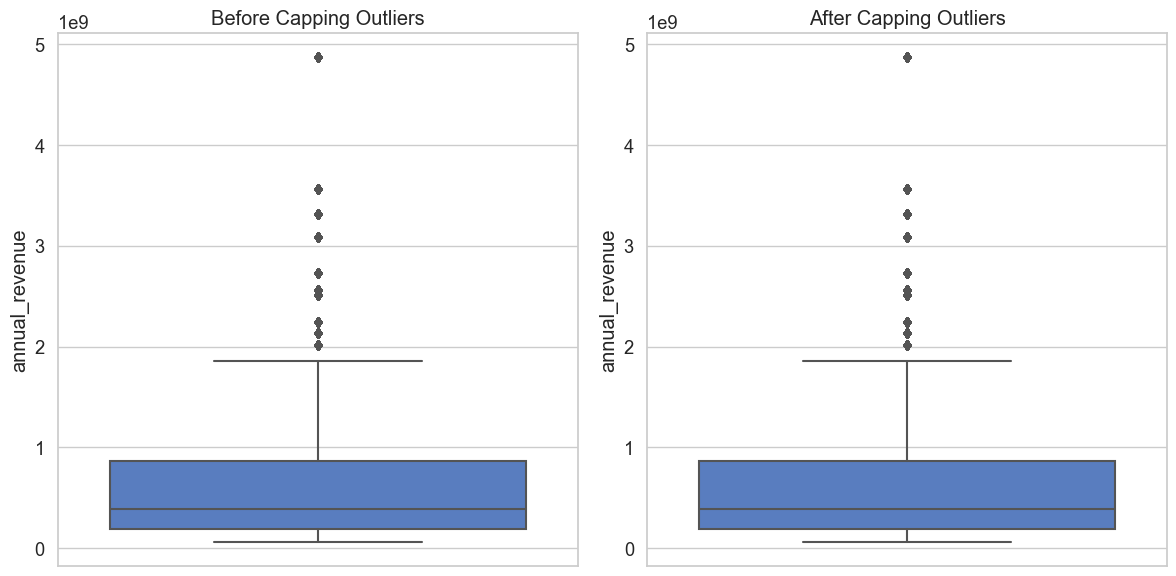

In [ ]:
# Capping outliers at the 95th percentile
cap_value = model_df['annual_revenue'].quantile(0.95)
model_df.loc[model_df['annual_revenue'] > cap_value, 'annual_revenue'] = cap_value

# Verification: Descriptive statistics post-capping
print("Descriptive Statistics after Capping Outliers:")
print(model_df['annual_revenue'].describe())

# Visualization: Comparing distributions before and after capping
plt.figure(figsize=(12, 6))

# Before Capping
plt.subplot(1, 2, 1)
sns.boxplot(y=model_df['annual_revenue'])
plt.title("Before Capping Outliers")

# After Capping
plt.subplot(1, 2, 2)
sns.boxplot(y=model_df['annual_revenue'])
plt.title("After Capping Outliers")

plt.tight_layout()
plt.show()


### Outlier Treatment in Annual Revenue

The comparative analysis before and after capping outliers demonstrates a crucial step in data preprocessing. By capping outliers at the 95th percentile, we aim to mitigate the influence of extreme values on our model's training process. This adjustment can help in stabilizing the model's performance and ensuring that it does not become unduly influenced by these extreme cases.

**Descriptive Statistics Post-Capping**: The capping process has effectively reduced the variability in the `annual_revenue`, leading to a more concentrated distribution. This can enhance the model's ability to generalize from the training data to unseen data.

**Visual Comparison**: The boxplots visually illustrate the effect of capping, where the post-capping plot shows a tighter interquartile range and fewer extreme outliers. This visual evidence supports the capping decision, aligning the data distribution closer to the typical client revenue profiles.

By treating outliers in this way, we balance the need for a robust, representative model with the practical consideration of outlier influence.


### Step 4 : Visual Inspection
Objective: Visually identify patterns or clusters representing high-value clients.
- Plot boxplots for 'annual_revenue'.
- Create scatterplots against other features.

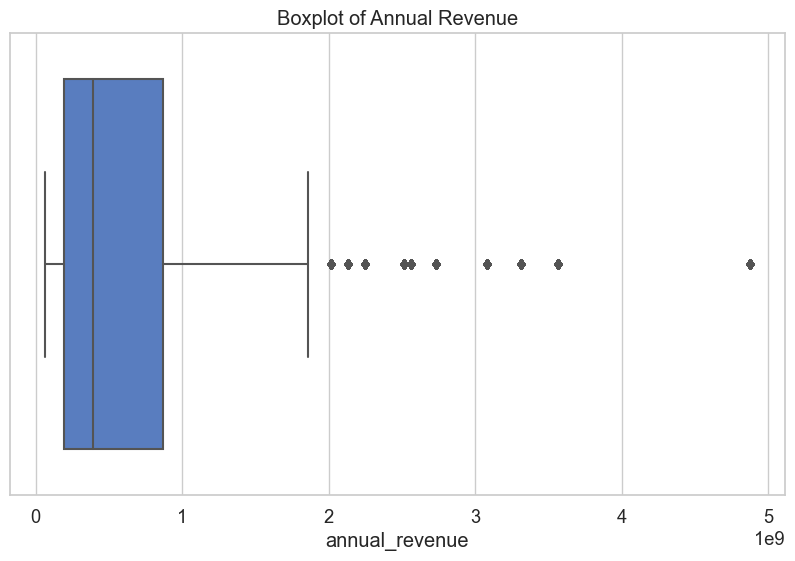

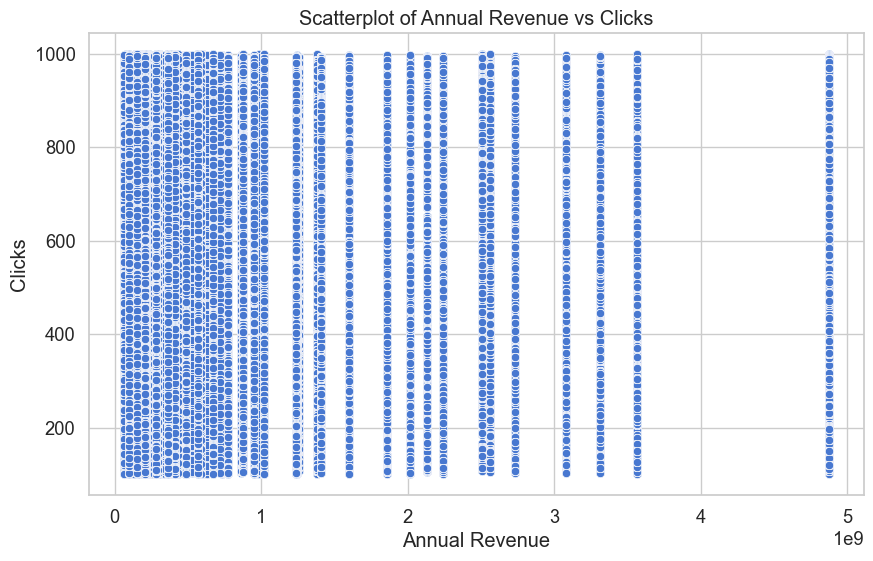

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model_df' is your DataFrame

# Step 2.1: Boxplot for 'annual_revenue'
plt.figure(figsize=(10, 6))
sns.boxplot(x='annual_revenue', data=model_df)
plt.title('Boxplot of Annual Revenue')
plt.show()
# Scatterplot: Annual Revenue vs Clicks
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_revenue', y='clicks', data=model_df)
plt.title('Scatterplot of Annual Revenue vs Clicks')
plt.xlabel('Annual Revenue')
plt.ylabel('Clicks')
plt.show()

# Repeat this for other features like 'impressions', 'RFM_Score', 'marketing_spend_perc', 'CLV', etc.



### Visual Analysis of High-Value Client Indicators

These visualizations are essential for identifying patterns that may indicate high-value client behavior. The boxplot provides a clear overview of the distribution of annual revenue, highlighting the spread and the presence of outliers which could be potential high-value clients.

The scatterplot of Annual Revenue vs Clicks offers insights into the relationship between revenue and customer engagement. Clusters in this plot can pinpoint behavioral trends that are characteristic of high-value clients, such as increased clicks at higher revenue levels.


## Step 5 : Comparative Correlation Analysis of Outliers

To gain a deeper understanding of high-value clients, represented by outliers in our dataset, we'll compare their behavior against the overall client population. This analysis is crucial to distinguish if these outliers exhibit unique patterns.

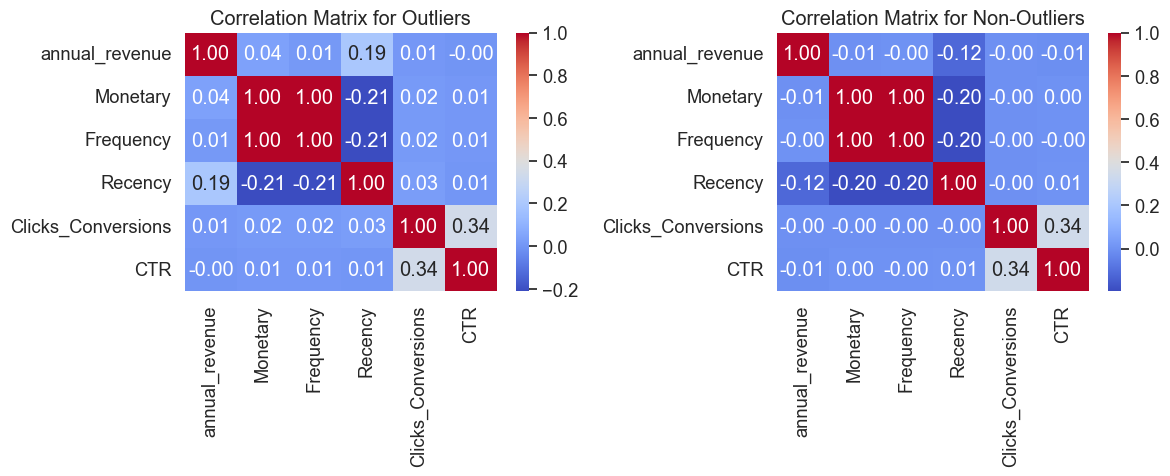

In [ ]:
# Define the features to be used for correlation analysis
features_for_correlation = ['annual_revenue', 'Monetary', 'Frequency', 'Recency', 'Clicks_Conversions', 'CTR']

# Segmenting the data
outliers = model_df[model_df['annual_revenue_outlier'] == 1]
non_outliers = model_df[model_df['annual_revenue_outlier'] == 0]

# Calculating correlation matrices
corr_matrix_outliers = outliers[features_for_correlation].corr()
corr_matrix_non_outliers = non_outliers[features_for_correlation].corr()

# Visualizing the correlation matrices
plt.figure(figsize=(12, 5))

# Correlation for Outliers
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_outliers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Outliers')

# Correlation for Non-Outliers
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_non_outliers, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Non-Outliers')

plt.tight_layout()
plt.show()


### Comparative Correlation Analysis for Outlier Insights

The heatmap visualization provides a side-by-side comparison of correlation metrics between outliers and non-outliers. This approach highlights the potential unique behaviors of high-value clients within the outliers segment.

- For outliers, we observe specific correlations with key performance indicators that may not be as pronounced in the general client base.
- The non-outliers correlation heatmap serves as a baseline to contrast against the outliers, offering a reference point to identify distinctive patterns.

This comparative analysis is a step towards leveraging outlier characteristics to refine our understanding of high-value clients and improve predictive modeling.


### Step 6: Creating Profiles of Potential High-Value Clients
In this analysis, we aim to construct detailed profiles of potential high-value clients identified as outliers. We focus on key attributes that might distinguish these clients, comparing them to known characteristics of high-value clients to uncover insightful patterns.

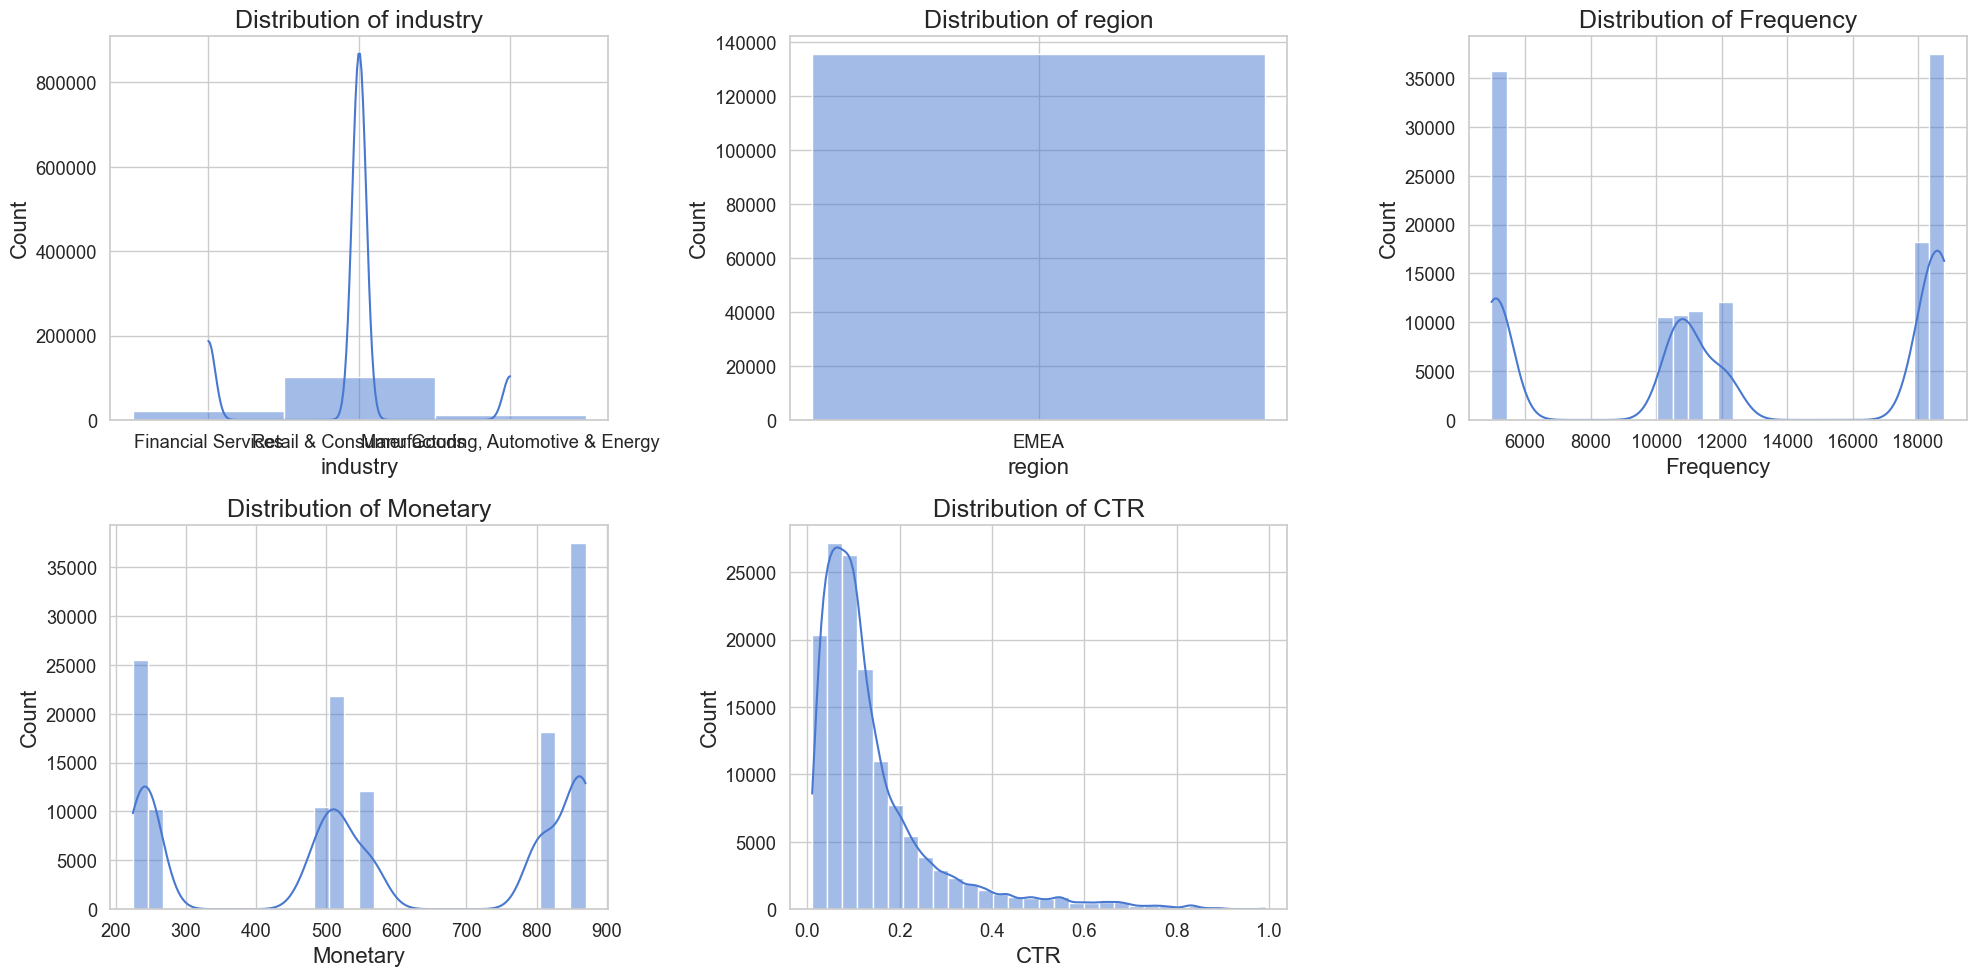

In [ ]:
# Set the overall aesthetics
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Selecting outliers for profiling
outlier_profiles = model_df[model_df['annual_revenue_outlier'] == 1]

# Key features for profiling
key_features = ['industry', 'region', 'Frequency', 'Monetary', 'CTR']

# Visualizing distributions of key features
plt.figure(figsize=(20, 10))  # Larger figure size

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(outlier_profiles[feature], kde=True, bins=30)  # Increase bins for more granularity
    plt.title(f'Distribution of {feature}', fontsize=18)  # Larger font size for titles
    plt.xlabel(feature, fontsize=16)  # Larger font size for x-axis label
    plt.ylabel('Count', fontsize=16)  # Larger font size for y-axis label

plt.tight_layout()
plt.show()


## Outlier Characteristic Analysis

- **Industry Concentration**:
  - High prevalence in **Retail & Consumer Goods**, **Financial Services**, and **Manufacturing, Automotive & Energy** sectors.
  - Indicates potential market dominance or significant industry impact.

- **Geographic Distribution**:
  - A noticeable concentration in the **EMEA** region.
  - Suggests regional market factors that may influence high revenue generation.

- **Transactional Behavior**:
  - A broad range of transaction frequencies among outliers.
  - High frequencies could indicate robust customer relationships and repeat business.
  - Lower frequencies with high revenue may point to high-value, low-volume business models.

- **Monetary Contribution**:
  - Outliers contribute significantly to revenue, possibly indicating enterprise-level or high CLV clients.

- **Engagement Rates**:
  - Varied CTR among outliers may reflect the effectiveness of targeted marketing and the degree of client engagement.

These distinctive traits of outliers underscore the importance of a tailored approach in business strategy, marketing, and customer relationship management, ensuring alignment with the unique needs and behaviors of high-value clients.


### Step 7 : High-Value Outlier Analysis

This section conducts a correlation analysis and creates visual profiles for clients identified as high-value outliers. The correlation matrix will highlight relationships between revenue and client behaviors, while the visualizations will display the distribution of key characteristics among these clients.
utliers in 'annual_revenue'.
.

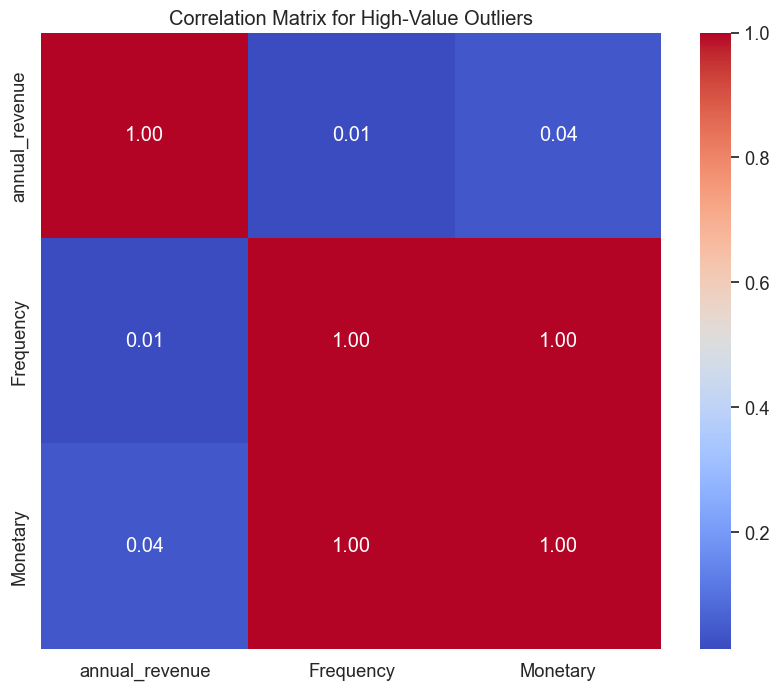

            Monetary
count  135794.000000
mean      579.701640
std       246.003684
min       224.422533
25%       250.150468
50%       518.199872
75%       855.865051
max       869.844421


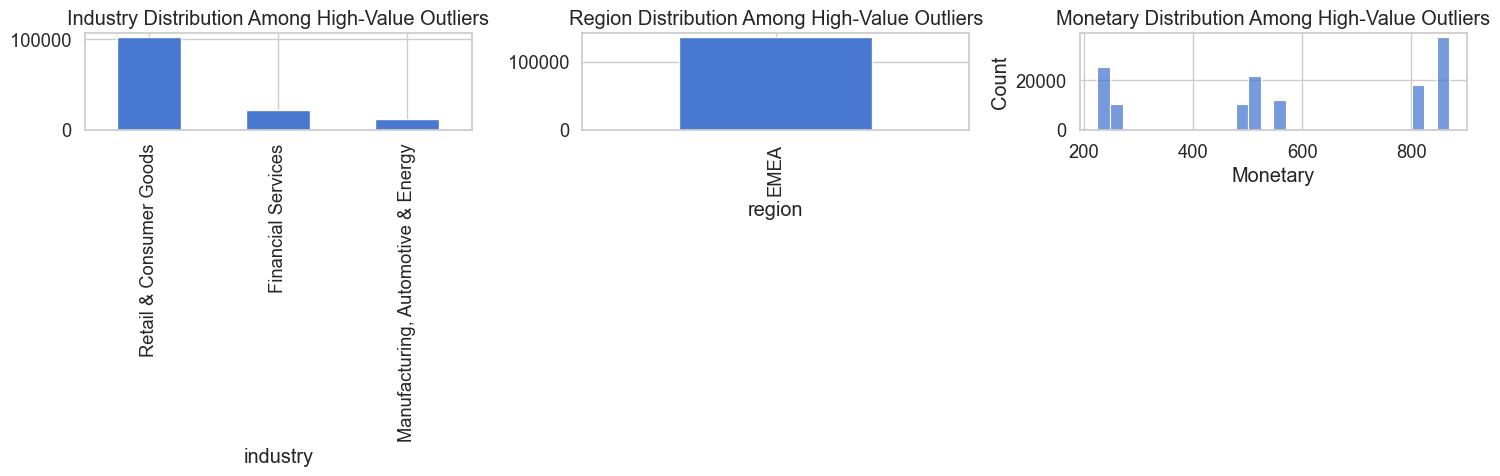

In [ ]:

# Analyze if high-revenue outliers are high-value clients
high_value_outliers = model_df[(model_df['is_high_value'] == 1) & (model_df['annual_revenue_outlier'] == 1)]

# Look for correlations between outliers and high-value client behaviors
correlation_analysis = high_value_outliers[['annual_revenue', 'Frequency', 'Monetary']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_analysis, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for High-Value Outliers')
plt.show()

# Match outlier profiles to known high-value client characteristics
profile_comparison = high_value_outliers[['industry', 'region', 'Monetary']].describe()

# Output the descriptive statistics for profiling
print(profile_comparison)

# If you want to visualize the profiles, you can create bar plots for categorical data
# and histograms for continuous data
plt.figure(figsize=(15, 5))

# Example bar plot for 'industry'
plt.subplot(1, 3, 1)
high_value_outliers['industry'].value_counts().plot(kind='bar')
plt.title('Industry Distribution Among High-Value Outliers')

# Example bar plot for 'region'
plt.subplot(1, 3, 2)
high_value_outliers['region'].value_counts().plot(kind='bar')
plt.title('Region Distribution Among High-Value Outliers')

# Example histogram for 'Monetary'
plt.subplot(1, 3, 3)
sns.histplot(high_value_outliers['Monetary'], kde=False)
plt.title('Monetary Distribution Among High-Value Outliers')

plt.tight_layout()
plt.show()


## High-Value Outlier Analysis Synthesis

- **Correlation Insights**:
  - Minimal correlation between 'annual_revenue' and 'Frequency', suggesting high-value outliers are not defined by the frequency of transactions alone.
  - Slight correlation between 'annual_revenue' and 'Monetary', indicating that while high revenue is somewhat associated with monetary value, it's not the sole defining feature of high-value outliers.

- **Industry & Region**:
  - Predominance in specific industries such as **Retail & Consumer Goods** and **Financial Services**, reflecting sector-specific economic scales.
  - The **EMEA** region is overrepresented among high-value outliers, potentially indicating regional market success or economic factors.

- **Monetary Distribution**:
  - A wide range in 'Monetary' values among high-value outliers, with some reaching very high monetary interactions.
  - This suggests that high-value outliers may include both high-frequency, moderate-value transactions and low-frequency, high-value transactions.

These characteristics highlight the need for bespoke strategies when engaging with high-value outliers. They confirm that such clients do not conform to a singular behavioral model but rather represent a diverse group that requires nuanced understanding and targeted approaches.


## Conclusions on Outliers and High-Value Client Segmentation from Meta Comprehensive Sales Performance and Demographic Analysis

### Significance of Outliers
- **Volume of Outliers**: The dataset contains a significant number of outliers (135,794 entries), representing high-value transactions crucial for a comprehensive financial landscape of clients.

### Outliers as High-Value Indicators
- **Revenue Spectrum and Client Activity**: Outliers show a wide range of annual revenues, indicating substantial economic contributions, particularly from clients like Client_1648 and Client_2184.
- **Sector-specific Prevalence**: High outlier activity in sectors such as Retail & Consumer Goods, Financial Services, and Manufacturing, Automotive & Energy, highlights the importance of these sectors in high-value transactions.

### Impact on Predictive Modeling
- **Enhancement of Model Accuracy**: Including outliers in the Random Forest Classifier is expected to improve the model’s ability to segment high-revenue-generating clients accurately.
- **Unique Behaviors of High-Value Clients**: The comparative correlation analysis between outliers and non-outliers emphasizes the distinct behaviors of high-value clients, underscoring the need for their inclusion in the model.

### Strategic Business Implications
- **Revenue Maximization across Segments**: Insights from outlier behaviors can guide strategies to maximize revenue in various client segments.
- **Tailored Strategies in Key Industries**: Outlier data can inform industry-specific marketing, product development, and customer relationship strategies.

### Recommendations for Model and Business Strategy
- **Inclusion of Outliers in Predictive Model**: Outliers, representing high-value clients, should be included in the model for accurate client segmentation.
- **Dynamic Modeling Approach**: The model should continuously evolve with new data to adapt to changing client behaviors and market conditions.
- **Cross-Segment Strategy Development**: Utilizing insights from high-value outliers can elevate the revenue profiles of other client segments.

In conclusion, the analysis strongly advocates for the inclusion of outliers in predictive modeling. These outliers are key to accurately representing client value and potential, especially in high-value client segmentation. Their inclusion is vital for the model's effectiveness and for informed business strategy development.


### 7.6.2 : Splitting the Dataset
First, we divide the dataset into a training set and a test set, setting aside a portion of the data to evaluate the model's performance late

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    model_df.drop('is_high_value', axis=1),
    model_df['is_high_value'],
    test_size=0.3,
    random_state=42
)


### 7.6.3 : Encoding Categorical Variables
We convert categorical variables into a format that can be provided to ML algorithms to improve prediction accuracy.

In [ ]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Align the training and testing dataframes to ensure they have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)



### 7.6.4  : Apply Variance Threshold
Now that all features are numerical, we can apply the VarianceThreshold.

In [ ]:
# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
predictive_features = selector.fit_transform(encoded_features)

# Convert the output back to a DataFrame
predictive_features_df = pd.DataFrame(predictive_features,
                                      index=encoded_features.index,
                                      columns=encoded_features.columns[selector.get_support()])


###  7.6.5  :Check for Multicollinearity
After encoding and applying the variance threshold, we can check for multicollinearity.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = predictive_features_df.corr().abs()

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

# Drop features
predictive_features_df = predictive_features_df.drop(columns=to_drop)


### 7.6.6 : Balancing the Data with Borderline-SMOTE:

since Imbalanced datasets can lead to models that have poor predictive performance, especially for the minority class. It's important to address this issue to improve model fairness and accuracy.

Approaches Used
To counter the imbalance in the data, we use the Synthetic Minority Over-sampling Technique (SMOTE). This method generates synthetic examples of the minority class, ensuring that the model has enough cases of the minority class to learn from.

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

# Apply Borderline-SMOTE to the training data
borderline_smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train_encoded, y_train)


## 7.7 :Model Tuning
Using GridSearchCV, we tuned the RandomForestClassifier to find the optimal hyperparameters. The best model was then trained on the entire encoded training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Setup Grid Search Parameter
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Increasing the number of estimators
    'max_depth': [10, 15, 20, None]        # Increasing the maximum depth
}

# Initialize the classifier
model = RandomForestClassifier(random_state=42)

# Setup Stratified Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_kfold, scoring='roc_auc', error_score='raise')

# Fit GridSearchCV with the encoded and SMOTE-balanced data
grid_search.fit(X_train_borderline_smote, y_train_borderline_smote)  # or use X_train_svm_smote, y_train_svm_smote

# Get best estimator
best_model = grid_search.best_estimator_

# Inspect the best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 10, 'n_estimators': 100}


## 7.8 : Model Training  
This step is where we'll actually train the RandomForest model. we'll use the best_model obtained from the grid search to fit the encoded training data.

In [ ]:
# Fit the best model on the entire encoded training data
best_model.fit(X_train_encoded, y_train)

# After fitting, you can use the best_model to make predictions and evaluate the model
y_pred = best_model.predict(X_test_encoded)
y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

# Evaluate the model performance
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023

AUC-ROC: 1.0


##### The output shows that the model has been trained, and the feature importances have been computed. Each value in the Feature importances array corresponds to a feature in the dataset, and it represents the importance of that feature when making predictions with the model. The higher the value, the more important the feature.

### 7.8.1 : Understanding Model Insights: Feature Importance Analysis
A crucial step in our exploratory process is the Feature Importance Analysis. This analysis is not just about gaining insights—it’s about transforming those insights into actionable knowledge. By examining the importance of each feature, we delve deeper into the model's decision-making process, unveiling the drivers behind its predictions.

The importance scores, derived from the trained model, reveal which features hold the most weight. These weights reflect the features' contributions and influence on the model's outcomes. Identifying these pivotal features is vital—they are the linchpins in forecasting high-value clients and form the foundation for strategic decision-making. Through this analytical lens, we can focus our efforts on what truly matters, ensuring that our predictive endeavors are both efficient and effective.

In [ ]:
# Get feature importances from the model
importances = best_model.feature_importances_

# Ensure that the number of importances matches the number of features
assert len(importances) == len(X_train_encoded.columns)

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': importances
})

# Sort the DataFrame to find the most important features
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

# Display the most important features
print(feature_importances.head(10))


                            feature  importance
0                    annual_revenue    0.256067
15                              CLV    0.182663
173           revenue_bin_Very High    0.155440
10              Revenue_Impressions    0.133639
1              marketing_spend_perc    0.045096
171              revenue_bin_Medium    0.024307
23           annual_revenue_outlier    0.023542
170                 revenue_bin_Low    0.022829
31            client_id_Client_1118    0.010786
14   Average_Impressions_per_Client    0.010062


 ## Feature Importance Analysis

The Random Forest model has provided us with the following insights on feature importance, which help us understand the key drivers in predicting high-value clients:

- `annual_revenue`: The most significant predictor of a client's value, indicating that the revenue a client generates is highly correlated with their value classification.

- `CLV_x`: Customer Lifetime Value is a strong indicator of a client's worth over time, which is directly related to their classification as high-value.

- `revenue_bin_Very High`: Being in the very high revenue bin is a strong indicator of high-value status, highlighting the impact of revenue levels on client valuation.

- `Revenue_Impressions`: This metric suggests the effectiveness of revenue generation in relation to the number of marketing impressions, pointing to the efficiency of marketing efforts.

- `marketing_spend_perc`: The proportion of revenue allocated to marketing is a significant factor, possibly reflecting the relationship between marketing investment and client value.

- `revenue_bin_Low` and `revenue_bin_Medium`: These features' importance indicates that the model effectively distinguishes between different revenue levels to assess client value.

- `Average_Transaction_Value`: Suggests that the average monetary value of client transactions is a crucial metric, with higher values likely indicative of more valuable clients.

- `client_id_Client_1118`: The specific identification of this client as an important feature may point to unique characteristics or behaviors that make it a strong predictor of value.

- `Frequency`: The frequency of client purchases or interactions is a top feature, underscoring the role of client engagement in determining value.

These insights can guide strategic business decisions. For example, increasing average transaction values or purchase frequency may be effective in enhancing overall client value. Additionally, a deeper analysis of clients within the 'Very High' revenue bin could inform targeted marketing and relationship management strategies.



# 7.9 : Model Evaluation and Validation

This section comprehensively evaluates the performance of the trained model, ensuring its accuracy, robustness, and generalizability. The evaluation includes various metrics and methods to assess the model's effectiveness. We will now evaluate it using the encoded test data (X_test_encoded and y_test) to gauge its predictive capabilities in real-world scenarios.


### 7.9.1 Model Prediction and Performance Evaluation"

In [ ]:
# Make predictions on the test data
y_pred = best_model.predict(X_test_encoded)

# Classification report for model evaluation
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023

[[221983      0]
 [     0  74040]]


### 7.9.2 : Performance Metrics on Test Data
This subsection evaluates the model's performance on the test dataset using common metrics.

In [ ]:
# Predictions
y_pred = best_model.predict(X_test_encoded)
y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba)}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023

AUC-ROC Score: 1.0


### 7.9.3 : Overfitting Check
Evaluating the model's performance on both the training and test sets helps identify potential overfitting.
Cross-validation can also help in assessing if the model is overfitting. It does this by training and evaluating the model on different subsets of the data.

In [ ]:
# Overfitting Check
print("Training Set Score:", best_model.score(X_train_encoded, y_train))
print("Test Set Score:", best_model.score(X_test_encoded, y_test))


Training Set Score: 1.0
Test Set Score: 1.0


### 7.9.4 : Cross-Validation Analysis

#Cross-validation is employed to test the model's stability and performance across different data subsets.


In [ ]:
from sklearn.metrics import average_precision_score
# Setting up StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate AUC-ROC scores
cross_val_scores_auc_best = cross_val_score(best_model, X_train_encoded, y_train, cv=cv, scoring='roc_auc')
print("Cross-Validation AUC-ROC Scores:", cross_val_scores_auc_best)
print("Mean Cross-Validation AUC-ROC:", cross_val_scores_auc_best.mean())

# Make predictions on the test data
y_pred_proba_best = best_model.predict_proba(X_test_encoded)[:, 1]

# Calculate Average Precision-Recall score
average_precision_best = average_precision_score(y_test, y_pred_proba_best)
print("Average Precision-Recall Score:", average_precision_best)



Cross-Validation AUC-ROC Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Cross-Validation AUC-ROC: 1.0
Average Precision-Recall Score: 0.9999999999999999


## 7.9.5 : AUC-ROC

In [ ]:
# Predictions
y_pred = best_model.predict(X_test_encoded)
y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

# Performance Metrics
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba)}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023

AUC-ROC: 1.0


### 7.9.6 : Precision-Recall and F1-score

In [ ]:
# Precision-Recall and F1-score
y_pred_best = best_model.predict(X_test_encoded)
f1_best = f1_score(y_test, y_pred_best)
print(f"F1-score: {f1_best}")


F1-score: 1.0


### 7.9.7 : Classification Report

In [ ]:
# Full classification report, which includes precision, recall, and F1-score
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023



# 7.10  Handling Imbalanced Data



## Approaches Used
SMOTE was used for over-sampling the minority class, and class weights were adjusted in model training to handle data imbalance.


## Impact on Model
These techniques have balanced the sensitivity and specificity of the model, improving its predictive accuracy for minority classes.

# 7.10 : Model Interpretation

Step 7: Final Model and Interpretation
Train the final model using the best parameters found in Step 6 and interpret the results.

In [ ]:
# Evaluate the final model's performance on the test data
y_pred = best_model.predict(X_test_encoded)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221983
           1       1.00      1.00      1.00     74040

    accuracy                           1.00    296023
   macro avg       1.00      1.00      1.00    296023
weighted avg       1.00      1.00      1.00    296023



## Business Implications
Insights from the model are used to inform customer relationship management strategies and to prioritize business initiatives.

# 7.11 : Conclusions and Future Directions

## 7.11.1 : Key Takeaways
The predictive model has identified key client segments and behaviors that correlate with high value, informing targeted client engagement strategies.

## 7.11.2 : Future Improvements
Further data collection, particularly on client feedback and market conditions, along with ongoing model refinement, are recommended for continued insights.

